# Load Data

In [100]:
'''
This script optimizes logistic nonlinearities for a variety of Gaussian distribtuions and plots the optimal parameters.
Author: Jonathan Gant
Date: 29.08.2024
'''

import numpy as np
import matplotlib.pyplot as plt
from utilities import logistic_func, calc_MI, calc_entropy
from tqdm import tqdm
import h5py
import os
import bottleneck as bn

# Set random seed for reproducibility
np.random.seed(0)

# load in the data
# all_gabor_responses = h5py.File('../results/new_nat_videos_gabor_responses_full_res_z_score.h5', 'r')
all_gabor_responses = h5py.File('../results/new_nat_videos_gabor_responses_full_res_z_score_more_freq.h5', 'r')
# all_gabor_responses_low_freq = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score.h5', 'r')
# all_gabor_responses_eye_movements = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements.h5', 'r')
# all_gabor_responses_eye_movements_long = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements_2s_interval_stat_only.h5', 'r')

# all_gabor_responses = h5py.File('../results/new_nat_vids_gabor_responses_full_res.h5', 'r')

# video size
resolution_height = 1080
resolution_width = 1920

# fov
horizontal_fov = 92
vertical_fov = 61

# conversion factor of pixels to degrees
horizontal_pixels_per_degree = resolution_width / horizontal_fov
vertical_pixels_per_degree = resolution_height / vertical_fov

# average of the conversion factors to the nearest integer
pixels_per_degree = np.ceil((horizontal_pixels_per_degree + vertical_pixels_per_degree) / 2)
print(pixels_per_degree)

# data hyperparameters
orientation_arr = all_gabor_responses['orientation_arr'][()]
phase_arr = all_gabor_responses['phase_arr'][()]
position_arr = all_gabor_responses['position_arr'][()]
wavelength_arr = all_gabor_responses['wavelength_arr'][()]
# wavelength_arr_low_freq = all_gabor_responses_low_freq['wavelength_arr'][()]
freq_arr = pixels_per_degree / wavelength_arr
# freq_arr_low_freq = pixels_per_degree / wavelength_arr_low_freq
filter_size = (resolution_height, resolution_width)
print(freq_arr)
low_spatial_freq_idx = np.arange(0, 31)
high_spatial_freq_idx = np.arange(35, 70)

20.0
[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 2.   2.12 2.24 2.36 2.48 2.6  2.72
 2.84 2.96 3.08 3.2  3.32 3.44 3.56 3.68 3.8  3.92 4.04 4.16 4.28 4.4
 4.52 4.64 4.76 4.88 5.   5.12 5.24 5.36 5.48 5.6  5.72 5.84 5.96 6.08]


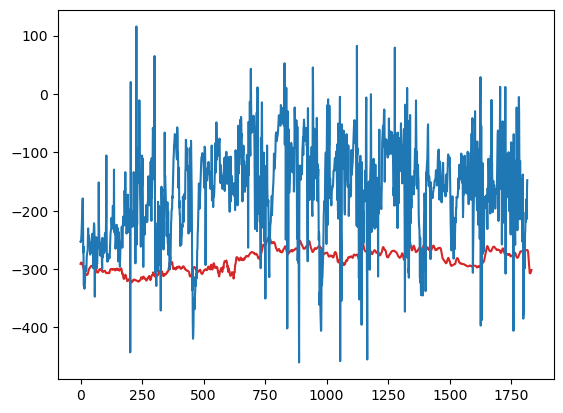

In [101]:
plt.plot(all_gabor_responses['field']['stationary_1'][0, 0, 0, 4, :], color='tab:red')
plt.plot(all_gabor_responses['field']['moving_1'][0, 0, 0, 4, :], color='tab:blue')

## Compute SD

### Only full frequency

In [ ]:
# low frequency multiple window sizes

import bottleneck as bn

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

stationary_stim_SD = []
moving_stim_SD = []
stationary_stim = []
moving_stim = []

fps = 30
window_length = np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
print(window_size)
num_samples = 1740

# get the responses for each environment
for i in range(len(window_size)):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    # stationary_stim_temp = []
    # moving_stim_temp = []
    for env_key in environments:
        all_gabor_responses_env = all_gabor_responses[env_key]
        print(all_gabor_responses_env.keys())
        for vid_key in all_gabor_responses_env.keys():
            # compute the moving SD
            resp_SD = bn.move_std(all_gabor_responses_env[vid_key][()], window=window_size[i], min_count=window_size[i], axis=-1)[:, :, low_spatial_freq_idx, :, :num_samples]
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
                # stationary_stim_temp.append(all_gabor_responses_env[vid_key][()])
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
                # moving_stim_temp.append(all_gabor_responses_env[vid_key][()])
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)
    # stationary_stim.append(stationary_stim_temp)
    # moving_stim.append(moving_stim_temp)

[ 30  60 150 300 600]
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_mo

KeyboardInterrupt: 

In [6]:
# For low freq only

import bottleneck as bn
from joblib import Parallel, delayed
from tqdm import tqdm

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

fps = 30
window_length = np.array([5]) # np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
num_samples = 1740

# Pre-load all data into memory for faster access
all_gabor_data = {}
for env_key in tqdm(environments, desc="Pre-loading environments"):
    env_data = {}
    for vid_key in tqdm(all_gabor_responses[env_key].keys(), desc=f"Loading {env_key}", leave=False):
        env_data[vid_key] = all_gabor_responses[env_key][vid_key][()]
    all_gabor_data[env_key] = env_data

def compute_sd_for_video(data, window, idx, num_samples):
    # data: shape (..., time)
    return bn.move_std(data, window=window, min_count=window, axis=-1)[:, :, idx, :, :num_samples]

stationary_stim_SD = []
moving_stim_SD = []

for i, win in enumerate(tqdm(window_size, desc="Window sizes")):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    for env_key in tqdm(environments, desc="Environments", leave=False):
        env_data = all_gabor_data[env_key]
        vid_keys = list(env_data.keys())
        results = Parallel(n_jobs=-1)(
            delayed(compute_sd_for_video)(env_data[vid_key], win, low_spatial_freq_idx, num_samples)
            for vid_key in tqdm(vid_keys, desc=f"Processing {env_key}", leave=False)
        )
        for vid_key, resp_SD in zip(vid_keys, results):
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)

Window sizes:   0%|          | 0/1 [00:00<?, ?it/s]











Window sizes: 100%|██████████| 1/1 [02:39<00:00, 159.48s/it]


In [102]:
# For all frequencies

import bottleneck as bn
from joblib import Parallel, delayed
from tqdm import tqdm

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

fps = 30
window_length = np.array([5]) # np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
num_samples = 1740

# Pre-load all data into memory for faster access
all_gabor_data = {}
for env_key in tqdm(environments, desc="Pre-loading environments"):
    env_data = {}
    for vid_key in tqdm(all_gabor_responses[env_key].keys(), desc=f"Loading {env_key}", leave=False):
        env_data[vid_key] = all_gabor_responses[env_key][vid_key][()]
    all_gabor_data[env_key] = env_data

def compute_sd_for_video(data, window, num_samples):
    # data: shape (..., time)
    return bn.move_std(data, window=window, min_count=window, axis=-1)[:, :, :, :, :num_samples]

stationary_stim_SD = []
moving_stim_SD = []

for i, win in enumerate(tqdm(window_size, desc="Window sizes")):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    for env_key in tqdm(environments, desc="Environments", leave=False):
        env_data = all_gabor_data[env_key]
        vid_keys = list(env_data.keys())
        results = Parallel(n_jobs=-1)(
            delayed(compute_sd_for_video)(env_data[vid_key], win, num_samples)
            for vid_key in tqdm(vid_keys, desc=f"Processing {env_key}", leave=False)
        )
        for vid_key, resp_SD in zip(vid_keys, results):
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)

Environments:   0%|                                                                                                                                                                                                      | 0/5 [00:00<?, ?it/s]

Processing field:   0%|                                                                                                                                                                                                 | 0/30 [00:00<?, ?it/s]

Processing field:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 28/30 [00:19<00:01,  1.40it/s]

                                                                                                                                                                                                                                               
Environments:  20%|██████████████████

In [103]:
# make arrays
stationary_stim_SD = np.array(stationary_stim_SD)
moving_stim_SD = np.array(moving_stim_SD)

In [104]:
stationary_stim_SD.shape

(1, 50, 8, 4, 70, 9, 1740)

In [105]:
avg_stationary_stim_SD = np.nanmean(stationary_stim_SD, axis=(1,-1))
avg_moving_stim_SD = np.nanmean(moving_stim_SD, axis=(1, -1))
windowed_std_moving_responses = avg_moving_stim_SD
windowed_std_stationary_responses = avg_stationary_stim_SD

In [106]:
avg_stationary_stim_SD.shape

(1, 8, 4, 70, 9)

In [107]:
# compute the mean and std of the SD
mean_avg_stationary_stim_SD = np.nanmean(avg_stationary_stim_SD[0])
std_avg_stationary_stim_SD = np.nanstd(avg_stationary_stim_SD[0])
mean_avg_moving_stim_SD = np.nanmean(avg_moving_stim_SD[0])
std_avg_moving_stim_SD = np.nanstd(avg_moving_stim_SD[0])
# print the mean and std
print(f'Mean SD: {mean_avg_stationary_stim_SD} +-  {std_avg_stationary_stim_SD}')
print(f'Mean SD: {mean_avg_moving_stim_SD} +-  {std_avg_moving_stim_SD}')


Mean SD: 7.028128743944866 +-  7.923190829980659
Mean SD: 12.200418723411682 +-  18.387188104483855


([<matplotlib.axis.XTick at 0x7f1d64267770>,
 [Text(1, 0, 'Stationary'), Text(2, 0, 'Moving')])

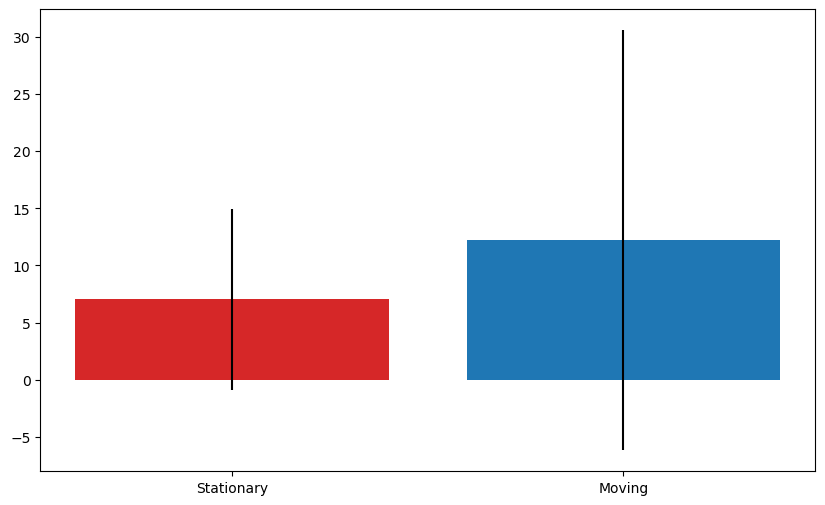

In [108]:
# plot this as bars
plt.figure(figsize=(10, 6))
plt.bar([1, 2], [mean_avg_stationary_stim_SD, mean_avg_moving_stim_SD], yerr=[std_avg_stationary_stim_SD, std_avg_moving_stim_SD], color=['tab:red', 'tab:blue'])
plt.xticks([1, 2], ['Stationary', 'Moving'])

## Gaussian optimization

In [109]:
# optimize nonlinearities using lookup table
dir_name = 'gaussian_optimization_analytic_fast' # 'test_gaussian_optimization_kraskov' # 'test_gaussian_optimization_fast_response_entropy' # 'redo_all_sigma_even_more_bins_optimized_zscored_data' # 'all_sigma_more_bins_zscored_data' # 'redo_all_sigma_less_bins_optimized_zscored_data' # 'redo_all_sigma_more_bins_optimized_zscored_data' # 'all_sigma_more_bins_optimized_zscored_data'  # 'higher_sigma_for_zscored_data' # 'more_sigma_bins_gaussian_results' # 'even_more_sigma_bins_gaussian_results'

MI_arr = np.load(dir_name + '/MI_arr.npy')
# stimulus_entropy = np.load(dir_name + '/stimulus_entropy.npy')
average_response_arr = np.load(dir_name + '/average_response_arr.npy')
stimulus_entropy = np.load(dir_name + '/stim_entropy_arr.npy')

# stimulus_bins = np.load(dir_name + '/stimulus_bins.npy') # np.linspace(-30, 30, 200)
response_bins = np.load(dir_name + '/response_bins.npy') #

# Define the range of k and L values for grid search
k_arr = np.load(dir_name + '/k_arr.npy') # np.logspace(-2, 2, num_bins) # 5*np.logspace(-2, 0, 100)
L_arr = np.load(dir_name + '/L_arr.npy') # np.arange(0.02, 4.02, .02) # np.arange(0.05, 5.05, .05)
sigma_arr = np.load(dir_name + '/sigma_arr.npy') # 5*np.logspace(-2, 1, num_bins) # np.logspace(-2, 2, num_bins)

# for each sigma compute the optimal parameters for a range of different lambdas
lambda_arr = np.arange(0, 10.5, .5)
optimal_k = np.zeros((len(sigma_arr), len(lambda_arr)))
optimal_L = np.zeros((len(sigma_arr), len(lambda_arr)))
optimal_k_idx = np.zeros((len(sigma_arr), len(lambda_arr)), dtype=np.int32)
optimal_L_idx = np.zeros((len(sigma_arr), len(lambda_arr)), dtype=np.int32)

for i, lambda_ in enumerate(lambda_arr):
    utility = MI_arr - lambda_ * average_response_arr # np.clip(MI_arr/stimulus_entropy[:, np.newaxis, np.newaxis], 0, 1) - lambda_ * average_response_arr
    print(utility.shape)
    # utility = gaussian_filter(utility, sigma=5, axes=(1, 2))
    for j, sigma in enumerate(sigma_arr):
        optimal_k_idx[j, i] = int(np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[0])
        optimal_L_idx[j, i] = int(np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[1])
        optimal_k[j, i] = k_arr[optimal_k_idx[j, i]]
        optimal_L[j, i] = L_arr[optimal_L_idx[j, i]]
        

(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)


In [110]:
# loop over all orientations and phases and wavelengths and compute the optimal parameters for each
optimal_k_arr_moving = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_L_arr_moving = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_k_arr_stationary = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_L_arr_stationary = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))

for i, orientation in tqdm(enumerate(orientation_arr)):
    print("orientation: " + str(orientation))
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(wavelength_arr):
            for m, position in enumerate(position_arr):
                test_moving_std = windowed_std_moving_responses[0, i, j, l, m]
                test_stationary_std = windowed_std_stationary_responses[0, i, j, l, m]
                for n, lambda_ in enumerate(lambda_arr):
                    moving_idx = np.argmin(np.abs(sigma_arr - test_moving_std))
                    optimal_k_arr_moving[i, j, l, m, n] = optimal_k[moving_idx, n]
                    optimal_L_arr_moving[i, j, l, m, n] = optimal_L[moving_idx, n]
                    stationary_idx = np.argmin(np.abs(sigma_arr - test_stationary_std))
                    optimal_k_arr_stationary[i, j, l, m, n] = optimal_k[stationary_idx, n]
                    optimal_L_arr_stationary[i, j, l, m, n] = optimal_L[stationary_idx, n]


0it [00:00, ?it/s]

orientation: 0.0


1it [00:00,  1.19it/s]

orientation: 22.5


2it [00:01,  1.35it/s]

orientation: 45.0


3it [00:02,  1.19it/s]

orientation: 67.5


4it [00:03,  1.26it/s]

orientation: 90.0


5it [00:04,  1.21it/s]

orientation: 112.5


6it [00:04,  1.21it/s]

orientation: 135.0


7it [00:05,  1.18it/s]

orientation: 157.5


8it [00:06,  1.18it/s]


# Compute firing rates

8it [00:01,  5.46it/s]


Text(0.5, 1.0, 'Relative difference decreases with spatial frequency')

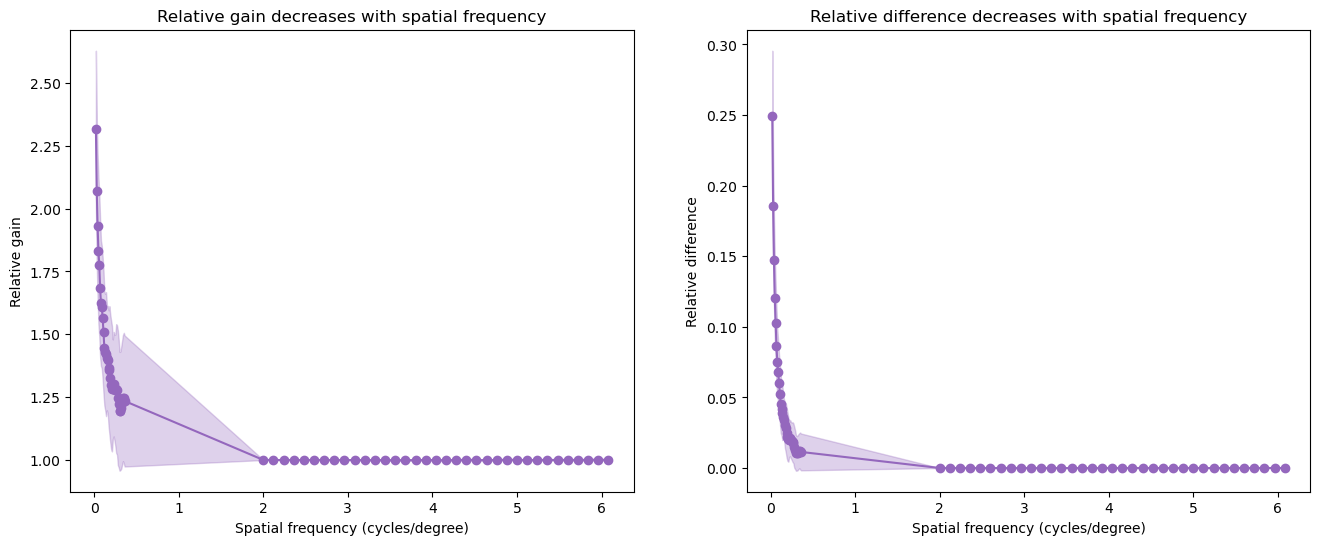

In [111]:
# compute the firing rate for the optimal parameters

lambda_idx = 2

sigma = 50
num_samples = int(1000)
threshold = 0

moving_firing_rates = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), num_samples))
stationary_firing_rates = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), num_samples))
stimulus = np.random.laplace(0, sigma, num_samples)
for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(wavelength_arr):
            for m, position in enumerate(position_arr):
                    moving_firing_rates[i, j, l, m, :] = logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l, m, lambda_idx], L=optimal_L_arr_moving[i, j, l, m, lambda_idx])
                    stationary_firing_rates[i, j, l, m, :] = logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l, m, lambda_idx])

modulation = np.nanmean(moving_firing_rates, axis=-1) / np.nanmean(stationary_firing_rates, axis=-1)
avg_modulation = np.nanmean(modulation, axis=(0, 1, 3))
SD_modulation = np.nanstd(modulation, axis=(0, 1, 3))

diff_modulation = np.nanmean(moving_firing_rates, axis=-1) - np.nanmean(stationary_firing_rates, axis=-1)
avg_diff_modulation = np.nanmean(diff_modulation, axis=(0, 1, 3))
SD_diff_modulation = np.nanstd(diff_modulation, axis=(0, 1, 3))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(freq_arr, avg_modulation, 'o-', color='tab:purple')
ax[0].fill_between(freq_arr, avg_modulation - SD_modulation, avg_modulation + SD_modulation, color='tab:purple', alpha=0.3)
ax[0].set_xlabel('Spatial frequency (cycles/degree)')
ax[0].set_ylabel('Relative gain')
ax[0].set_title('Relative gain decreases with spatial frequency')

ax[1].plot(freq_arr, avg_diff_modulation, 'o-', color='tab:purple')
ax[1].fill_between(freq_arr, avg_diff_modulation - SD_diff_modulation, avg_diff_modulation + SD_diff_modulation, color='tab:purple', alpha=0.3)
ax[1].set_xlabel('Spatial frequency (cycles/degree)')
ax[1].set_ylabel('Relative difference')
ax[1].set_title('Relative difference decreases with spatial frequency')

## Interspecies comparison

In [264]:
# define the Gabor filter function
def gabor_filter(
    sigma, theta, gamma, wavelength, phase, filt_size, x_offset=0, y_offset=0
):
    y, x = np.meshgrid(
        np.arange(filt_size[1]) - filt_size[1] // 2,
        np.arange(filt_size[0]) - filt_size[0] // 2,
    )
    x = x - x_offset
    y = y + y_offset
    x_prime = x * np.cos(np.pi * theta / 180) + y * np.sin(np.pi * theta / 180)
    y_prime = -x * np.sin(np.pi * theta / 180) + y * np.cos(np.pi * theta / 180)
    filter = np.exp(-0.5 * (x_prime**2 + (gamma * y_prime) ** 2) / sigma**2) * np.cos(
        2 * np.pi * x_prime / wavelength + np.pi * phase / 180)
    filter /= np.linalg.norm(filter)
    return filter

In [265]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

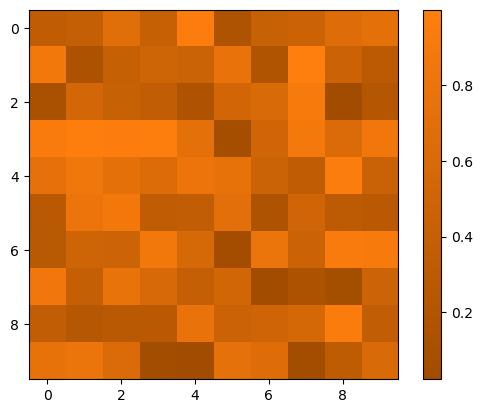

In [266]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_orange = LinearSegmentedColormap.from_list('black_to_orange', [
    (0, '#a14c00'),
    (1, 'tab:orange')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_orange)
fig.colorbar(cax)
plt.show()

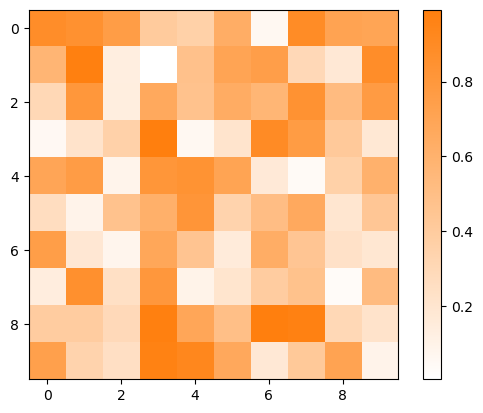

In [267]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_orange = LinearSegmentedColormap.from_list('white_to_orange', [
    (0, '#ffffff'),
    (1, 'tab:orange')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_orange)
fig.colorbar(cax)
plt.show()

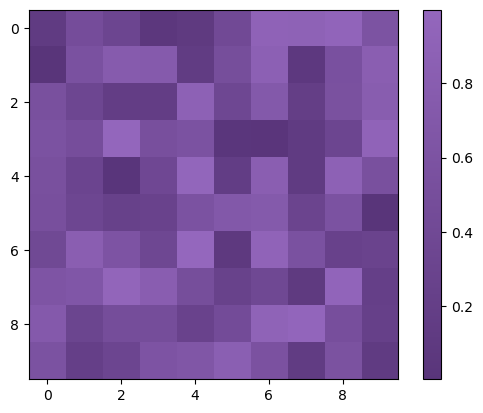

In [268]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_purple = LinearSegmentedColormap.from_list('white_to_purple', [
    (0, '#59357a'),
    (1, 'tab:purple')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_purple)
fig.colorbar(cax)
plt.show()

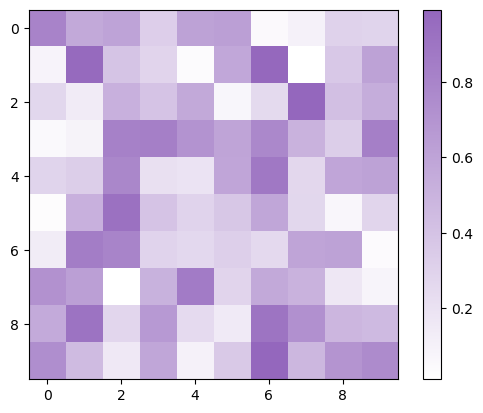

In [269]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_purple = LinearSegmentedColormap.from_list('white_to_purple', [
    (0, '#ffffff'),
    (1, 'tab:purple')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_purple)
fig.colorbar(cax)
plt.show()

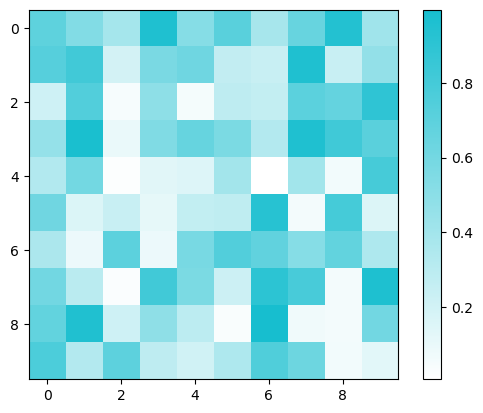

In [270]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_cyan = LinearSegmentedColormap.from_list('white_to_cyan', [
    (0, '#ffffff'),
    (1, 'tab:cyan')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_cyan)
fig.colorbar(cax)
plt.show()

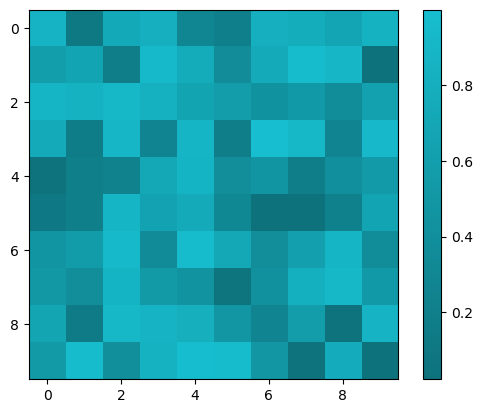

In [271]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_cyan = LinearSegmentedColormap.from_list('black_to_cyan', [
    (0, '#0e727c'),
    (1, 'tab:cyan')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_cyan)
fig.colorbar(cax)
plt.show()

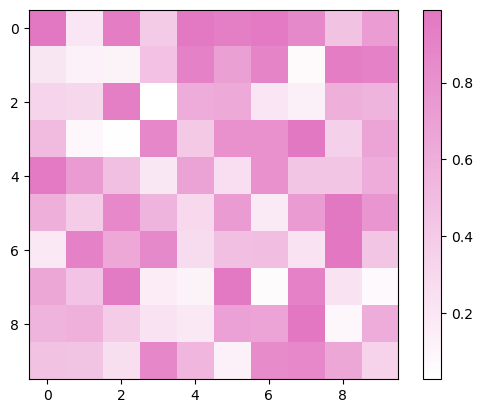

In [272]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_pink = LinearSegmentedColormap.from_list('white_to_pink', [
    (0, '#ffffff'),
    (1, 'tab:pink')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_pink)
fig.colorbar(cax)
plt.show()

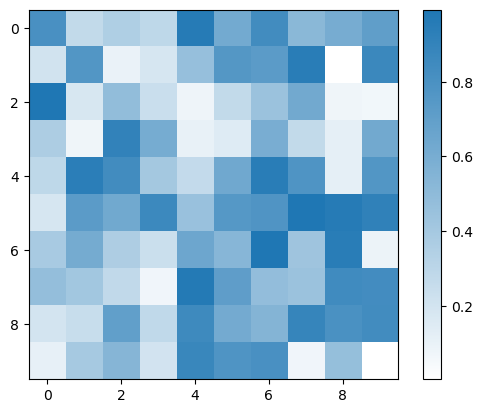

In [273]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_blue = LinearSegmentedColormap.from_list('white_to_blue', [
    (0, '#ffffff'),
    (1, 'tab:blue')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_blue)
fig.colorbar(cax)
plt.show()

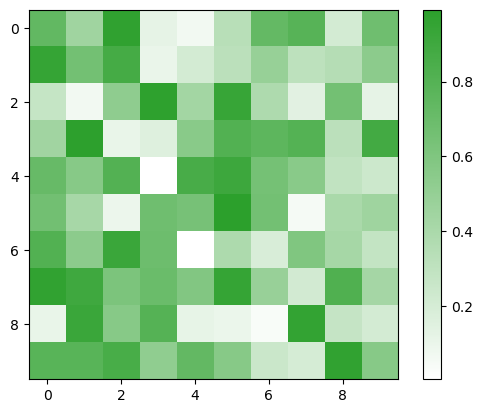

In [274]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_green = LinearSegmentedColormap.from_list('white_to_green', [
    (0, '#ffffff'),
    (1, 'tab:green')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_green)
fig.colorbar(cax)
plt.show()

## Mouse vs. Marmoset

In [374]:
# load in the measured sf of mouse and marmoset
# load the mouse and marmoset spatial frequencies as a npy array
marm_data = np.load('../data/marm_sf.npy')
mouse_data = np.load('../data/mouse_sf.npy')

In [375]:
# remove the nan values
marm_data = marm_data[~np.isnan(marm_data)]
mouse_data = mouse_data[~np.isnan(mouse_data)]

In [376]:
print(np.nanmax(windowed_std_moving_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_moving_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmax(windowed_std_stationary_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_stationary_responses[0, :, :, high_spatial_freq_idx, :]))

1.9820969543407043
0.1687821286721867
1.7185801678867934
0.13659193728135688


In [377]:
print(np.nanmax(windowed_std_moving_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_moving_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmax(windowed_std_stationary_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_stationary_responses[0, :, :, low_spatial_freq_idx, :]))

145.61080866218643
7.7456605028214565
39.71643403985445
4.758319619871142


In [378]:
low_freq_bin_centers = freq_arr[low_spatial_freq_idx] # freq_arr_low_freq # 
high_freq_bin_centers = freq_arr[high_spatial_freq_idx]

# create bins for the low and high spatial frequencies using the bin centers
low_freq_bins = [0]
low_freq_bin_diff = np.diff(low_freq_bin_centers)
for i in range(len(low_freq_bin_centers)-1):
    low_freq_bins.append(low_freq_bin_centers[i]+low_freq_bin_diff[i]/2)
low_freq_bins.append(10)

high_freq_bins = [0]
high_freq_bin_diff = np.diff(high_freq_bin_centers)
for i in range(len(high_freq_bin_centers)-1):
    high_freq_bins.append(high_freq_bin_centers[i]+high_freq_bin_diff[i]/2)
high_freq_bins.append(10)

In [379]:
# compute the probability of the low and high spatial frequencies
low_freq_prob = np.histogram(mouse_data, bins=low_freq_bins, weights=np.ones_like(mouse_data)/len(mouse_data))[0]
high_freq_prob = np.histogram(marm_data, bins=high_freq_bins, weights=np.ones_like(marm_data)/len(marm_data))[0]

In [380]:
np.max(mouse_data)

0.32000000000000023

(0.0, 0.5)

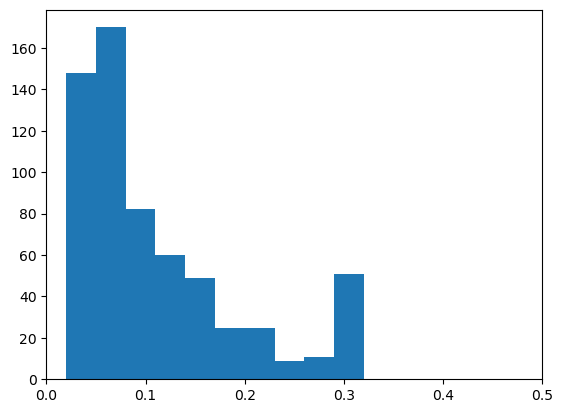

In [381]:
plt.hist(mouse_data)
plt.xlim(0, 0.5)

In [382]:
# take a weighted sum of the ratio of filter SD based on the distribution of spatial frequencies observed experimentally.
SD_ratio = windowed_std_moving_responses/windowed_std_stationary_responses
SD_ratio = SD_ratio[0]
# SD_ratio_avg_ori_phase_pos = np.mean(SD_ratio[0, :, :, :, :], axis=(0, 1, 3))
num_ori = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[0]
num_phases = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[1]
num_pos = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[3]

high_freq_weighting_arr = np.tile(high_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))
low_freq_weighting_arr = np.tile(low_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))

# normalize so all of the weights add up to 1
high_freq_weighting_arr /= np.sum(high_freq_weighting_arr)
low_freq_weighting_arr /= np.sum(low_freq_weighting_arr)

# from statsmodels.stats.weightstats import DescrStatsW
# low_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr).std
# high_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr).std
print(np.shape(SD_ratio))
print(np.shape(high_freq_weighting_arr))
avg_high_freq_SD_ratio = np.average(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr)
avg_low_freq_SD_ratio = np.average(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr)

std_high_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, high_spatial_freq_idx, :]-avg_high_freq_SD_ratio)**2, weights=high_freq_weighting_arr))
std_low_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, low_spatial_freq_idx, :]-avg_low_freq_SD_ratio)**2, weights=low_freq_weighting_arr))


(8, 4, 70, 9)
(8, 4, 35, 9)


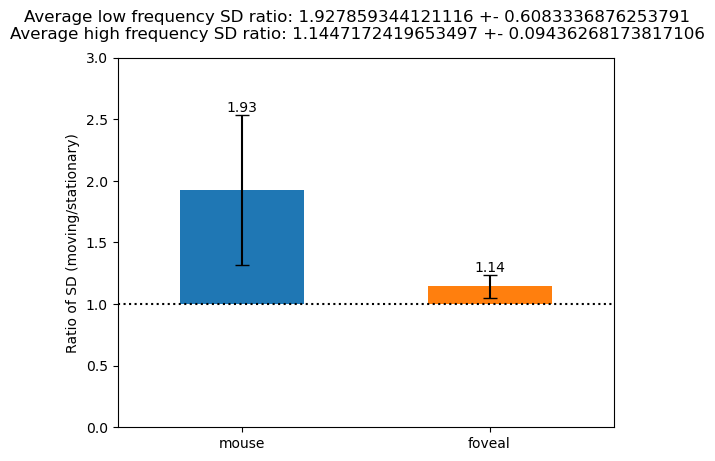

In [383]:
p = plt.bar([1, 2], [avg_low_freq_SD_ratio-1, avg_high_freq_SD_ratio-1], color=['tab:blue', 'tab:orange'], width=.5, yerr=[std_low_freq_SD_ratio, std_high_freq_SD_ratio], capsize=5, bottom=1)
plt.bar_label(p, [np.round(avg_low_freq_SD_ratio, 2), np.round(avg_high_freq_SD_ratio, 2)])
plt.ylim(0, 3)
plt.xlim(0.5, 2.5)
plt.axhline(1, color='k', linestyle=':')
plt.xticks([1, 2], ['mouse', 'foveal'])
plt.ylabel('Ratio of SD (moving/stationary)')
plt.suptitle(f'Average low frequency SD ratio: {avg_low_freq_SD_ratio} +- {std_low_freq_SD_ratio}\nAverage high frequency SD ratio: {avg_high_freq_SD_ratio} +- {std_high_freq_SD_ratio}')
plt.savefig('../manuscript_figures/fig5_SD_bars_mouse_foveal.pdf', format='pdf', bbox_inches='tight')

In [384]:
num_draws = int(2000)
lambda_idx = 2
num_samples_per_draw = int(1000)
sigma = 50

low_freq_stationary_firing_rates_full = []
low_freq_moving_firing_rates_full = []
high_freq_stationary_firing_rates_full = []
high_freq_moving_firing_rates_full = []
low_freq_stationary_k = []
low_freq_stationary_L = []
low_freq_moving_k = []
low_freq_moving_L = []
low_freq_ori_idx = []
low_freq_phase_idx = []
low_freq_wavelength_idx = []
low_freq_position_idx = []
high_freq_stationary_k = []
high_freq_stationary_L = []
high_freq_moving_k = []
high_freq_moving_L = []
high_freq_ori_idx = []
high_freq_phase_idx = []
high_freq_wavelength_idx = []
high_freq_position_idx = []

for draw_num in tqdm(range(num_draws)):
    # randomly choose a filter
    i = np.random.randint(0, len(orientation_arr))
    j = np.random.randint(0, len(phase_arr))
    l_low = np.random.choice(low_spatial_freq_idx, p=low_freq_prob) # np.random.choice(low_spatial_freq_idx, p=low_freq_prob)
    # l_low = np.random.choice(np.arange(len(freq_arr_low_freq)), p=low_freq_prob) # np.random.choice(low_spatial_freq_idx, p=low_freq_prob)
    l_high = np.random.choice(high_spatial_freq_idx, p=high_freq_prob)
    m = np.random.randint(0, len(position_arr))
    # compute firing rates
    # compute the firing rate for the optimal parameters
    stimulus = np.random.laplace(0, sigma, num_samples_per_draw)
    low_freq_stationary_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx]))
    low_freq_moving_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx]))
    high_freq_stationary_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_high, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_high, m, lambda_idx]))
    high_freq_moving_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_high, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_high, m, lambda_idx]))
    low_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_low, m, lambda_idx]) 
    low_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_moving_k.append(optimal_k_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_moving_L.append(optimal_L_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_ori_idx.append(i)
    low_freq_phase_idx.append(j)
    low_freq_wavelength_idx.append(l_low)
    low_freq_position_idx.append(m)
    high_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_moving_k.append(optimal_k_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_moving_L.append(optimal_L_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_ori_idx.append(i)
    high_freq_phase_idx.append(j)
    high_freq_wavelength_idx.append(l_high)
    high_freq_position_idx.append(m)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2993.64it/s]


In [385]:

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)
low_freq_stationary_firing_rates = np.mean(low_freq_stationary_firing_rates_full, axis=-1)
low_freq_moving_firing_rates = np.mean(low_freq_moving_firing_rates_full, axis=-1)
high_freq_stationary_firing_rates = np.mean(high_freq_stationary_firing_rates_full, axis=-1)
high_freq_moving_firing_rates = np.mean(high_freq_moving_firing_rates_full, axis=-1)
# remove any outliers from the firing rates if they are greater than 3 SD from the mean

# num_sigma = 3
# low_freq_stationary_firing_rates_outliers = np.where(np.abs(low_freq_stationary_firing_rates - np.mean(low_freq_stationary_firing_rates)) > num_sigma * np.std(low_freq_stationary_firing_rates))[0]
# low_freq_moving_firing_rates_outliers = np.where(np.abs(low_freq_moving_firing_rates - np.mean(low_freq_moving_firing_rates)) > num_sigma * np.std(low_freq_moving_firing_rates))[0]
# high_freq_stationary_firing_rates_outliers = np.where(np.abs(high_freq_stationary_firing_rates - np.mean(high_freq_stationary_firing_rates)) > num_sigma * np.std(high_freq_stationary_firing_rates))[0]
# high_freq_moving_firing_rates_outliers = np.where(np.abs(high_freq_moving_firing_rates - np.mean(high_freq_moving_firing_rates)) > num_sigma * np.std(high_freq_moving_firing_rates))[0]
# # merge the outliers for the stationary and moving
# low_freq_stationary_firing_rates_outliers = np.concatenate((low_freq_stationary_firing_rates_outliers, low_freq_moving_firing_rates_outliers))
# # ensure no repeats
# low_freq_stationary_firing_rates_outliers = np.unique(low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates_outliers = np.concatenate((high_freq_stationary_firing_rates_outliers, high_freq_moving_firing_rates_outliers))
# # ensure no repeats
# high_freq_stationary_firing_rates_outliers = np.unique(high_freq_stationary_firing_rates_outliers)
# # remove the outliers from the firing rates
# low_freq_stationary_firing_rates = np.delete(low_freq_stationary_firing_rates, low_freq_stationary_firing_rates_outliers)
# low_freq_moving_firing_rates = np.delete(low_freq_moving_firing_rates, low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates = np.delete(high_freq_stationary_firing_rates, high_freq_stationary_firing_rates_outliers)
# high_freq_moving_firing_rates = np.delete(high_freq_moving_firing_rates, high_freq_stationary_firing_rates_outliers)


In [386]:
low_freq_stationary_sorted.shape

(2000,)

1 100
Number of low frequency points not shown in the plot: 1


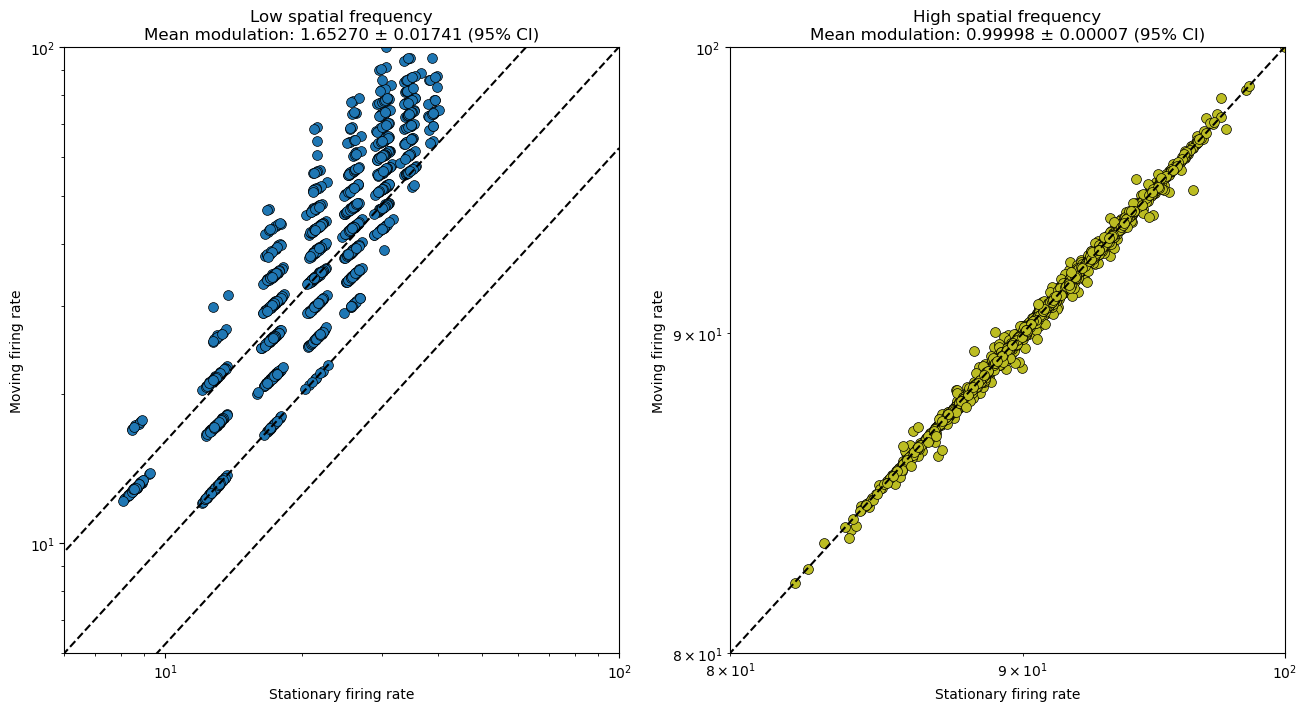

In [387]:
from scipy.stats import gaussian_kde

jitter_sigma = 0

cm = 1/2.54

fig = plt.figure(figsize=(40*cm, 20*cm))

# low_freq_norm = np.max([np.max(avg_stationary_firing_rates[:, :, low_spatial_freq_idx, :].flatten()), np.max(avg_moving_firing_rates[:, :, low_spatial_freq_idx, :].flatten())])

# subtract the minimum firing rate from the firing rates
# low_freq_min_val = np.nanmin(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))
# normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates - low_freq_min_val
# normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates - low_freq_min_val

low_freq_norm = np.max(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))

normed_low_freq_stationary_firing_rates = 100*low_freq_stationary_firing_rates/low_freq_norm
normed_low_freq_moving_firing_rates = 100*low_freq_moving_firing_rates/low_freq_norm

# multiply by 0.9 and add 0.1
# normed_low_freq_stationary_firing_rates *= 0.5
# normed_low_freq_moving_firing_rates *= 0.5
# normed_low_freq_stationary_firing_rates += 0.5
# normed_low_freq_moving_firing_rates += 0.5

# xy = np.vstack([normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates])
# z = gaussian_kde(xy)(xy)

# add jitter
normed_low_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_stationary_firing_rates))
normed_low_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_moving_firing_rates))

# renormalize
# low_freq_min_val = np.nanmin(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

# normed_low_freq_stationary_firing_rates -= low_freq_min_val
# normed_low_freq_moving_firing_rates -= low_freq_min_val

# low_freq_norm = np.max(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

# normed_low_freq_stationary_firing_rates = normed_low_freq_stationary_firing_rates/low_freq_norm
# normed_low_freq_moving_firing_rates = normed_low_freq_moving_firing_rates/low_freq_norm

# multiply by 0.9 and add 0.1
# normed_low_freq_stationary_firing_rates *= 0.5
# normed_low_freq_moving_firing_rates *= 0.5
# normed_low_freq_stationary_firing_rates += 0.5
# normed_low_freq_moving_firing_rates += 0.5

# low_freq_staitonary_sorted = np.argsort(normed_low_freq_stationary_firing_rates.flatten())
# low_freq_moving_sorted_idx = np.argsort(z)

# low_freq_stationary_sorted = normed_low_freq_stationary_firing_rates[low_freq_moving_sorted_idx]
# low_freq_moving_sorted = normed_low_freq_moving_firing_rates[low_freq_moving_sorted_idx]
# z = z[low_freq_moving_sorted_idx]

ax = fig.add_subplot(1, 2, 1)
# density = ax.scatter(low_freq_stationary_sorted, low_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_purple)
density = ax.scatter(normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates, s=50, edgecolors='#000000', linewidths=0.5)

# add a colorbar for the density plot
# colorbar(density)

# subtract the minimum firing rate from the firing rates
# high_freq_min_val = np.nanmin(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))
# normed_high_freq_stationary_firing_rates = high_freq_stationary_firing_rates - high_freq_min_val
# normed_high_freq_moving_firing_rates = high_freq_moving_firing_rates - high_freq_min_val

high_freq_norm = np.max(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))

normed_high_freq_stationary_firing_rates = 100*high_freq_stationary_firing_rates/high_freq_norm
normed_high_freq_moving_firing_rates = 100*high_freq_moving_firing_rates/high_freq_norm

# normed_high_freq_stationary_firing_rates *= 0.5
# normed_high_freq_moving_firing_rates *= 0.5
# normed_high_freq_stationary_firing_rates += 0.5
# normed_high_freq_moving_firing_rates += 0.5

# xy = np.vstack([normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten()])
# z = gaussian_kde(xy)(xy)
normed_high_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_stationary_firing_rates))
normed_high_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_moving_firing_rates))

# renormalize
# high_freq_min_val = np.nanmin(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

# normed_high_freq_stationary_firing_rates -= high_freq_min_val
# normed_high_freq_moving_firing_rates -= high_freq_min_val

# high_freq_norm = np.max(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

# normed_high_freq_stationary_firing_rates = normed_high_freq_stationary_firing_rates/high_freq_norm
# normed_high_freq_moving_firing_rates = normed_high_freq_moving_firing_rates/high_freq_norm

# multiply by 0.9 and add 0.1
# normed_high_freq_stationary_firing_rates *= 0.5
# normed_high_freq_moving_firing_rates *= 0.5
# normed_high_freq_stationary_firing_rates += 0.5
# normed_high_freq_moving_firing_rates += 0.5

# high_freq_moving_sorted_idx = np.argsort(z)
# high_freq_stationary_sorted = normed_high_freq_stationary_firing_rates[high_freq_moving_sorted_idx]
# high_freq_moving_sorted = normed_high_freq_moving_firing_rates[high_freq_moving_sorted_idx]
# z = z[high_freq_moving_sorted_idx]

ax2 = fig.add_subplot(1, 2, 2)
# density2 = ax2.scatter(normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten(), s=50, edgecolors='#999999', linewidths=0.5, c=z, cmap=black_to_orange)
# density2 = ax2.scatter(high_freq_stationary_sorted, high_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_orange)
density2 = ax2.scatter(normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates, s=50, edgecolors='#000000', linewidths=0.5, color='tab:olive')

# add a colorbar for the density plot
# colorbar(density2)

low_modulation = low_freq_moving_firing_rates / low_freq_stationary_firing_rates
high_modulation = high_freq_moving_firing_rates / high_freq_stationary_firing_rates

low_mean = np.nanmean(low_modulation)
low_sem = np.nanstd(low_modulation) / np.sqrt(np.sum(~np.isnan(low_modulation)))
low_ci = 1.96 * low_sem

high_mean = np.nanmean(high_modulation)
high_sem = np.nanstd(high_modulation) / np.sqrt(np.sum(~np.isnan(high_modulation)))
high_ci = 1.96 * high_sem

ax.set_xlabel('Stationary firing rate')
ax.set_ylabel('Moving firing rate')
ax.set_title(f'Low spatial frequency\nMean modulation: {low_mean:.5f} ± {low_ci:.5f} (95% CI)')
ax2.set_xlabel('Stationary firing rate')
ax2.set_ylabel('Moving firing rate')
ax2.set_title(f'High spatial frequency\nMean modulation: {high_mean:.5f} ± {high_ci:.5f} (95% CI)')
# ...existing code...

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
# find the min and max y and x values
min_x = ax.get_xlim()[0]
max_x = ax.get_xlim()[1]
min_y = ax.get_ylim()[0]
max_y = ax.get_ylim()[1]
min_both = 1 # min(min_x, min_y)
max_both = 100 # max(max_x, max_y)
low_freq_lower_bound = 6
print(min_both, max_both)
ax.set_ylim(low_freq_lower_bound, 100)
ax.set_xlim(low_freq_lower_bound, 100)
ax2.set_ylim(80, 100)
ax2.set_xlim(80, 100)
# min_x2 = ax2.get_xlim()[0]
# max_x2 = ax2.get_xlim()[1]
# min_y2 = ax2.get_ylim()[0]
# max_y2 = ax2.get_ylim()[1]
# min_both2 = min(min_x2, min_y2)
# max_both2 = max(max_x2, max_y2)
# min_both2 = .7
# max_both2 = 1
# ax2.set_ylim(min_both2, max_both2)
# ax2.set_xlim(min_both2, max_both2)

# line = np.linspace(min(min_both, min_both2), max(max_both, max_both2), 100)
line = np.linspace(min_both, max_both, 100)
ax.plot(line, line, color='k', linestyle='--')
ax.plot(line, 1.6*line, color='k', linestyle='--')
ax.plot(line, line/1.6, color='k', linestyle='--')
ax2.plot(line, line, color='k', linestyle='--')
ax2.plot(line, 2*line, color='k', linestyle='--')
ax2.plot(line, line/2, color='k', linestyle='--')

# print how points are truncated
print(f'Number of low frequency points not shown in the plot: {np.sum(normed_low_freq_stationary_firing_rates<=low_freq_lower_bound)+np.sum(normed_low_freq_moving_firing_rates>=100)}')

plt.savefig('../manuscript_figures/fig5_mouse_marm_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('../cosyne_2025_figures/mouse_marm_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

In [388]:
high_bins

array([0.99009901, 0.99141346, 0.99272965, 0.99404759, 0.99536728,
       0.99668872, 0.99801191, 0.99933686, 1.00066358, 1.00199205,
       1.00332228, 1.00465429, 1.00598806, 1.0073236 , 1.00866091,
       1.01      ])

In [389]:
high_modulation.max()

1.0129011579847702

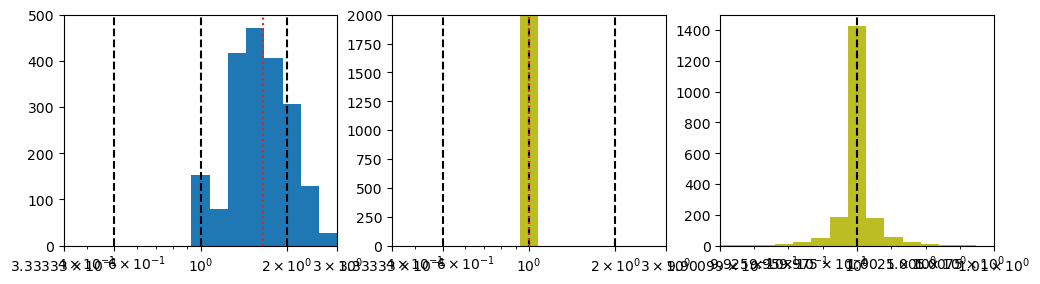

In [390]:
low_max = 3
high_max = 1.01

low_bins = np.logspace(np.log10(1/low_max), np.log10(low_max), 16)
high_bins = np.logspace(np.log10(1/high_max), np.log10(high_max), 16)

fig, ax = plt.subplots(1, 3, figsize=(12,3))

ax[0].hist(low_modulation, bins=low_bins, color='tab:blue')
ax[1].hist(high_modulation, bins=low_bins, color='tab:olive')
ax[2].hist(high_modulation, bins=high_bins, color='tab:olive')
ax[0].axvline(0.5, color='k', linestyle='--')
ax[0].axvline(1, color='k', linestyle='--')
ax[0].axvline(2, color='k', linestyle='--')
ax[1].axvline(0.5, color='k', linestyle='--')
ax[1].axvline(1, color='k', linestyle='--')
ax[1].axvline(2, color='k', linestyle='--')
ax[2].axvline(1, color='k', linestyle='--')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_xlim(1/low_max, low_max)
ax[1].set_xlim(1/low_max, low_max)
ax[2].set_xlim(1/high_max, high_max)
ax[0].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[1].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[2].set_xticks([1/high_max, 1, high_max])
ax[0].axvline(np.nanmean(low_modulation), color='tab:red', linestyle=':')
ax[1].axvline(np.nanmean(high_modulation), color='tab:red', linestyle=':')
ax[0].set_ylim(0, 500)
ax[1].set_ylim(0, 2000)
ax[2].set_ylim(0, 1500)
plt.savefig('../manuscript_figures/fig5_mouse_marm_dist_fr_ratio.pdf', format='pdf', bbox_inches='tight')

In [394]:
print(np.nanmean(low_modulation))

1.6526999286367323


/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn(
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn(


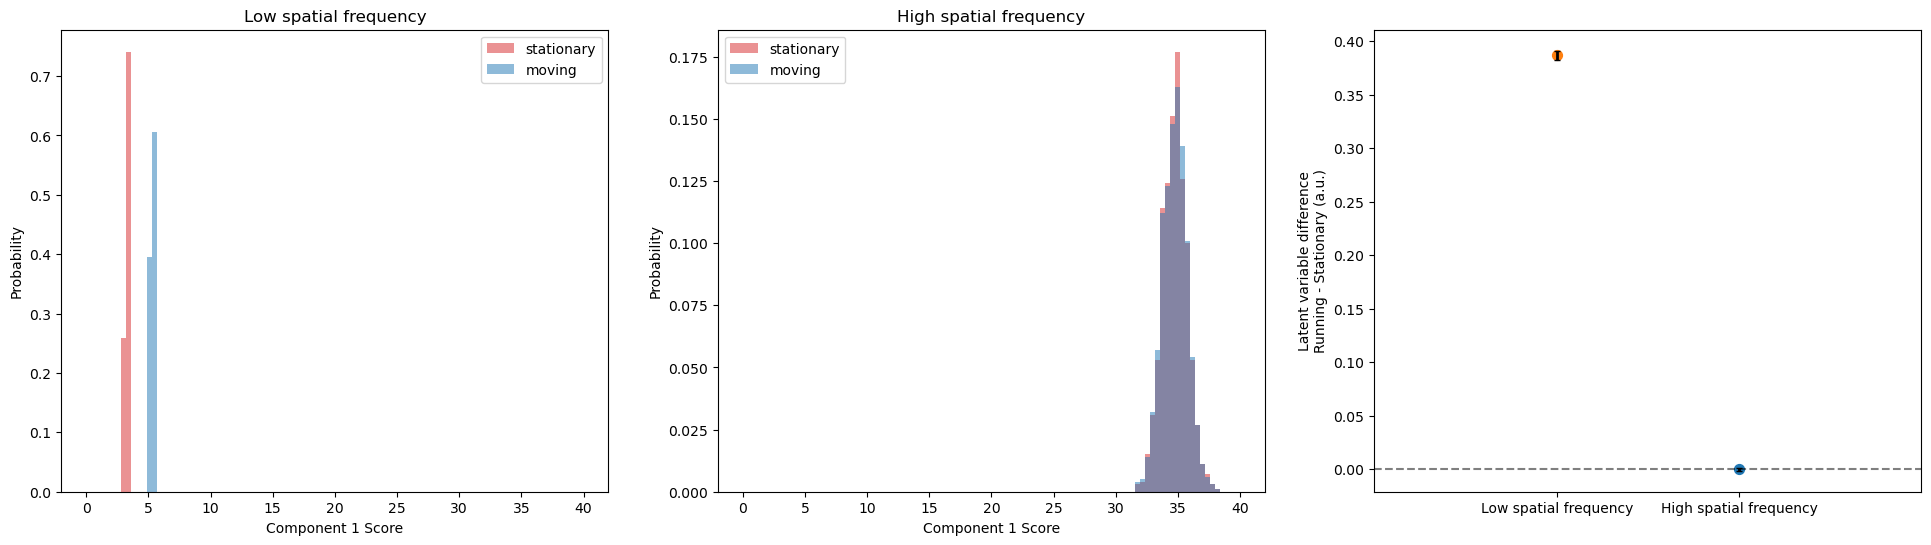

In [373]:
# dim reduction

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)

# PCA on the optimal L and optimal k parameters
low_spatial_freq_design_mat = np.concatenate((low_freq_stationary_firing_rates_full, low_freq_moving_firing_rates_full), axis=-1).reshape(-1, 2*num_samples_per_draw).T
high_spatial_freq_design_mat = np.concatenate((high_freq_stationary_firing_rates_full, high_freq_moving_firing_rates_full), axis=-1).reshape(-1, 2*num_samples_per_draw).T

# normalize
low_spatial_freq_design_mat /= np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True)
high_spatial_freq_design_mat /= np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True)

from sklearn.decomposition import NMF

low_spatial_freq_nmf = NMF(n_components=1, max_iter=100000)
low_spatial_freq_nmf.fit(low_spatial_freq_design_mat)

high_spatial_freq_nmf = NMF(n_components=1, max_iter=100000)
high_spatial_freq_nmf.fit(high_spatial_freq_design_mat)

low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)

# compute the variance explained by the NMF using scipy metrics
from sklearn.metrics import explained_variance_score
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

low_spatial_freq_nmf_score = get_score(low_spatial_freq_nmf, low_spatial_freq_design_mat)
high_spatial_freq_nmf_score = get_score(high_spatial_freq_nmf, high_spatial_freq_design_mat)

component_idx = 0

bins = np.linspace(0, 40, 100)
n_draws = num_samples

low_diff = low_spatial_freq_nmf_scores[n_draws:, component_idx] - low_spatial_freq_nmf_scores[:n_draws, component_idx]
high_diff = high_spatial_freq_nmf_scores[n_draws:, component_idx] - high_spatial_freq_nmf_scores[:n_draws, component_idx]

# low_diff /= np.std(low_spatial_freq_nmf_scores[:, component_idx])
# high_diff /= np.std(high_spatial_freq_nmf_scores[:, component_idx])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].hist(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx])/len(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]))
ax[0].hist(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx])/len(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]))
ax[0].set_xlabel(f'Component {component_idx+1} Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()
ax[1].hist(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx])/len(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]))
ax[1].hist(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx])/len(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]))
ax[1].set_xlabel(f'Component {component_idx+1} Score')
ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

ax[2].scatter(1, np.mean(low_diff), color='tab:orange', label='Low spatial frequency', s=50)
ax[2].scatter(2, np.mean(high_diff), color='tab:blue', label='High spatial frequency', s=50)
ax[2].errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='k', linewidth=2, capsize=2)
ax[2].errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='k', linewidth=2, capsize=2)
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax[2].set_xlim(0, 3)
ax[2].hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax[2].set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
# plt.savefig('../cosyne_2025_figures/nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')

In [341]:
low_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]

array([[9.88660102e-02],
       [9.18276499e-05],
       [8.60636100e-02],
       ...,
       [8.50166723e-02],
       [1.99740278e-01],
       [7.18048730e-02]])

In [354]:
# dim reduction

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)

# regress the moving rates from the stationary responses to the same stimuli
from sklearn.linear_model import LinearRegression

low_freq_stationary_firing_rates_full_reshape = low_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]
low_freq_moving_firing_rates_full_reshape = low_freq_moving_firing_rates_full.flatten()[:, np.newaxis]
high_freq_stationary_firing_rates_full_reshape = high_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]
high_freq_moving_firing_rates_full_reshape = high_freq_moving_firing_rates_full.flatten()[:, np.newaxis]

low_reg = LinearRegression(fit_intercept=False).fit(low_freq_stationary_firing_rates_full_reshape, low_freq_moving_firing_rates_full_reshape)
high_reg = LinearRegression(fit_intercept=False).fit(high_freq_stationary_firing_rates_full_reshape, high_freq_moving_firing_rates_full_reshape)

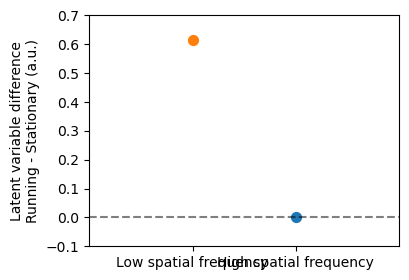

In [360]:
low_latent_diff = low_reg.coef_[0, 0] - 1
high_latent_diff = high_reg.coef_[0, 0] - 1

fig, ax = plt.subplots(1, 1, figsize=(4,3))

ax.scatter(1, low_latent_diff, color='tab:orange', label='Low spatial frequency', s=50)
ax.scatter(2, high_latent_diff, color='tab:blue', label='High spatial frequency', s=50)
# ax.errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='k', linewidth=2, capsize=2)
# ax.errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='k', linewidth=2, capsize=2)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax.set_xlim(0, 3)
ax.set_ylim(-0.1, 0.7)
ax.hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax.set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
plt.savefig('../manuscript_figures/fig5_latent_variable_difference.pdf', format='pdf', bbox_inches='tight')

In [391]:
# print the R^2 of the model
low_reg.score(low_freq_stationary_firing_rates_full_reshape, low_freq_moving_firing_rates_full_reshape)

0.7935715397105702

In [393]:
high_reg.score(high_freq_stationary_firing_rates_full_reshape, high_freq_moving_firing_rates_full_reshape)

0.9967295010791221

## Marmoset periphery vs. foveal

In [361]:
import matplotlib.pyplot as plt

spatial_freq_marm_perif = [0.01681792830507431, 0.023937280522921815, 0.03385242676184536, 0.04756828460010888, 0.0681407826741857, 0.09513656920021774, 0.13540970704738148, 0.1914982441833745, 0.2708194140947629, 0.38299648836674904]
probability_marm_perif = [1.216317365269461, 1.2838212463960978, 4.464958970946995, 11.358532934131738, 17.65372033710357, 24.487275449101794, 19.524839210467952, 17.017354180527832, 2.5937014859170517, 0.7448990907074737]


In [362]:
marm_data

array([3.40483721, 4.32451514, 2.71762289, 2.7410983 , 2.17117972,
       2.93639498, 2.18395694, 3.54694943, 3.22351801, 2.07024565,
       3.56599291, 2.00000363, 3.04092467, 5.04961054, 3.0283968 ,
       3.39480448, 2.51179145, 2.69900414, 2.87999767, 2.24211643,
       2.79935093, 2.40397428, 5.324218  , 6.11139976, 3.69361514,
       2.65649434, 3.04857653, 5.07706134, 2.26686698, 3.72387434,
       3.8973032 , 3.19101459, 3.62496332, 5.0421056 , 2.91993702,
       4.38610001, 3.27941472, 3.57083031, 2.22776566, 2.34491309,
       2.54783048, 3.2261482 , 2.68212288, 2.61156585, 5.02779559,
       2.60686763, 3.38488594, 3.70643192, 3.82948494, 2.99068918,
       2.32526684, 2.15100454, 2.        , 2.62858525, 2.55625867,
       3.62635186, 2.88882038, 3.57658413, 3.62675407, 2.33333894,
       2.63386252, 2.11980956, 3.42787241, 3.15937435, 3.31015939,
       4.17393576, 2.63388128, 9.54585913, 2.49353282, 2.74433732,
       5.68628048, 4.01057154, 2.30062633, 3.76429811, 3.74077

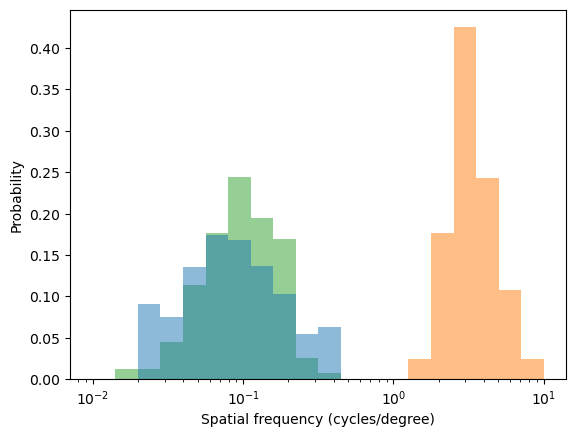

In [363]:
import numpy as np

# find a logspace bin edges whose midpoints match spatial_freq_marm_perif
bins = np.logspace(-2, 1, 21)
# plot histogram of the marmoset perifoveal data
plt.hist(spatial_freq_marm_perif, bins=bins, weights=probability_marm_perif/np.sum(probability_marm_perif), color='tab:green', alpha=0.5)
plt.hist(mouse_data, bins=bins, weights=np.ones_like(mouse_data)/len(mouse_data), color='tab:blue', alpha=0.5)
plt.hist(marm_data, bins=bins, weights=np.ones_like(marm_data)/len(marm_data), color='tab:orange', alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('Spatial frequency (cycles/degree)')
plt.xscale('log')
# plt.xlim(.01, 1)
# plt.ylim(0, .3)
plt.savefig('../manuscript_figures/fig5_mouse_marmoset_perifoveal_spatial_freq.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 0, 'Spatial frequency (cycles/degree)')

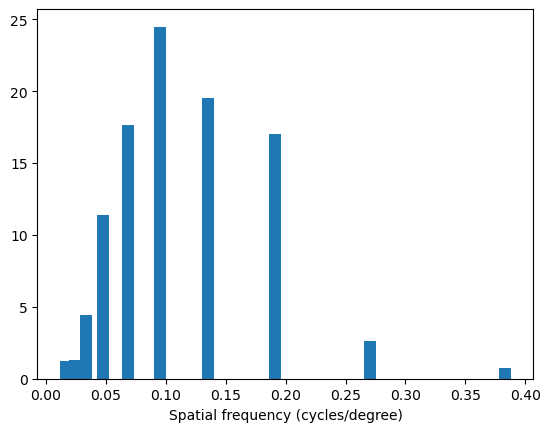

In [364]:
plt.bar(spatial_freq_marm_perif, probability_marm_perif, width=0.01)
plt.xlabel('Spatial frequency (cycles/degree)')
# plt.xscale('log')

In [365]:
print(freq_arr)
print(spatial_freq_marm_perif)
# find the index in freq_arr which is closest to the marmoset spatial frequencies
marm_idx = []
for i in range(len(spatial_freq_marm_perif)):
    marm_idx.append(np.argmin(np.abs(freq_arr - spatial_freq_marm_perif[i])))
print(marm_idx)
probability_marm_perif /= np.sum(probability_marm_perif)
print(probability_marm_perif)
# use the marm_idx to compute the probability for a given spatial frequency in freq_arr
marm_perif_prob = np.zeros_like(freq_arr)
for i in range(len(marm_idx)):
    marm_perif_prob[marm_idx[i]] += probability_marm_perif[i]


[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 2.   2.12 2.24 2.36 2.48 2.6  2.72
 2.84 2.96 3.08 3.2  3.32 3.44 3.56 3.68 3.8  3.92 4.04 4.16 4.28 4.4
 4.52 4.64 4.76 4.88 5.   5.12 5.24 5.36 5.48 5.6  5.72 5.84 5.96 6.08]
[0.01681792830507431, 0.023937280522921815, 0.03385242676184536, 0.04756828460010888, 0.0681407826741857, 0.09513656920021774, 0.13540970704738148, 0.1914982441833745, 0.2708194140947629, 0.38299648836674904]
[0, 0, 1, 3, 5, 8, 12, 17, 25, 34]
[0.0121213  0.01279402 0.04449589 0.11319433 0.17592951 0.24402983
 0.19457629 0.16958775 0.02584773 0.00742335]


(8, 4, 70, 9)
(8, 4, 35, 9)


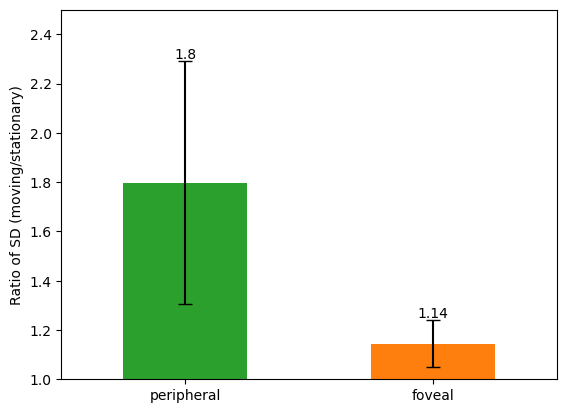

In [366]:
# take a weighted sum of the ratio of filter SD based on the distribution of spatial frequencies observed experimentally.
SD_ratio = windowed_std_moving_responses/windowed_std_stationary_responses
SD_ratio = SD_ratio[0]
# SD_ratio_avg_ori_phase_pos = np.mean(SD_ratio[0, :, :, :, :], axis=(0, 1, 3))
num_ori = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[0]
num_phases = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[1]
num_pos = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[3]

high_freq_weighting_arr = np.tile(high_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))
low_freq_weighting_arr = np.tile(marm_perif_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))

# normalize so all of the weights add up to 1
high_freq_weighting_arr /= np.sum(high_freq_weighting_arr)
low_freq_weighting_arr /= np.sum(low_freq_weighting_arr)

# from statsmodels.stats.weightstats import DescrStatsW
# low_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr).std
# high_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr).std
print(np.shape(SD_ratio))
print(np.shape(high_freq_weighting_arr))
avg_high_freq_SD_ratio = np.average(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr)
avg_low_freq_SD_ratio = np.average(SD_ratio[:, :, :, :], weights=low_freq_weighting_arr)

std_high_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, high_spatial_freq_idx, :]-avg_high_freq_SD_ratio)**2, weights=high_freq_weighting_arr))
std_low_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, :, :]-avg_low_freq_SD_ratio)**2, weights=low_freq_weighting_arr))


p = plt.bar([1, 2], [avg_low_freq_SD_ratio, avg_high_freq_SD_ratio], color=['tab:green', 'tab:orange'], width=.5, yerr=[std_low_freq_SD_ratio, std_high_freq_SD_ratio], capsize=5)
plt.bar_label(p, [np.round(avg_low_freq_SD_ratio, 2), np.round(avg_high_freq_SD_ratio, 2)])
plt.ylim(1, 2.5)
plt.xlim(0.5, 2.5)
plt.ylabel('Ratio of SD (moving/stationary)')
plt.xticks([1, 2], ['peripheral', 'foveal'])
plt.savefig('../manuscript_figures/fig5_SD_bars_peripheral_foveal.pdf', format='pdf', bbox_inches='tight')

In [367]:
num_draws = int(2000)
lambda_idx = 2
num_samples_per_draw = int(1000)
sigma = 50

low_freq_stationary_firing_rates = []
low_freq_moving_firing_rates = []
high_freq_stationary_firing_rates = []
high_freq_moving_firing_rates = []
# low_freqe optimal parameters and choice of orientation, phase, spatial frequency, and position
low_freq_stationary_k = []
low_freq_stationary_L = []
low_freq_moving_k = []
low_freq_moving_L = []
low_freq_ori_idx = []
low_freq_phase_idx = []
low_freq_wavelength_idx = []
low_freq_position_idx = []

high_freq_stationary_k = []
high_freq_stationary_L = []
high_freq_moving_k = []
high_freq_moving_L = []
high_freq_ori_idx = []
high_freq_phase_idx = []
high_freq_wavelength_idx = []
high_freq_position_idx = []

for draw_num in tqdm(range(num_draws)):
    # randomly choose a filter
    i = np.random.randint(0, len(orientation_arr))
    j = np.random.randint(0, len(phase_arr))
    # l_low = np.random.choice(np.arange(len(freq_arr_low_freq)), p=marm_perif_prob) # np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob)
    l_low = np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob) # np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob)
    l_high = np.random.choice(high_spatial_freq_idx, p=high_freq_prob)
    m = np.random.randint(0, len(position_arr))
    # compute firing rates
    # compute the firing rate for the optimal parameters
    stimulus = np.random.laplace(0, sigma, num_samples_per_draw)
    low_freq_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])))
    low_freq_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx])))
    # marm_perif_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])))
    # marm_perif_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx])))
    high_freq_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_high, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])))
    high_freq_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_high, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_high, m, lambda_idx])))
    low_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_moving_k.append(optimal_k_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_moving_L.append(optimal_L_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_ori_idx.append(i)
    low_freq_phase_idx.append(j)
    low_freq_wavelength_idx.append(l_low)
    low_freq_position_idx.append(m)
    high_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_moving_k.append(optimal_k_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_moving_L.append(optimal_L_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_ori_idx.append(i)
    high_freq_phase_idx.append(j)
    high_freq_wavelength_idx.append(l_high)
    high_freq_position_idx.append(m)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2321.51it/s]


In [368]:

low_freq_stationary_firing_rates = np.array(low_freq_stationary_firing_rates)
low_freq_moving_firing_rates = np.array(low_freq_moving_firing_rates)
high_freq_stationary_firing_rates = np.array(high_freq_stationary_firing_rates)
high_freq_moving_firing_rates = np.array(high_freq_moving_firing_rates)
# remove any outliers from the firing rates if they are greater than 3 SD from the mean

# num_sigma = 3
# low_freq_stationary_firing_rates_outliers = np.where(np.abs(low_freq_stationary_firing_rates - np.mean(low_freq_stationary_firing_rates)) > num_sigma * np.std(low_freq_stationary_firing_rates))[0]
# low_freq_moving_firing_rates_outliers = np.where(np.abs(low_freq_moving_firing_rates - np.mean(low_freq_moving_firing_rates)) > num_sigma * np.std(low_freq_moving_firing_rates))[0]
# high_freq_stationary_firing_rates_outliers = np.where(np.abs(high_freq_stationary_firing_rates - np.mean(high_freq_stationary_firing_rates)) > num_sigma * np.std(high_freq_stationary_firing_rates))[0]
# high_freq_moving_firing_rates_outliers = np.where(np.abs(high_freq_moving_firing_rates - np.mean(high_freq_moving_firing_rates)) > num_sigma * np.std(high_freq_moving_firing_rates))[0]
# # merge the outliers for the stationary and moving
# low_freq_stationary_firing_rates_outliers = np.concatenate((low_freq_stationary_firing_rates_outliers, low_freq_moving_firing_rates_outliers))
# # ensure no repeats
# low_freq_stationary_firing_rates_outliers = np.unique(low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates_outliers = np.concatenate((high_freq_stationary_firing_rates_outliers, high_freq_moving_firing_rates_outliers))
# # ensure no repeats
# high_freq_stationary_firing_rates_outliers = np.unique(high_freq_stationary_firing_rates_outliers)
# # remove the outliers from the firing rates
# low_freq_stationary_firing_rates = np.delete(low_freq_stationary_firing_rates, low_freq_stationary_firing_rates_outliers)
# low_freq_moving_firing_rates = np.delete(low_freq_moving_firing_rates, low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates = np.delete(high_freq_stationary_firing_rates, high_freq_stationary_firing_rates_outliers)
# high_freq_moving_firing_rates = np.delete(high_freq_moving_firing_rates, high_freq_stationary_firing_rates_outliers)

0.17250795853399856 1.170716743350572


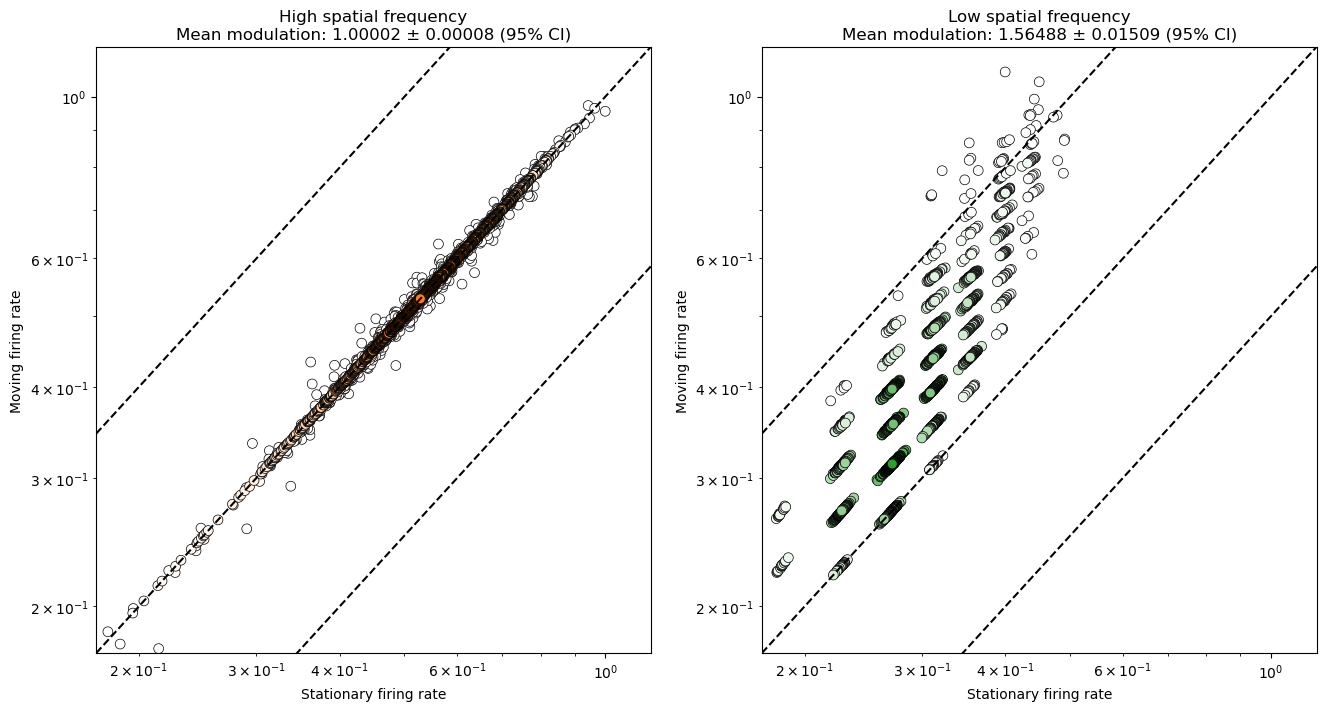

In [369]:
from scipy.stats import gaussian_kde

jitter_sigma = 0

cm = 1/2.54

fig = plt.figure(figsize=(40*cm, 20*cm))

# low_freq_norm = np.max([np.max(avg_stationary_firing_rates[:, :, low_spatial_freq_idx, :].flatten()), np.max(avg_moving_firing_rates[:, :, low_spatial_freq_idx, :].flatten())])

# subtract the minimum firing rate from the firing rates
low_freq_min_val = np.nanmin(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))
normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates - low_freq_min_val
normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates - low_freq_min_val

low_freq_norm = np.max(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates/low_freq_norm
normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates/low_freq_norm

normed_low_freq_stationary_firing_rates *= 0.9
normed_low_freq_moving_firing_rates *= 0.9
normed_low_freq_stationary_firing_rates += 0.1
normed_low_freq_moving_firing_rates += 0.1

xy = np.vstack([normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates])
z = gaussian_kde(xy)(xy)
normed_low_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_stationary_firing_rates))
normed_low_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_moving_firing_rates))


# low_freq_staitonary_sorted = np.argsort(normed_low_freq_stationary_firing_rates.flatten())
low_freq_moving_sorted_idx = np.argsort(z)

low_freq_stationary_sorted = normed_low_freq_stationary_firing_rates[low_freq_moving_sorted_idx]
low_freq_moving_sorted = normed_low_freq_moving_firing_rates[low_freq_moving_sorted_idx]
z = z[low_freq_moving_sorted_idx]

ax = fig.add_subplot(1, 2, 2)
density = ax.scatter(low_freq_stationary_sorted, low_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_green)

# add a colorbar for the density plot
# colorbar(density)

# subtract the minimum firing rate from the firing rates
high_freq_min_val = np.nanmin(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))
normed_high_freq_stationary_firing_rates = high_freq_stationary_firing_rates - high_freq_min_val
normed_high_freq_moving_firing_rates = high_freq_moving_firing_rates - high_freq_min_val

high_freq_norm = np.max(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

normed_high_freq_stationary_firing_rates = normed_high_freq_stationary_firing_rates/high_freq_norm
normed_high_freq_moving_firing_rates = normed_high_freq_moving_firing_rates/high_freq_norm

normed_high_freq_stationary_firing_rates *= 0.9
normed_high_freq_moving_firing_rates *= 0.9
normed_high_freq_stationary_firing_rates += 0.1
normed_high_freq_moving_firing_rates += 0.1

xy = np.vstack([normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten()])
z = gaussian_kde(xy)(xy)
normed_high_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_stationary_firing_rates))
normed_high_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_moving_firing_rates))


high_freq_moving_sorted_idx = np.argsort(z)
high_freq_stationary_sorted = normed_high_freq_stationary_firing_rates[high_freq_moving_sorted_idx]
high_freq_moving_sorted = normed_high_freq_moving_firing_rates[high_freq_moving_sorted_idx]
z = z[high_freq_moving_sorted_idx]

ax2 = fig.add_subplot(1, 2, 1)
# density2 = ax2.scatter(normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten(), s=50, edgecolors='#999999', linewidths=0.5, c=z, cmap=black_to_orange)
density2 = ax2.scatter(high_freq_stationary_sorted, high_freq_moving_sorted, s=50, c=z, edgecolors='#000000', cmap=white_to_orange, linewidths=0.5)

# add a colorbar for the density plot
# colorbar(density2)

# compute the confidence intervals
low_modulation = low_freq_moving_firing_rates / low_freq_stationary_firing_rates
high_modulation = high_freq_moving_firing_rates / high_freq_stationary_firing_rates

low_mean = np.nanmean(low_modulation)
low_sem = np.nanstd(low_modulation) / np.sqrt(np.sum(~np.isnan(low_modulation)))
low_ci = 1.96 * low_sem

high_mean = np.nanmean(high_modulation)
high_sem = np.nanstd(high_modulation) / np.sqrt(np.sum(~np.isnan(high_modulation)))
high_ci = 1.96 * high_sem

ax.set_xlabel('Stationary firing rate')
ax.set_ylabel('Moving firing rate')
ax.set_title(f'Low spatial frequency\nMean modulation: {low_mean:.5f} ± {low_ci:.5f} (95% CI)')
ax2.set_xlabel('Stationary firing rate')
ax2.set_ylabel('Moving firing rate')
ax2.set_title(f'High spatial frequency\nMean modulation: {high_mean:.5f} ± {high_ci:.5f} (95% CI)')

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
# find the min and max y and x values
min_x = ax.get_xlim()[0]
max_x = ax.get_xlim()[1]
min_y = ax.get_ylim()[0]
max_y = ax.get_ylim()[1]
min_both = min(min_x, min_y)
max_both = max(max_x, max_y)
print(min_both, max_both)
ax.set_ylim(min_both, max_both)
ax.set_xlim(min_both, max_both)
ax2.set_ylim(min_both, max_both)
ax2.set_xlim(min_both, max_both)
# min_x2 = ax2.get_xlim()[0]
# max_x2 = ax2.get_xlim()[1]
# min_y2 = ax2.get_ylim()[0]
# max_y2 = ax2.get_ylim()[1]
# min_both2 = min(min_x2, min_y2)
# max_both2 = max(max_x2, max_y2)
# min_both2 = .7
# max_both2 = 1
# ax2.set_ylim(min_both2, max_both2)
# ax2.set_xlim(min_both2, max_both2)

line = np.linspace(min_both, max_both, 100)
# line = np.linspace(min_both, max_both, 100)
ax.plot(line, line, color='k', linestyle='--')
ax.plot(line, 2*line, color='k', linestyle='--')
ax.plot(line, line/2, color='k', linestyle='--')
ax2.plot(line, line, color='k', linestyle='--')
ax2.plot(line, 2*line, color='k', linestyle='--')
ax2.plot(line, line/2, color='k', linestyle='--')

# plt.savefig('../cosyne_2025_figures/marm_fovela_peripheral_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_marm_foveal_peripheral_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

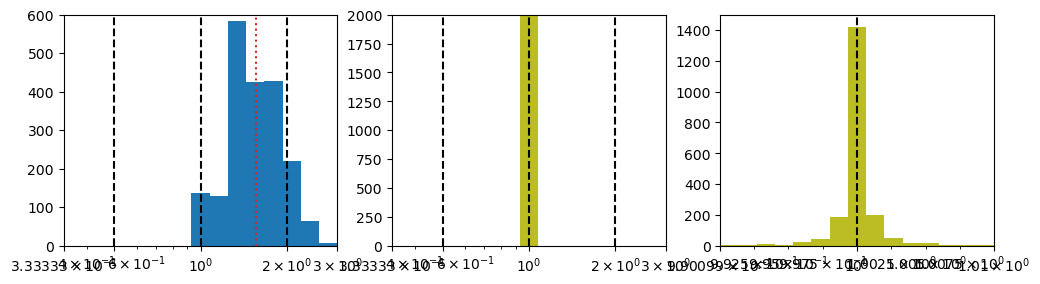

In [373]:
low_max = 3
high_max = 1.01

low_bins = np.logspace(np.log10(1/low_max), np.log10(low_max), 16)
high_bins = np.logspace(np.log10(1/high_max), np.log10(high_max), 16)

fig, ax = plt.subplots(1, 3, figsize=(12,3))

ax[0].hist(low_modulation, bins=low_bins, color='tab:blue')
ax[1].hist(high_modulation, bins=low_bins, color='tab:olive')
ax[2].hist(high_modulation, bins=high_bins, color='tab:olive')
ax[0].axvline(0.5, color='k', linestyle='--')
ax[0].axvline(1, color='k', linestyle='--')
ax[0].axvline(2, color='k', linestyle='--')
ax[1].axvline(0.5, color='k', linestyle='--')
ax[1].axvline(1, color='k', linestyle='--')
ax[1].axvline(2, color='k', linestyle='--')
ax[2].axvline(1, color='k', linestyle='--')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_xlim(1/low_max, low_max)
ax[1].set_xlim(1/low_max, low_max)
ax[2].set_xlim(1/high_max, high_max)
ax[0].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[1].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[2].set_xticks([1/high_max, 1, high_max])
# plot the mean as a line
ax[0].axvline(np.nanmean(low_modulation), color='tab:red', linestyle=':')
ax[0].set_ylim(0, 600)
ax[1].set_ylim(0, 2000)
ax[2].set_ylim(0, 1500)
plt.savefig('../manuscript_figures/fig5_perif_marm_dist_fr_ratio.pdf', format='pdf', bbox_inches='tight')

## PCA

In [285]:
# PCA on the optimal L and optimal k parameters
low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, low_spatial_freq_idx, :, :], moving_firing_rates[:, :, low_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*num_samples).T
# low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates_low_freq, stationary_firing_rates_low_freq), axis=-1).reshape(-1, 2*num_samples).T
high_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, high_spatial_freq_idx, :, :], moving_firing_rates[:, :, high_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*num_samples).T
# low_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, low_spatial_freq_idx, :, lambda_idx].flatten(), optimal_L_arr_moving[:, :, low_spatial_freq_idx, :, lambda_idx].flatten()))
# print(low_spatial_freq_design_mat.shape)
# low_spatial_freq_design_mat = low_spatial_freq_design_mat[:, np.newaxis]
# low_spatial_freq_design_mat = np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates), axis=-1).reshape(-1, 2*num_samples).T
# high_spatial_freq_design_mat = np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates), axis=-1).reshape(-1, 2*num_samples).T

# normalize
low_spatial_freq_design_mat /= np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True)
high_spatial_freq_design_mat /= np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True)
# low_spatial_freq_design_mat = (low_spatial_freq_design_mat-np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True))/np.std(low_spatial_freq_design_mat, axis=0, keepdims=True)
# high_spatial_freq_design_mat = (high_spatial_freq_design_mat-np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True))/np.std(high_spatial_freq_design_mat, axis=0, keepdims=True)

In [ ]:
from sklearn.decomposition import PCA

low_spatial_freq_pca = PCA(n_components=1)
low_spatial_freq_pca.fit(low_spatial_freq_design_mat)

high_spatial_freq_pca = PCA(n_components=1)
high_spatial_freq_pca.fit(high_spatial_freq_design_mat)

# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# ax[0].plot(np.cumsum(low_spatial_freq_pca.explained_variance_ratio_))
# ax[0].set_xlabel('Principal component')
# ax[0].set_ylabel('Explained variance ratio')
# # ax[0, 0].set_ylim(0, 1.1)
# # ax[0, 0].set_xlim(0, 10)
# ax[0].set_title('Explained variance ratio')
# ax[1].plot(np.cumsum(high_spatial_freq_pca.explained_variance_ratio_))
# ax[1].set_xlabel('Principal component')
# ax[1].set_ylabel('Explained variance ratio')
# # ax[0, 1].set_ylim(0, 1.1)
# # ax[0, 1].set_xlim(0, 10)
# ax[1].set_title('Explained variance ratio')

In [ ]:
plt.bar(1, low_spatial_freq_pca.explained_variance_ratio_[0]*100, color='tab:orange', width=0.5)
plt.bar(2, high_spatial_freq_pca.explained_variance_ratio_[0]*100, color='tab:blue', width=0.5)
plt.xlim(0,3)
plt.ylim(85,100)
plt.xticks([1, 2], ['Low spatial frequency', 'High spatial frequency'])
plt.ylabel('Variance explained by PC1 (%)')
# plt.savefig('../manuscript_figures/pca_variance_explained_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../cosyne_2025_figures/pca_variance_explained_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

In [ ]:
low_spatial_freq_scores = low_spatial_freq_pca.transform(low_spatial_freq_design_mat)
high_spatial_freq_scores = high_spatial_freq_pca.transform(high_spatial_freq_design_mat)

low_spatial_freq_scores/=np.std(low_spatial_freq_scores, axis=0, keepdims=True)
high_spatial_freq_scores/=np.std(high_spatial_freq_scores, axis=0, keepdims=True)

# scores = pca.transform(design_mat)
n_draws = num_samples


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

n_draws = num_samples

ax[0, 0].scatter(low_spatial_freq_scores[:n_draws, 0], low_spatial_freq_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0, 0].scatter(low_spatial_freq_scores[n_draws:, 0], low_spatial_freq_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0, 0].set_xlabel('PC1 scores')
ax[0, 0].set_ylabel('PC2 scores')
ax[0, 0].legend()
ax[1, 0].scatter(low_spatial_freq_scores[:n_draws, 1], low_spatial_freq_scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
ax[1, 0].scatter(low_spatial_freq_scores[n_draws:, 1], low_spatial_freq_scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
ax[1, 0].set_xlabel('PC2 scores')
ax[1, 0].set_ylabel('PC3 scores')
ax[1, 0].legend()
ax[0, 0].set_title('Low spatial frequency')
ax[0, 1].set_title('High spatial frequency')

ax[0, 1].scatter(high_spatial_freq_scores[:n_draws, 0], high_spatial_freq_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0, 1].scatter(high_spatial_freq_scores[n_draws:, 0], high_spatial_freq_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0, 1].set_xlabel('PC1 scores')
ax[0, 1].set_ylabel('PC2 scores')
ax[0, 1].legend()
ax[1, 1].scatter(high_spatial_freq_scores[:n_draws, 1], high_spatial_freq_scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
ax[1, 1].scatter(high_spatial_freq_scores[n_draws:, 1], high_spatial_freq_scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
ax[1, 1].set_xlabel('PC2 scores')
ax[1, 1].set_ylabel('PC3 scores')
ax[1, 1].legend()

# ax[0, 2].scatter(scores[:n_draws, 0], scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
# ax[0, 2].scatter(scores[n_draws:, 0], scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
# ax[0, 2].set_xlabel('PC1 scores')
# ax[0, 2].set_ylabel('PC2 scores')
# ax[0, 2].legend()
# ax[1, 2].scatter(scores[:n_draws, 1], scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
# ax[1, 2].scatter(scores[n_draws:, 1], scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
# ax[1, 2].set_xlabel('PC2 scores')
# ax[1, 2].set_ylabel('PC3 scores')
# ax[1, 2].legend()

In [ ]:
# plot a histogram of the scores for the stationary and moving scenarios
fig, ax = plt.subplots(1, 3, figsize=(12*1.25, 3*1.25))

# bins = np.linspace(-25, 25, 100)

# ax[0].hist(low_spatial_freq_scores[:n_draws, 0]/np.std(low_spatial_freq_scores[:n_draws, 0]), weights=np.ones_like(low_spatial_freq_scores[:n_draws, 0])/len(low_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red', density=True)
# ax[0].hist(low_spatial_freq_scores[n_draws:, 0]/np.std(low_spatial_freq_scores[n_draws:, 0]), weights=np.ones_like(low_spatial_freq_scores[n_draws:, 0])/len(low_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue', density=True)
ax[0].hist(low_spatial_freq_scores[:n_draws, 0], weights=np.ones_like(low_spatial_freq_scores[:n_draws, 0])/len(low_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red', density=True)
ax[0].hist(low_spatial_freq_scores[n_draws:, 0], weights=np.ones_like(low_spatial_freq_scores[n_draws:, 0])/len(low_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue', density=True)
ax[0].set_xlabel('PC1 Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()

# bins = np.linspace(-2, 2, 100)

ax[1].hist(high_spatial_freq_scores[:n_draws, 0], weights=np.ones_like(high_spatial_freq_scores[:n_draws, 0])/len(high_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red')
ax[1].hist(high_spatial_freq_scores[n_draws:, 0], weights=np.ones_like(high_spatial_freq_scores[n_draws:, 0])/len(high_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue')
# ax[1].hist(high_spatial_freq_scores[:n_draws, 0]/np.std(high_spatial_freq_scores[:n_draws, 0]), weights=np.ones_like(high_spatial_freq_scores[:n_draws, 0])/len(high_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red')
# ax[1].hist(high_spatial_freq_scores[n_draws:, 0]/np.std(high_spatial_freq_scores[n_draws:, 0]), weights=np.ones_like(high_spatial_freq_scores[n_draws:, 0])/len(high_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue')
ax[1].set_xlabel('PC1 Score')
# ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

# bins = np.linspace(-25, 25, 100)
# ax[2].hist(scores[:n_draws, 0], weights=np.ones_like(scores[:n_draws, 0])/len(scores[:n_draws, 0]), bins=bins, alpha=0.5, label='Stationary', color='tab:red')
# ax[2].hist(scores[n_draws:, 0], weights=np.ones_like(scores[n_draws:, 0])/len(scores[n_draws:, 0]), bins=bins, alpha=0.5, label='Moving', color='tab:blue')
# ax[2].set_xlabel('PC1 Score')
# ax[2].set_ylabel('Probability')
# ax[2].set_title('All spatial frequencies')
# ax[2].legend()

ax[2].scatter(1, np.mean(low_spatial_freq_scores[n_draws:, 0])-np.mean(low_spatial_freq_scores[:n_draws, 0]), color='tab:orange',s=50)
ax[2].scatter(2, np.mean(high_spatial_freq_scores[n_draws:, 0])-np.mean(high_spatial_freq_scores[:n_draws, 0]), color='tab:blue', s=50)
ax[2].errorbar(1, np.mean(low_spatial_freq_scores[n_draws:, 0])-np.mean(low_spatial_freq_scores[:n_draws, 0]), yerr=3*np.std(low_spatial_freq_scores[n_draws:, 0]-low_spatial_freq_scores[:n_draws, 0]), color='tab:orange', linewidth=2)
ax[2].errorbar(2, np.mean(high_spatial_freq_scores[n_draws:, 0])-np.mean(high_spatial_freq_scores[:n_draws, 0]), yerr=3*np.std(high_spatial_freq_scores[n_draws:, 0]-high_spatial_freq_scores[:n_draws, 0]), color='tab:blue', linewidth=2)
ax[2].set_xticks([1, 2], labels=['Low', 'High'])
ax[2].set_ylabel('Difference in PC1 score')
ax[2].set_xlim(0, 3)
ax[2].set_ylim(-1, 3)
ax[2].hlines(0, 0, 3, linestyle='--', color='k', alpha=0.25)
plt.savefig('../manuscript_figures/pca_scores_histogram_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

# a) low dimensional structure
# b) more directly linked to locomotion state for low frequencies, than for high frequencies

## NMF

In [ ]:
# present each nonlinearity a test stimulus and compute the firing rate to the this stimulus. Normalize all responses by a reference firing rate determined by a reference nonlinearity which is the average over the parameters for the low and high spatial frequencies

avg_k_low_spatial_freq = np.mean(np.concatenate((optimal_k_arr_stationary, optimal_k_arr_moving), axis=-1)[:, :, low_spatial_freq_idx, :, lambda_idx, :])

avg_L_low_spatial_freq = np.mean(np.concatenate((optimal_L_arr_stationary, optimal_L_arr_moving), axis=-1)[:, :, low_spatial_freq_idx, :, lambda_idx, :])

avg_k_high_spatial_freq = np.mean(np.concatenate((optimal_k_arr_stationary, optimal_k_arr_moving), axis=-1)[:, :, high_spatial_freq_idx, :, lambda_idx, :])

avg_L_high_spatial_freq = np.mean(np.concatenate((optimal_L_arr_stationary, optimal_L_arr_moving), axis=-1)[:, :, high_spatial_freq_idx, :, lambda_idx, :])

In [ ]:
avg_L_low_spatial_freq

In [ ]:
# plot the reference nonlinearities

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

stim_range = np.linspace(-5, 5, 1000)

test_stim_val = 0.5

ax.plot(stim_range, logistic_func(stim_range, k=avg_k_low_spatial_freq, L=avg_L_low_spatial_freq), label='Low spatial frequency', color='tab:orange')
ax.plot(stim_range, logistic_func(stim_range, k=avg_k_high_spatial_freq, L=avg_L_high_spatial_freq), label='High spatial frequency', color='tab:blue')
ax.vlines(test_stim_val, 0, 2, linestyle='--', color='k')

r_ref_low = logistic_func(test_stim_val, k=avg_k_low_spatial_freq, L=avg_L_low_spatial_freq)
r_ref_high = logistic_func(test_stim_val, k=avg_k_high_spatial_freq, L=avg_L_high_spatial_freq)

In [ ]:
# compute the firing rate for the optimal parameters

norm_moving_firing_rates_low = np.zeros((len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), n_draws))
norm_stationary_firing_rates_low = np.zeros((len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), n_draws))
norm_moving_firing_rates_high = np.zeros((len(orientation_arr), len(phase_arr), len(high_spatial_freq_idx), len(position_arr), n_draws))
norm_stationary_firing_rates_high = np.zeros((len(orientation_arr), len(phase_arr), len(high_spatial_freq_idx), len(position_arr), n_draws))

for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(low_spatial_freq_idx):
            for m, position in enumerate(position_arr):
                for k in range(n_draws):
                    norm_moving_firing_rates_low[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_moving[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_moving[i, j, wavelength, m, lambda_idx, k])
                    norm_stationary_firing_rates_low[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_stationary[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_stationary[i, j, wavelength, m, lambda_idx, k])

for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(high_spatial_freq_idx):
            for m, position in enumerate(position_arr):
                for k in range(n_draws):
                    norm_moving_firing_rates_high[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_moving[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_moving[i, j, wavelength, m, lambda_idx, k])
                    norm_stationary_firing_rates_high[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_stationary[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_stationary[i, j, wavelength, m, lambda_idx, k])

In [ ]:
# normalize the responses

norm_moving_firing_rates_low /= r_ref_low
norm_stationary_firing_rates_low /= r_ref_low

norm_moving_firing_rates_high /= r_ref_high
norm_stationary_firing_rates_high /= r_ref_high

In [ ]:
# save the responses
np.save('norm_moving_firing_rates_low_test_stim_' + str(test_stim_val), norm_moving_firing_rates_low)
np.save('norm_stationary_firing_rates_low_test_stim_' + str(test_stim_val), norm_stationary_firing_rates_low)
np.save('norm_moving_firing_rates_high_test_stim_' + str(test_stim_val), norm_moving_firing_rates_high)
np.save('norm_stationary_firing_rates_high_test_stim_' + str(test_stim_val), norm_stationary_firing_rates_high)

In [ ]:
# load the responses
test_stim_val = 0
norm_moving_firing_rates_low = np.load('norm_moving_firing_rates_low_test_stim_' + str(test_stim_val) + '.npy')
norm_stationary_firing_rates_low = np.load('norm_stationary_firing_rates_low_test_stim_' + str(test_stim_val) + '.npy')
norm_moving_firing_rates_high = np.load('norm_moving_firing_rates_high_test_stim_' + str(test_stim_val) + '.npy')
norm_stationary_firing_rates_high = np.load('norm_stationary_firing_rates_high_test_stim_' + str(test_stim_val) + '.npy')

In [ ]:
bins = np.linspace(0, 5, 100)

plt.hist(norm_moving_firing_rates_low.flatten(), bins=bins, alpha=0.5, label='Moving', color='tab:blue', density=True)
plt.hist(norm_stationary_firing_rates_low.flatten(), bins=bins, alpha=0.5, label='Stationary', color='tab:red', density=True)
plt.legend()
plt.hist(norm_moving_firing_rates_high.flatten(), bins=bins, alpha=0.5, label='Moving', color='tab:blue', density=True, hatch='//')
plt.hist(norm_stationary_firing_rates_high.flatten(), bins=bins, alpha=0.5, label='Stationary', color='tab:red', density=True, hatch='//')

In [ ]:
# low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, low_spatial_freq_idx, :, :], moving_firing_rates[:, :, low_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*n_draws).T
# high_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, high_spatial_freq_idx, :, :], moving_firing_rates[:, :, high_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*n_draws).T

# design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)
# low_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, low_spatial_freq_idx, :, lambda_idx, :], optimal_L_arr_moving[:, :, low_spatial_freq_idx, :, lambda_idx, :]), axis=-1).reshape(-1, 2*n_draws).T
# high_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, high_spatial_freq_idx, :, lambda_idx, :], optimal_L_arr_moving[:, :, high_spatial_freq_idx, :, lambda_idx, :]), axis=-1).reshape(-1, 2*n_draws).T

# design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)

low_spatial_freq_design_mat = np.concatenate((norm_stationary_firing_rates_low, norm_moving_firing_rates_low), axis=-1).reshape(-1, 2*n_draws).T
high_spatial_freq_design_mat = np.concatenate((norm_stationary_firing_rates_high, norm_moving_firing_rates_high), axis=-1).reshape(-1, 2*n_draws).T


In [ ]:
norm_stationary_firing_rates_low.shape

In [286]:
# run NMF on the optimal L and optimal k parameters

from sklearn.decomposition import NMF

low_spatial_freq_nmf = NMF(n_components=1)
low_spatial_freq_nmf.fit(low_spatial_freq_design_mat)

high_spatial_freq_nmf = NMF(n_components=1)
high_spatial_freq_nmf.fit(high_spatial_freq_design_mat)

design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)
nmf = NMF(n_components=1)
nmf.fit(design_mat)

/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=1)

In [287]:
low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)
nmf_scores = nmf.transform(design_mat)

In [288]:
# compute the variance explained by the NMF using scipy metrics
from sklearn.metrics import explained_variance_score
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

low_spatial_freq_nmf_score = get_score(low_spatial_freq_nmf, low_spatial_freq_design_mat)
high_spatial_freq_nmf_score = get_score(high_spatial_freq_nmf, high_spatial_freq_design_mat)

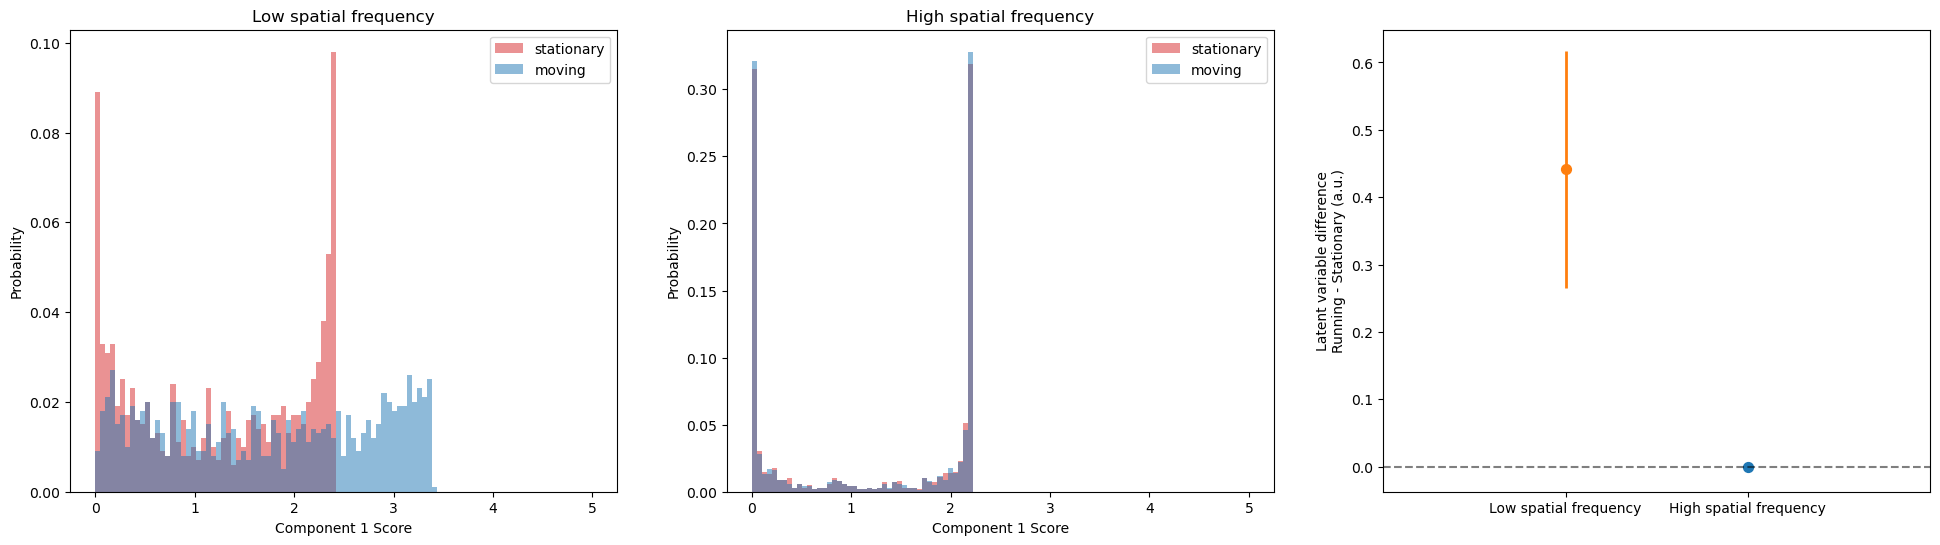

In [290]:
component_idx = 0

bins = np.linspace(0, 5, 100)
n_draws = num_samples

low_diff = low_spatial_freq_nmf_scores[n_draws:, component_idx] - low_spatial_freq_nmf_scores[:n_draws, component_idx]
high_diff = high_spatial_freq_nmf_scores[n_draws:, component_idx] - high_spatial_freq_nmf_scores[:n_draws, component_idx]

# low_diff /= np.std(low_spatial_freq_nmf_scores[:, component_idx])
# high_diff /= np.std(high_spatial_freq_nmf_scores[:, component_idx])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].hist(low_spatial_freq_nmf_scores[:n_draws, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(low_spatial_freq_nmf_scores[:n_draws, component_idx])/len(low_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[0].hist(low_spatial_freq_nmf_scores[n_draws:, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(low_spatial_freq_nmf_scores[n_draws:, component_idx])/len(low_spatial_freq_nmf_scores[n_draws:, component_idx]))
ax[0].set_xlabel(f'Component {component_idx+1} Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()
ax[1].hist(high_spatial_freq_nmf_scores[:n_draws, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(high_spatial_freq_nmf_scores[:n_draws, component_idx])/len(high_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[1].hist(high_spatial_freq_nmf_scores[n_draws:, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(high_spatial_freq_nmf_scores[:n_draws, component_idx])/len(high_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[1].set_xlabel(f'Component {component_idx+1} Score')
ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

ax[2].scatter(1, np.mean(low_diff), color='tab:orange', label='Low spatial frequency', s=50)
ax[2].scatter(2, np.mean(high_diff), color='tab:blue', label='High spatial frequency', s=50)
ax[2].errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='tab:orange', linewidth=2)
ax[2].errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='tab:blue', linewidth=2)
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax[2].set_xlim(0, 3)
ax[2].hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax[2].set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
# plt.savefig('../cosyne_2025_figures/nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# transform the design matrix into the NMF space

low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)
nmf_scores = nmf.transform(design_mat)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(low_spatial_freq_nmf_scores[:n_draws, 0], low_spatial_freq_nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0].scatter(low_spatial_freq_nmf_scores[n_draws:, 0], low_spatial_freq_nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0].set_xlabel('NMF1 scores')
ax[0].set_ylabel('NMF2 scores')
ax[0].legend()
ax[0].set_title('Low spatial frequency')
ax[1].set_title('High spatial frequency')
ax[1].scatter(high_spatial_freq_nmf_scores[:n_draws, 0], high_spatial_freq_nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[1].scatter(high_spatial_freq_nmf_scores[n_draws:, 0], high_spatial_freq_nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[1].set_xlabel('NMF1 scores')
ax[1].set_ylabel('NMF2 scores')
ax[1].legend()
ax[2].scatter(nmf_scores[:n_draws, 0], nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[2].scatter(nmf_scores[n_draws:, 0], nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[2].set_xlabel('NMF1 scores')
ax[2].set_ylabel('NMF2 scores')
ax[2].legend()

## Non-Negative PCA

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np

# Install the required package if not already installed
utils = importr('utils')
robjects.r('''
if (!requireNamespace("nsprcomp", quietly = TRUE)) {
  install.packages("nsprcomp")
}
''')

# Load the nsprcomp package
nsprcomp = importr('nsprcomp')

# Define the Non-negative PCA function using nsprcomp
def non_negative_pca(data, n_components):
    """
    Perform Non-negative PCA using nsprcomp in R via rpy2.
    
    Parameters:
        data (numpy.ndarray): Non-negative input data.
        n_components (int): Number of components to extract.
    
    Returns:
        dict: Contains principal components and loadings as NumPy arrays.
    """
    # Ensure the input data is numeric
    print("Original Data Type in Python:", type(data))  # Check the type of the input
    print("Data Shape:", data.shape)  # Check the shape of the data
    
    # Convert the NumPy array to a list and pass it to R as a matrix
    r_data = robjects.r['matrix'](robjects.FloatVector(data.flatten()), nrow=data.shape[0], ncol=data.shape[1])
    print("Converted Data Type in R:", type(r_data))  # Check the type of the converted data in R
    
    # Check if the data is numeric in R
    is_numeric = robjects.r['is.numeric'](r_data)
    print("Is Data Numeric in R:", is_numeric)  # Debugging if R recognizes the data as numeric
    
    # Perform Non-negative PCA using nsprcomp
    pca_result = nsprcomp.nsprcomp(r_data, ncomp=n_components, nneg=True, scale=True)
    
    # Extract principal components and loadings
    principal_components = pca_result.rx2('x')  # Scores (projected data)
    loadings = pca_result.rx2('rotation')      # Loadings (principal axes)
    
    # Convert the R matrices to Python objects (NumPy arrays)
    principal_components_array = np.array(principal_components)
    loadings_array = np.array(loadings)
    
    return {
        'principal_components': principal_components_array,
        'loadings': loadings_array
    }

# Example usage
if __name__ == "__main__":
    # Create a non-negative data matrix
    np.random.seed(123)
    data_matrix = np.random.normal(0, 1, (2, 20))  # 10x10 matrix of non-negative random values
    # structured as number of feature x number of samples
    print(np.shape(data_matrix))
    
    # Perform Non-negative PCA with 2 components
    result = non_negative_pca(data_matrix, n_components=10)
    
    # Print the results
    print("Principal Components:")
    print(result['principal_components'])
    
    print("Loadings:")
    print(result['loadings'])


# Orientation tuning curves

## Gabor stimuli

In [364]:
from utilities import logistic_func

# define the Gabor filter function
def gabor_filter_func(
    sigma, theta, gamma, wavelength, phase, filt_size, x_offset=0, y_offset=0
):
    y, x = np.meshgrid(
        np.arange(filt_size[1]) - filt_size[1] // 2,
        np.arange(filt_size[0]) - filt_size[0] // 2,
    )
    x = x - x_offset
    y = y + y_offset
    x_prime = x * np.cos(np.pi * theta / 180) + y * np.sin(np.pi * theta / 180)
    y_prime = -x * np.sin(np.pi * theta / 180) + y * np.cos(np.pi * theta / 180)
    filter = np.exp(-0.5 * (x_prime**2 + (gamma * y_prime) ** 2) / sigma**2) * np.cos(
        2 * np.pi * x_prime / wavelength + np.pi * phase / 180)
    filter /= np.linalg.norm(filter)
    return filter

resolution_height = 1080
resolution_width = 1920
filter_size = (resolution_height, resolution_width)

In [369]:
# create a bank of Gabor filters with different orientations, phases, and spatial frequencies
orientation_arr = np.linspace(0, 157.5, 8)
phase_arr = np.linspace(0, 270, 4)
position_arr = np.array([[-resolution_height//4, resolution_width//4], [-resolution_height//4, 0], [-resolution_height//4, -resolution_width//4],
                         [0, resolution_width//4], [0, 0], [0, -resolution_width//4],
                         [resolution_height//4, resolution_width//4], [resolution_height//4, 0], [resolution_height//4, -resolution_width//4]])

pixels_per_degree = 20

filter_size = (resolution_height, resolution_width)

gabor_filter_bank = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr), resolution_height, resolution_width))

for i, orientation in tqdm(enumerate(orientation_arr)):
    print("orientation: " + str(orientation))
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(wavelength_arr[low_spatial_freq_idx]):
            for m, position in enumerate(position_arr):
                gabor_filter = gabor_filter_func(
                    sigma=wavelength/3,
                    theta=orientation,
                    wavelength=wavelength,
                    phase=phase,
                    gamma=1,
                    filt_size=filter_size,
                    x_offset=position[0],
                    y_offset=position[1],
                )
                gabor_filter_bank[i, j, l, m, :, :] = gabor_filter

0it [00:00, ?it/s]

orientation: 0.0


1it [03:06, 186.70s/it]

orientation: 22.5


2it [06:34, 198.96s/it]

orientation: 45.0


3it [09:55, 200.10s/it]

orientation: 67.5


3it [12:13, 244.51s/it]


KeyboardInterrupt: 

In [ ]:
np.arange(0.1, 4.1, 0.1).shape

In [ ]:
# choose a certain filter
orientation_idx = 4
phase_idx = 0
position_idx = 4
downsample_factor = 6
wavelength = 20/(downsample_factor*.1)
lambda_idx = 2
contrast_param = 8

filter_size = (resolution_height//downsample_factor, resolution_width//downsample_factor)
print(filter_size)

sample_filter = gabor_filter_func(
                    sigma=wavelength/3,
                    theta=0,
                    wavelength=wavelength,
                    phase=0,
                    gamma=1,
                    filt_size=filter_size,
                    x_offset=0,
                    y_offset=0,
                )
# sample_filter_2 = gabor_filter_func(
#                     sigma=wavelength/3,
#                     theta=0,
#                     wavelength=wavelength,
#                     phase=0,
#                     gamma=1,
#                     filt_size=filter_size,
#                     x_offset=0,
#                     y_offset=0+200,
#                 )
# sample_filter = gabor_filter_func(
#                     sigma=wavelength/3,
#                     theta=0,
#                     wavelength=wavelength,
#                     phase=0,
#                     gamma=1,
#                     filt_size=filter_size,
#                     x_offset=216,
#                     y_offset=384,
#                 )

# sample_filter_2 = gabor_filter_func(
#                     sigma=wavelength/3,
#                     theta=45,
#                     wavelength=wavelength,
#                     phase=0,
#                     gamma=1,
#                     filt_size=filter_size,
#                     x_offset=216-20*10,
#                     y_offset=384,
#                 )
# sample_filter_3 = gabor_filter_func(
#                     sigma=wavelength/3,
#                     theta=45,
#                     wavelength=wavelength,
#                     phase=0,
#                     gamma=1,
#                     filt_size=filter_size,
#                     x_offset=-216+20*10,
#                     y_offset=-384,
#                 )

plt.imshow(sample_filter)
plt.xlim(resolution_width//(2*downsample_factor)-32/2, resolution_width//(2*downsample_factor)+32/2)
plt.ylim(resolution_height//(2*downsample_factor)-32/2, resolution_height//(2*downsample_factor)+32/2)

In [ ]:
2*wavelength

In [ ]:
np.linspace(-resolution_height//5, resolution_height//5, 2)

In [ ]:
np.linspace(-resolution_width//5, resolution_width//5, 2)

In [392]:
freq_arr_temp = 20/wavelength_arr

In [393]:
freq_arr_temp[18]

0.19999999999999996

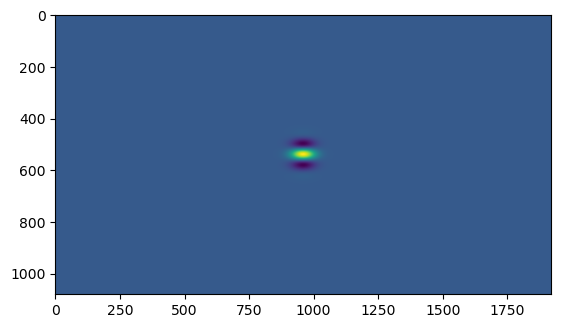

In [407]:
# choose a certain filter
orientation_idx = 0
phase_idx = 0
wavelength_idx = 18
position_idx = 4
lambda_idx = 2
contrast_param = 30

sample_filter = gabor_filter = gabor_filter_func(
                    sigma=wavelength_arr[wavelength_idx]/3,
                    theta=orientation_arr[orientation_idx],
                    wavelength=wavelength_arr[wavelength_idx],
                    phase=phase_arr[phase_idx],
                    gamma=1,
                    filt_size=filter_size,
                    x_offset=position_arr[position_idx, 0],
                    y_offset=position_arr[position_idx, 1],
                )

sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

plt.imshow(sample_filter)

In [408]:
import numpy as np
np.linspace(0, 360, 16, endpoint=False)

array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5])

In [409]:
# generate stimuli as Gabor filters and compute the response with Gabor filters

grating_orientation_arr = np.linspace(0, 360, 16, endpoint=False)

filter_inputs = np.zeros((len(grating_orientation_arr), resolution_height, resolution_width))
for i, orientation in tqdm(enumerate(grating_orientation_arr)):
    print("orientation: " + str(orientation))
    gabor_filter = gabor_filter_func(
                    sigma=wavelength_arr[wavelength_idx]/3,
                    theta=orientation,
                    wavelength=wavelength_arr[wavelength_idx],
                    phase=phase_arr[phase_idx],
                    gamma=1,
                    filt_size=filter_size,
                    x_offset=position_arr[position_idx][0],
                    y_offset=position_arr[position_idx][1],
                )
    filter_inputs[i] = gabor_filter

0it [00:00, ?it/s]

orientation: 0.0


1it [00:00,  3.74it/s]

orientation: 22.5


2it [00:00,  4.07it/s]

orientation: 45.0


4it [00:00,  4.64it/s]

orientation: 67.5
orientation: 90.0


6it [00:01,  5.07it/s]

orientation: 112.5
orientation: 135.0


8it [00:01,  5.31it/s]

orientation: 157.5
orientation: 180.0


9it [00:01,  5.46it/s]

orientation: 202.5


10it [00:02,  4.77it/s]

orientation: 225.0


11it [00:02,  4.74it/s]

orientation: 247.5


12it [00:02,  4.66it/s]

orientation: 270.0


14it [00:02,  4.71it/s]

orientation: 292.5
orientation: 315.0


16it [00:03,  4.85it/s]

orientation: 337.5


In [410]:
# compute the response of the Gabor filter to the drifting gratings
filter_output = np.tensordot(sample_filter, contrast_param*filter_inputs, axes=([-2, -1], [-2, -1]))

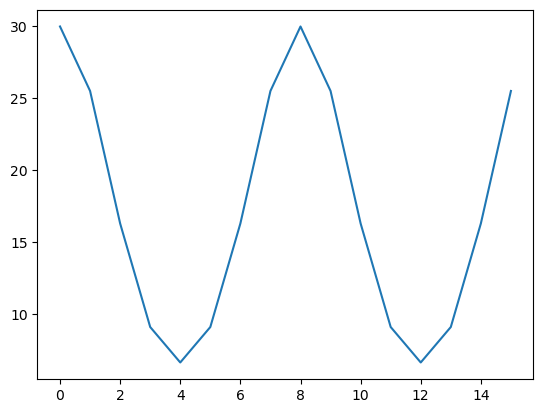

In [411]:
plt.plot(filter_output)

In [412]:

ori_tuning_stationary = np.zeros(len(grating_orientation_arr))
ori_tuning_moving = np.zeros(len(grating_orientation_arr))

# compute the responses of the filter to the drifting gratings
for i, orientation in tqdm(enumerate(grating_orientation_arr)):
    ori_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
    ori_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)

16it [00:00, 46538.74it/s]


In [413]:
# use linear regression on the stationary tuning curve to predict the moving tuning curve
from sklearn.linear_model import LinearRegression

X = ori_tuning_stationary.reshape(-1, 1)
y = ori_tuning_moving

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9980494282260716

[1.13826916]
0.011151605358866556


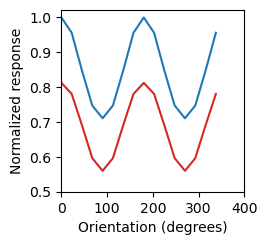

In [415]:
# print the slope and intercept
print(reg.coef_)
print(reg.intercept_)
# reg.predict(X)
# plt.plot(grating_orientation_arr, reg.predict(X), label='Predicted Moving', color='tab:blue', linestyle='--')
# compute norm factor as max of the moving tuning curve and statioary tuning curve
norm_factor = np.max([np.max(ori_tuning_stationary), np.max(ori_tuning_moving)])
fig, ax = plt.subplots(1, 1, figsize=(6*cm, 6*cm))
ax.plot(grating_orientation_arr, ori_tuning_stationary/norm_factor, label='Stationary', color='tab:red')
ax.plot(grating_orientation_arr, ori_tuning_moving/norm_factor, label='Moving', color='tab:blue')
ax.set_xlim(0, 400)
ax.set_ylim(0.5,)
ax.set_xlabel('Orientation (degrees)')
ax.set_ylabel('Normalized response')
# plt.savefig('../cosyne_2025_figures/orientation_tuning_curve_new_example.svg', format='svg', bbox_inches='tight')
plt.savefig(f'../manuscript_figures/fig2_orientation_tuning_curve_new_example_ori_{orientation_idx}_phase_{phase_idx}_freq_{wavelength_idx}_pos_{position_idx}_lambda_{lambda_idx}.svg', format='svg', bbox_inches='tight')



In [ ]:
# have 6 different examples
example_ori_idx = [0, 2, 4, 6, 7, 1]
example_phases = [0, 0, 0, 2, 2, 2]
example_wavelengths = [1, 2, 3, 1, 2, 3]

position_idx = 4
lambda_idx = 2
contrast_param = 10
offset = 0

from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for idx in range(6):
    orientation_idx = example_ori_idx[idx]
    phase_idx = example_phases[idx]
    wavelength_idx = example_wavelengths[idx]

    sample_filter = gabor_filter_bank[orientation_idx, phase_idx, wavelength_idx, position_idx, :, :]

    sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

    # generate stimuli as drifting gratings and compute the response with Gabor filters

    grating_orientation_arr = np.linspace(0, 360, 16, endpoint=False)

    filter_inputs = np.zeros((len(grating_orientation_arr), resolution_height, resolution_width))
    for i, orientation in enumerate(grating_orientation_arr):
        gabor_filter = gabor_filter_func(
                        sigma=wavelength_arr[wavelength_idx]/3,
                        theta=orientation,
                        wavelength=wavelength_arr[wavelength_idx],
                        phase=phase_arr[phase_idx],
                        gamma=1,
                        filt_size=filter_size,
                        x_offset=position_arr[position_idx][0],
                        y_offset=position_arr[position_idx][1],
                    )
        filter_inputs[i] = gabor_filter
    
    # compute the responses
    filter_output = np.tensordot(sample_filter, contrast_param*filter_inputs+offset, axes=([-2, -1], [-2, -1]))

    ori_tuning_stationary = np.zeros(len(grating_orientation_arr))
    ori_tuning_moving = np.zeros(len(grating_orientation_arr))

    # compute the responses of the filter to the drifting gratings
    for i, orientation in enumerate(grating_orientation_arr):
        ori_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
        ori_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)
    
    X = ori_tuning_stationary.reshape(-1, 1)
    y = ori_tuning_moving
    reg = LinearRegression().fit(X, y)

    add_gain = reg.intercept_
    multi_gain = reg.coef_[0]

    # ax[i//3, i%3].plot(grating_orientation_arr, reg.predict(X), label='Predicted Moving', color='tab:blue', linestyle='--')
    ax[idx//3, idx%3].plot(grating_orientation_arr, ori_tuning_stationary, label='Stationary', color='tab:red')
    ax[idx//3, idx%3].plot(grating_orientation_arr, ori_tuning_moving, label='Moving', color='tab:blue')
    # ax[idx//3, idx%3].text(180, 0.5, 'Additive gain: ' + str(np.round(add_gain, 2)))
    # ax[idx//3, idx%3].text(180, 0.45, 'Multiplicative gain: ' + str(np.round(multi_gain, 2)))
    ax[idx//3, idx%3].set_title('Orientation: ' + str(orientation_arr[orientation_idx]) + ', Phase: ' + str(phase_arr[phase_idx]) + ', Frequency: ' + str(freq_arr[wavelength_idx])+ '\nAdditive gain: ' + str(np.round(add_gain, 2)) + ', Multiplicative gain: ' + str(np.round(multi_gain, 2)))

In [418]:
lambda_arr[lambda_idx]

1.0

In [416]:
# compute the additive and multiplicative gain terms for each filter
additive_gains = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
multiplicative_gains = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
grating_orientation_arr = np.linspace(0, 360, 16, endpoint=False)
stationary_tuning_curves = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr), len(grating_orientation_arr)))
moving_tuning_curves = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr), len(grating_orientation_arr)))
contrast_param = 10
offset = 0
from sklearn.linear_model import LinearRegression

for orientation_idx, orientation in tqdm(enumerate(orientation_arr)):
    print("orientation: " + str(orientation))
    for phase_idx, phase in tqdm(enumerate(phase_arr)):
        print("phase: " + str(phase))
        for wavelength_idx, wavelength in tqdm(enumerate(wavelength_arr[low_spatial_freq_idx])):
            print("wavelength: " + str(wavelength))
            for position_idx, position in enumerate(position_arr):
                sample_filter = gabor_filter_bank[orientation_idx, phase_idx, wavelength_idx, position_idx, :, :]

                sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

                # generate stimuli as drifting gratings and compute the response with Gabor filters


                filter_inputs = np.zeros((len(grating_orientation_arr), resolution_height, resolution_width))
                for i, orientation in enumerate(grating_orientation_arr):
                    gabor_filter = gabor_filter_func(
                                    sigma=wavelength_arr[wavelength_idx]/3,
                                    theta=orientation,
                                    wavelength=wavelength_arr[wavelength_idx],
                                    phase=phase_arr[phase_idx],
                                    gamma=1,
                                    filt_size=filter_size,
                                    x_offset=position_arr[position_idx][0],
                                    y_offset=position_arr[position_idx][1],
                                )
                    filter_inputs[i] = gabor_filter
                
                # compute the responses
                filter_output = np.tensordot(sample_filter, contrast_param*filter_inputs+offset, axes=([-2, -1], [-2, -1]))

                ori_tuning_stationary = np.zeros(len(grating_orientation_arr))
                ori_tuning_moving = np.zeros(len(grating_orientation_arr))

                # compute the responses of the filter to the drifting gratings
                for i, orientation in enumerate(grating_orientation_arr):
                    ori_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
                    ori_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)
                
                X = ori_tuning_stationary.reshape(-1, 1)
                y = ori_tuning_moving
                reg = LinearRegression().fit(X, y)

                add_gain = reg.intercept_
                multi_gain = reg.coef_[0]
                additive_gains[orientation_idx, phase_idx, wavelength_idx, position_idx] = add_gain
                multiplicative_gains[orientation_idx, phase_idx, wavelength_idx, position_idx] = multi_gain
                stationary_tuning_curves[orientation_idx, phase_idx, wavelength_idx, position_idx] = ori_tuning_stationary
                moving_tuning_curves[orientation_idx, phase_idx, wavelength_idx, position_idx] = ori_tuning_moving

0it [00:00, ?it/s]

orientation: 0.0



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:30, 30.31s/it]

wavelength: 666.6666666666667




2it [01:01, 30.56s/it]

wavelength: 500.00000000000006




3it [01:31, 30.69s/it]

wavelength: 400.00000000000006




4it [02:02, 30.81s/it]

wavelength: 333.33333333333337




5it [02:33, 30.68s/it]

wavelength: 285.7142857142857




6it [03:04, 30.89s/it]

wavelength: 250.00000000000003




7it [03:35, 30.96s/it]

wavelength: 222.22222222222223




8it [04:07, 31.10s/it]

wavelength: 200.00000000000003




9it [04:38, 31.16s/it]

wavelength: 181.81818181818184




10it [05:09, 31.19s/it]

wavelength: 166.66666666666669




11it [05:39, 30.73s/it]

wavelength: 153.84615384615387




12it [06:07, 29.81s/it]

wavelength: 142.85714285714286




13it [06:38, 30.32s/it]

wavelength: 133.33333333333337




14it [07:09, 30.63s/it]

wavelength: 125.00000000000001




15it [07:41, 30.81s/it]

wavelength: 117.64705882352945




16it [08:12, 31.00s/it]

wavelength: 111.11111111111113




17it [08:44, 31.22s/it]

wavelength: 105.26315789473685




18it [09:15, 31.35s/it]

wavelength: 100.00000000000003




19it [09:47, 31.54s/it]

wavelength: 95.23809523809526




20it [10:19, 31.57s/it]

wavelength: 90.90909090909093




21it [10:51, 31.58s/it]

wavelength: 86.95652173913045




22it [11:22, 31.59s/it]

wavelength: 83.33333333333334




23it [11:54, 31.62s/it]

wavelength: 80.00000000000001




24it [12:26, 31.80s/it]

wavelength: 76.92307692307693




25it [12:58, 31.81s/it]

wavelength: 74.07407407407409




26it [13:30, 31.79s/it]

wavelength: 71.42857142857143




27it [14:02, 31.80s/it]

wavelength: 68.96551724137932




28it [14:33, 31.79s/it]

wavelength: 66.66666666666667




29it [15:05, 31.82s/it]

wavelength: 64.51612903225806




30it [15:37, 31.80s/it]

wavelength: 62.50000000000001




31it [16:09, 31.27s/it]

1it [16:09, 969.45s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:30, 30.50s/it]

wavelength: 666.6666666666667




2it [01:01, 30.52s/it]

wavelength: 500.00000000000006




3it [01:31, 30.63s/it]

wavelength: 400.00000000000006




4it [02:02, 30.75s/it]

wavelength: 333.33333333333337




5it [02:33, 30.81s/it]

wavelength: 285.7142857142857




6it [03:04, 30.87s/it]

wavelength: 250.00000000000003




7it [03:35, 30.97s/it]

wavelength: 222.22222222222223




8it [04:06, 31.00s/it]

wavelength: 200.00000000000003




9it [04:38, 31.09s/it]

wavelength: 181.81818181818184




10it [05:06, 30.15s/it]

wavelength: 166.66666666666669




11it [05:37, 30.57s/it]

wavelength: 153.84615384615387




12it [06:08, 30.75s/it]

wavelength: 142.85714285714286




13it [06:36, 29.76s/it]

wavelength: 133.33333333333337




14it [07:07, 30.02s/it]

wavelength: 125.00000000000001




15it [07:38, 30.60s/it]

wavelength: 117.64705882352945




16it [08:08, 30.20s/it]

wavelength: 111.11111111111113




17it [08:40, 30.81s/it]

wavelength: 105.26315789473685




18it [09:11, 30.80s/it]

wavelength: 100.00000000000003




19it [09:43, 31.28s/it]

wavelength: 95.23809523809526




20it [10:15, 31.43s/it]

wavelength: 90.90909090909093




21it [10:46, 31.36s/it]

wavelength: 86.95652173913045




22it [11:15, 30.67s/it]

wavelength: 83.33333333333334




23it [11:46, 30.68s/it]

wavelength: 80.00000000000001




24it [12:18, 31.23s/it]

wavelength: 76.92307692307693




25it [12:50, 31.41s/it]

wavelength: 74.07407407407409




26it [13:22, 31.55s/it]

wavelength: 71.42857142857143




27it [13:51, 30.83s/it]

wavelength: 68.96551724137932




28it [14:23, 31.20s/it]

wavelength: 66.66666666666667




29it [14:54, 31.00s/it]

wavelength: 64.51612903225806




30it [15:26, 31.29s/it]

wavelength: 62.50000000000001




31it [15:58, 30.91s/it]

2it [32:07, 962.83s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:30, 30.62s/it]

wavelength: 666.6666666666667




2it [01:01, 30.55s/it]

wavelength: 500.00000000000006




3it [01:31, 30.61s/it]

wavelength: 400.00000000000006




4it [02:02, 30.70s/it]

wavelength: 333.33333333333337




5it [02:33, 30.76s/it]

wavelength: 285.7142857142857




6it [03:04, 30.73s/it]

wavelength: 250.00000000000003




7it [03:34, 30.72s/it]

wavelength: 222.22222222222223




8it [04:05, 30.74s/it]

wavelength: 200.00000000000003




9it [04:36, 30.80s/it]

wavelength: 181.81818181818184




10it [05:07, 30.79s/it]

wavelength: 166.66666666666669




11it [05:38, 30.80s/it]

wavelength: 153.84615384615387




12it [06:09, 30.81s/it]

wavelength: 142.85714285714286




13it [06:39, 30.82s/it]

wavelength: 133.33333333333337




14it [07:10, 30.86s/it]

wavelength: 125.00000000000001




15it [07:41, 30.87s/it]

wavelength: 117.64705882352945




16it [08:12, 30.93s/it]

wavelength: 111.11111111111113




17it [08:44, 31.08s/it]

wavelength: 105.26315789473685




18it [09:15, 31.15s/it]

wavelength: 100.00000000000003




19it [09:47, 31.31s/it]

wavelength: 95.23809523809526




20it [10:18, 31.32s/it]

wavelength: 90.90909090909093




21it [10:48, 31.06s/it]

wavelength: 86.95652173913045




22it [11:16, 30.11s/it]

wavelength: 83.33333333333334




23it [11:48, 30.51s/it]

wavelength: 80.00000000000001




24it [12:20, 30.90s/it]

wavelength: 76.92307692307693




25it [12:51, 31.03s/it]

wavelength: 74.07407407407409




26it [13:22, 31.13s/it]

wavelength: 71.42857142857143




27it [13:54, 31.19s/it]

wavelength: 68.96551724137932




28it [14:25, 31.22s/it]

wavelength: 66.66666666666667




29it [14:56, 31.28s/it]

wavelength: 64.51612903225806




30it [15:28, 31.28s/it]

wavelength: 62.50000000000001




31it [15:59, 30.95s/it]

3it [48:07, 961.32s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:30, 30.34s/it]

wavelength: 666.6666666666667




2it [01:00, 30.32s/it]

wavelength: 500.00000000000006




3it [01:31, 30.35s/it]

wavelength: 400.00000000000006




4it [02:01, 30.39s/it]

wavelength: 333.33333333333337




5it [02:31, 30.42s/it]

wavelength: 285.7142857142857




6it [03:02, 30.41s/it]

wavelength: 250.00000000000003




7it [03:33, 30.50s/it]

wavelength: 222.22222222222223




8it [04:03, 30.52s/it]

wavelength: 200.00000000000003




9it [04:34, 30.58s/it]

wavelength: 181.81818181818184




10it [05:04, 30.59s/it]

wavelength: 166.66666666666669




11it [05:35, 30.63s/it]

wavelength: 153.84615384615387




12it [06:06, 30.65s/it]

wavelength: 142.85714285714286




13it [06:37, 30.68s/it]

wavelength: 133.33333333333337




14it [07:07, 30.71s/it]

wavelength: 125.00000000000001




15it [07:38, 30.78s/it]

wavelength: 117.64705882352945




16it [08:09, 30.83s/it]

wavelength: 111.11111111111113




17it [08:41, 30.98s/it]

wavelength: 105.26315789473685




18it [09:12, 31.05s/it]

wavelength: 100.00000000000003




19it [09:41, 30.41s/it]

wavelength: 95.23809523809526




20it [10:12, 30.69s/it]

wavelength: 90.90909090909093




21it [10:43, 30.89s/it]

wavelength: 86.95652173913045




22it [11:12, 30.10s/it]

wavelength: 83.33333333333334




23it [11:43, 30.52s/it]

wavelength: 80.00000000000001




24it [12:15, 30.89s/it]

wavelength: 76.92307692307693




25it [12:46, 31.02s/it]

wavelength: 74.07407407407409




26it [13:18, 31.10s/it]

wavelength: 71.42857142857143




27it [13:49, 31.16s/it]

wavelength: 68.96551724137932




28it [14:20, 31.20s/it]

wavelength: 66.66666666666667




29it [14:52, 31.26s/it]

wavelength: 64.51612903225806




30it [15:23, 31.28s/it]

wavelength: 62.50000000000001




31it [15:54, 30.80s/it]

4it [1:04:01, 960.46s/it]
1it [1:04:01, 3841.85s/it]

orientation: 22.5



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:29, 29.64s/it]

wavelength: 666.6666666666667




2it [00:59, 29.83s/it]

wavelength: 500.00000000000006




3it [01:29, 30.02s/it]

wavelength: 400.00000000000006




4it [02:00, 30.12s/it]

wavelength: 333.33333333333337




5it [02:30, 30.22s/it]

wavelength: 285.7142857142857




6it [03:01, 30.38s/it]

wavelength: 250.00000000000003




7it [03:31, 30.43s/it]

wavelength: 222.22222222222223




8it [04:02, 30.50s/it]

wavelength: 200.00000000000003




9it [04:33, 30.62s/it]

wavelength: 181.81818181818184




10it [05:03, 30.63s/it]

wavelength: 166.66666666666669




11it [05:34, 30.68s/it]

wavelength: 153.84615384615387




12it [06:05, 30.69s/it]

wavelength: 142.85714285714286




13it [06:36, 30.73s/it]

wavelength: 133.33333333333337




14it [07:04, 30.08s/it]

wavelength: 125.00000000000001




15it [07:35, 30.38s/it]

wavelength: 117.64705882352945




16it [08:06, 30.59s/it]

wavelength: 111.11111111111113




17it [08:38, 30.83s/it]

wavelength: 105.26315789473685




18it [09:09, 30.97s/it]

wavelength: 100.00000000000003




19it [09:38, 30.37s/it]

wavelength: 95.23809523809526




20it [10:06, 29.65s/it]

wavelength: 90.90909090909093




21it [10:38, 30.22s/it]

wavelength: 86.95652173913045




22it [11:09, 30.55s/it]

wavelength: 83.33333333333334




23it [11:40, 30.78s/it]

wavelength: 80.00000000000001




24it [12:12, 31.08s/it]

wavelength: 76.92307692307693




25it [12:44, 31.19s/it]

wavelength: 74.07407407407409




26it [13:15, 31.27s/it]

wavelength: 71.42857142857143




27it [13:46, 31.33s/it]

wavelength: 68.96551724137932




28it [14:18, 31.35s/it]

wavelength: 66.66666666666667




29it [14:49, 31.40s/it]

wavelength: 64.51612903225806




30it [15:21, 31.41s/it]

wavelength: 62.50000000000001




31it [15:52, 30.73s/it]

1it [15:52, 952.66s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:28, 28.60s/it]

wavelength: 666.6666666666667




2it [00:55, 27.55s/it]

wavelength: 500.00000000000006




3it [01:26, 28.96s/it]

wavelength: 400.00000000000006




4it [01:56, 29.66s/it]

wavelength: 333.33333333333337




5it [02:24, 28.88s/it]

wavelength: 285.7142857142857




6it [02:51, 28.36s/it]

wavelength: 250.00000000000003




7it [03:19, 28.07s/it]

wavelength: 222.22222222222223




8it [03:47, 28.13s/it]

wavelength: 200.00000000000003




9it [04:15, 28.01s/it]

wavelength: 181.81818181818184




10it [04:42, 27.83s/it]

wavelength: 166.66666666666669




11it [05:10, 27.73s/it]

wavelength: 153.84615384615387




12it [05:37, 27.65s/it]

wavelength: 142.85714285714286




13it [06:05, 27.60s/it]

wavelength: 133.33333333333337




14it [06:32, 27.61s/it]

wavelength: 125.00000000000001




15it [07:00, 27.64s/it]

wavelength: 117.64705882352945




16it [07:28, 27.68s/it]

wavelength: 111.11111111111113




17it [07:56, 27.80s/it]

wavelength: 105.26315789473685




18it [08:24, 27.86s/it]

wavelength: 100.00000000000003




19it [08:52, 28.01s/it]

wavelength: 95.23809523809526




20it [09:20, 27.99s/it]

wavelength: 90.90909090909093




21it [09:48, 27.96s/it]

wavelength: 86.95652173913045




22it [10:16, 27.96s/it]

wavelength: 83.33333333333334




23it [10:44, 28.02s/it]

wavelength: 80.00000000000001




24it [11:13, 28.17s/it]

wavelength: 76.92307692307693




25it [11:41, 28.14s/it]

wavelength: 74.07407407407409




26it [12:09, 28.12s/it]

wavelength: 71.42857142857143




27it [12:37, 28.12s/it]

wavelength: 68.96551724137932




28it [13:06, 28.49s/it]

wavelength: 66.66666666666667




29it [13:36, 28.87s/it]

wavelength: 64.51612903225806




30it [14:05, 28.90s/it]

wavelength: 62.50000000000001




31it [14:35, 28.23s/it]

2it [30:27, 907.02s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.09s/it]

wavelength: 666.6666666666667




2it [00:54, 27.00s/it]

wavelength: 500.00000000000006




3it [01:21, 27.08s/it]

wavelength: 400.00000000000006




4it [01:48, 27.15s/it]

wavelength: 333.33333333333337




5it [02:15, 27.22s/it]

wavelength: 285.7142857142857




6it [02:43, 27.27s/it]

wavelength: 250.00000000000003




7it [03:10, 27.30s/it]

wavelength: 222.22222222222223




8it [03:39, 27.91s/it]

wavelength: 200.00000000000003




9it [04:07, 27.92s/it]

wavelength: 181.81818181818184




10it [04:35, 27.82s/it]

wavelength: 166.66666666666669




11it [05:02, 27.76s/it]

wavelength: 153.84615384615387




12it [05:30, 27.70s/it]

wavelength: 142.85714285714286




13it [05:58, 27.70s/it]

wavelength: 133.33333333333337




14it [06:25, 27.70s/it]

wavelength: 125.00000000000001




15it [06:53, 27.69s/it]

wavelength: 117.64705882352945




16it [07:21, 27.75s/it]

wavelength: 111.11111111111113




17it [07:49, 27.87s/it]

wavelength: 105.26315789473685




18it [08:17, 27.94s/it]

wavelength: 100.00000000000003




19it [08:48, 28.68s/it]

wavelength: 95.23809523809526




20it [09:19, 29.43s/it]

wavelength: 90.90909090909093




21it [09:47, 29.07s/it]

wavelength: 86.95652173913045




22it [10:15, 28.75s/it]

wavelength: 83.33333333333334




23it [10:45, 29.03s/it]

wavelength: 80.00000000000001




24it [11:13, 28.94s/it]

wavelength: 76.92307692307693




25it [11:42, 28.71s/it]

wavelength: 74.07407407407409




26it [12:10, 28.52s/it]

wavelength: 71.42857142857143




27it [12:38, 28.41s/it]

wavelength: 68.96551724137932




28it [13:06, 28.32s/it]

wavelength: 66.66666666666667




29it [13:34, 28.28s/it]

wavelength: 64.51612903225806




30it [14:02, 28.23s/it]

wavelength: 62.50000000000001




31it [14:30, 28.09s/it]

3it [44:58, 890.46s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.16s/it]

wavelength: 666.6666666666667




2it [00:54, 27.09s/it]

wavelength: 500.00000000000006




3it [01:21, 27.14s/it]

wavelength: 400.00000000000006




4it [01:48, 27.21s/it]

wavelength: 333.33333333333337




5it [02:15, 27.24s/it]

wavelength: 285.7142857142857




6it [02:43, 27.26s/it]

wavelength: 250.00000000000003




7it [03:10, 27.33s/it]

wavelength: 222.22222222222223




8it [03:38, 27.35s/it]

wavelength: 200.00000000000003




9it [04:05, 27.48s/it]

wavelength: 181.81818181818184




10it [04:33, 27.50s/it]

wavelength: 166.66666666666669




11it [05:01, 27.53s/it]

wavelength: 153.84615384615387




12it [05:28, 27.54s/it]

wavelength: 142.85714285714286




13it [05:56, 27.58s/it]

wavelength: 133.33333333333337




14it [06:24, 27.62s/it]

wavelength: 125.00000000000001




15it [06:51, 27.67s/it]

wavelength: 117.64705882352945




16it [07:19, 27.71s/it]

wavelength: 111.11111111111113




17it [07:47, 27.81s/it]

wavelength: 105.26315789473685




18it [08:15, 27.88s/it]

wavelength: 100.00000000000003




19it [08:44, 28.04s/it]

wavelength: 95.23809523809526




20it [09:12, 28.02s/it]

wavelength: 90.90909090909093




21it [09:40, 28.04s/it]

wavelength: 86.95652173913045




22it [10:08, 28.14s/it]

wavelength: 83.33333333333334




23it [10:36, 28.18s/it]

wavelength: 80.00000000000001




24it [11:05, 28.32s/it]

wavelength: 76.92307692307693




25it [11:33, 28.31s/it]

wavelength: 74.07407407407409




26it [12:02, 28.32s/it]

wavelength: 71.42857142857143




27it [12:30, 28.31s/it]

wavelength: 68.96551724137932




28it [13:00, 28.92s/it]

wavelength: 66.66666666666667




29it [13:29, 28.74s/it]

wavelength: 64.51612903225806




30it [13:57, 28.56s/it]

wavelength: 62.50000000000001




31it [14:25, 27.92s/it]

4it [59:23, 890.99s/it]
2it [2:03:25, 3678.40s/it]

orientation: 45.0



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.54s/it]

wavelength: 666.6666666666667




2it [00:53, 26.73s/it]

wavelength: 500.00000000000006




3it [01:20, 26.90s/it]

wavelength: 400.00000000000006




4it [01:47, 27.05s/it]

wavelength: 333.33333333333337




5it [02:15, 27.19s/it]

wavelength: 285.7142857142857




6it [02:42, 27.26s/it]

wavelength: 250.00000000000003




7it [03:10, 27.31s/it]

wavelength: 222.22222222222223




8it [03:37, 27.37s/it]

wavelength: 200.00000000000003




9it [04:05, 27.46s/it]

wavelength: 181.81818181818184




10it [04:32, 27.46s/it]

wavelength: 166.66666666666669




11it [05:00, 27.49s/it]

wavelength: 153.84615384615387




12it [05:28, 27.64s/it]

wavelength: 142.85714285714286




13it [05:55, 27.67s/it]

wavelength: 133.33333333333337




14it [06:23, 27.62s/it]

wavelength: 125.00000000000001




15it [06:50, 27.60s/it]

wavelength: 117.64705882352945




16it [07:18, 27.63s/it]

wavelength: 111.11111111111113




17it [07:46, 27.77s/it]

wavelength: 105.26315789473685




18it [08:14, 27.86s/it]

wavelength: 100.00000000000003




19it [08:43, 28.03s/it]

wavelength: 95.23809523809526




20it [09:11, 28.02s/it]

wavelength: 90.90909090909093




21it [09:39, 28.03s/it]

wavelength: 86.95652173913045




22it [10:07, 28.02s/it]

wavelength: 83.33333333333334




23it [10:35, 28.01s/it]

wavelength: 80.00000000000001




24it [11:03, 28.15s/it]

wavelength: 76.92307692307693




25it [11:31, 28.16s/it]

wavelength: 74.07407407407409




26it [12:00, 28.15s/it]

wavelength: 71.42857142857143




27it [12:28, 28.15s/it]

wavelength: 68.96551724137932




28it [12:56, 28.12s/it]

wavelength: 66.66666666666667




29it [13:24, 28.15s/it]

wavelength: 64.51612903225806




30it [13:52, 28.11s/it]

wavelength: 62.50000000000001




31it [14:20, 27.76s/it]

1it [14:20, 860.46s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.52s/it]

wavelength: 666.6666666666667




2it [00:53, 26.68s/it]

wavelength: 500.00000000000006




3it [01:20, 26.87s/it]

wavelength: 400.00000000000006




4it [01:47, 26.98s/it]

wavelength: 333.33333333333337




5it [02:17, 27.98s/it]

wavelength: 285.7142857142857




6it [02:44, 27.81s/it]

wavelength: 250.00000000000003




7it [03:12, 27.69s/it]

wavelength: 222.22222222222223




8it [03:39, 27.58s/it]

wavelength: 200.00000000000003




9it [04:07, 27.55s/it]

wavelength: 181.81818181818184




10it [04:34, 27.50s/it]

wavelength: 166.66666666666669




11it [05:01, 27.49s/it]

wavelength: 153.84615384615387




12it [05:29, 27.58s/it]

wavelength: 142.85714285714286




13it [05:57, 27.58s/it]

wavelength: 133.33333333333337




14it [06:24, 27.61s/it]

wavelength: 125.00000000000001




15it [06:52, 27.68s/it]

wavelength: 117.64705882352945




16it [07:20, 27.73s/it]

wavelength: 111.11111111111113




17it [07:49, 27.92s/it]

wavelength: 105.26315789473685




18it [08:17, 27.97s/it]

wavelength: 100.00000000000003




19it [08:45, 28.10s/it]

wavelength: 95.23809523809526




20it [09:16, 28.95s/it]

wavelength: 90.90909090909093




21it [09:44, 28.72s/it]

wavelength: 86.95652173913045




22it [10:15, 29.48s/it]

wavelength: 83.33333333333334




23it [10:46, 29.73s/it]

wavelength: 80.00000000000001




24it [11:15, 29.71s/it]

wavelength: 76.92307692307693




25it [11:45, 29.61s/it]

wavelength: 74.07407407407409




26it [12:13, 29.14s/it]

wavelength: 71.42857142857143




27it [12:42, 29.10s/it]

wavelength: 68.96551724137932




28it [13:10, 28.83s/it]

wavelength: 66.66666666666667




29it [13:39, 28.80s/it]

wavelength: 64.51612903225806




30it [14:07, 28.65s/it]

wavelength: 62.50000000000001




31it [14:35, 28.25s/it]

2it [28:56, 869.41s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.78s/it]

wavelength: 666.6666666666667




2it [00:53, 26.87s/it]

wavelength: 500.00000000000006




3it [01:20, 26.96s/it]

wavelength: 400.00000000000006




4it [01:47, 27.05s/it]

wavelength: 333.33333333333337




5it [02:15, 27.10s/it]

wavelength: 285.7142857142857




6it [02:42, 27.14s/it]

wavelength: 250.00000000000003




7it [03:09, 27.20s/it]

wavelength: 222.22222222222223




8it [03:37, 27.24s/it]

wavelength: 200.00000000000003




9it [04:04, 27.33s/it]

wavelength: 181.81818181818184




10it [04:31, 27.33s/it]

wavelength: 166.66666666666669




11it [04:59, 27.38s/it]

wavelength: 153.84615384615387




12it [05:26, 27.39s/it]

wavelength: 142.85714285714286




13it [05:54, 27.41s/it]

wavelength: 133.33333333333337




14it [06:21, 27.45s/it]

wavelength: 125.00000000000001




15it [06:49, 27.48s/it]

wavelength: 117.64705882352945




16it [07:17, 27.55s/it]

wavelength: 111.11111111111113




17it [07:45, 27.69s/it]

wavelength: 105.26315789473685




18it [08:13, 27.77s/it]

wavelength: 100.00000000000003




19it [08:41, 27.93s/it]

wavelength: 95.23809523809526




20it [09:09, 27.94s/it]

wavelength: 90.90909090909093




21it [09:37, 27.95s/it]

wavelength: 86.95652173913045




22it [10:05, 27.95s/it]

wavelength: 83.33333333333334




23it [10:33, 27.93s/it]

wavelength: 80.00000000000001




24it [11:01, 28.07s/it]

wavelength: 76.92307692307693




25it [11:29, 28.06s/it]

wavelength: 74.07407407407409




26it [12:00, 28.97s/it]

wavelength: 71.42857142857143




27it [12:28, 28.80s/it]

wavelength: 68.96551724137932




28it [12:57, 28.61s/it]

wavelength: 66.66666666666667




29it [13:28, 29.38s/it]

wavelength: 64.51612903225806




30it [13:56, 29.09s/it]

wavelength: 62.50000000000001




31it [14:24, 27.90s/it]

3it [43:20, 867.31s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.18s/it]

wavelength: 666.6666666666667




2it [00:54, 27.15s/it]

wavelength: 500.00000000000006




6it [02:43, 27.32s/it]

wavelength: 250.00000000000003




7it [03:13, 28.01s/it]

wavelength: 222.22222222222223




8it [03:40, 27.88s/it]

wavelength: 200.00000000000003




9it [04:08, 27.79s/it]

wavelength: 181.81818181818184




10it [04:35, 27.67s/it]

wavelength: 166.66666666666669




11it [05:03, 27.62s/it]

wavelength: 153.84615384615387




12it [05:31, 27.95s/it]

wavelength: 142.85714285714286




13it [05:59, 27.89s/it]

wavelength: 133.33333333333337




14it [06:27, 27.80s/it]

wavelength: 125.00000000000001




15it [06:54, 27.78s/it]

wavelength: 117.64705882352945




16it [07:22, 27.78s/it]

wavelength: 111.11111111111113




17it [07:50, 27.86s/it]

wavelength: 105.26315789473685




18it [08:18, 27.91s/it]

wavelength: 100.00000000000003




19it [08:48, 28.52s/it]

wavelength: 95.23809523809526




20it [09:16, 28.42s/it]

wavelength: 90.90909090909093




21it [09:44, 28.29s/it]

wavelength: 86.95652173913045




22it [10:15, 28.96s/it]

wavelength: 83.33333333333334




23it [10:43, 28.78s/it]

wavelength: 80.00000000000001




24it [11:12, 28.67s/it]

wavelength: 76.92307692307693




25it [11:40, 28.51s/it]

wavelength: 74.07407407407409




26it [12:08, 28.37s/it]

wavelength: 71.42857142857143




27it [12:36, 28.29s/it]

wavelength: 68.96551724137932




28it [13:04, 28.22s/it]

wavelength: 66.66666666666667




29it [13:32, 28.21s/it]

wavelength: 64.51612903225806




30it [14:00, 28.18s/it]

wavelength: 62.50000000000001




31it [14:28, 28.03s/it]

4it [57:49, 867.47s/it]
3it [3:01:15, 3583.19s/it]

orientation: 67.5



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.44s/it]

wavelength: 666.6666666666667




2it [00:53, 26.62s/it]

wavelength: 500.00000000000006




3it [01:22, 27.97s/it]

wavelength: 400.00000000000006




4it [01:50, 27.70s/it]

wavelength: 333.33333333333337




5it [02:17, 27.55s/it]

wavelength: 285.7142857142857




6it [02:44, 27.49s/it]

wavelength: 250.00000000000003




7it [03:12, 27.44s/it]

wavelength: 222.22222222222223




8it [03:39, 27.44s/it]

wavelength: 200.00000000000003




9it [04:07, 27.49s/it]

wavelength: 181.81818181818184




10it [04:34, 27.51s/it]

wavelength: 166.66666666666669




11it [05:02, 27.53s/it]

wavelength: 153.84615384615387




12it [05:29, 27.52s/it]

wavelength: 142.85714285714286




13it [05:57, 27.56s/it]

wavelength: 133.33333333333337




14it [06:25, 27.59s/it]

wavelength: 125.00000000000001




15it [06:52, 27.59s/it]

wavelength: 117.64705882352945




16it [07:20, 27.65s/it]

wavelength: 111.11111111111113




17it [07:48, 27.79s/it]

wavelength: 105.26315789473685




18it [08:16, 27.88s/it]

wavelength: 100.00000000000003




19it [08:44, 28.03s/it]

wavelength: 95.23809523809526




20it [09:13, 28.10s/it]

wavelength: 90.90909090909093




21it [09:42, 28.57s/it]

wavelength: 86.95652173913045




22it [10:11, 28.50s/it]

wavelength: 83.33333333333334




23it [10:42, 29.34s/it]

wavelength: 80.00000000000001




24it [11:11, 29.19s/it]

wavelength: 76.92307692307693




25it [11:39, 28.91s/it]

wavelength: 74.07407407407409




26it [12:07, 28.71s/it]

wavelength: 71.42857142857143




27it [12:36, 28.58s/it]

wavelength: 68.96551724137932




28it [13:04, 28.47s/it]

wavelength: 66.66666666666667




29it [13:32, 28.43s/it]

wavelength: 64.51612903225806




30it [14:00, 28.36s/it]

wavelength: 62.50000000000001




31it [14:29, 28.03s/it]

1it [14:29, 869.02s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.72s/it]

wavelength: 666.6666666666667




2it [00:53, 26.88s/it]

wavelength: 500.00000000000006




3it [01:20, 27.04s/it]

wavelength: 400.00000000000006




4it [01:48, 27.17s/it]

wavelength: 333.33333333333337




5it [02:15, 27.25s/it]

wavelength: 285.7142857142857




6it [02:43, 27.31s/it]

wavelength: 250.00000000000003




7it [03:10, 27.47s/it]

wavelength: 222.22222222222223




8it [03:38, 27.51s/it]

wavelength: 200.00000000000003




9it [04:06, 27.59s/it]

wavelength: 181.81818181818184




10it [04:33, 27.57s/it]

wavelength: 166.66666666666669




11it [05:03, 28.14s/it]

wavelength: 153.84615384615387




12it [05:30, 28.02s/it]

wavelength: 142.85714285714286




13it [05:58, 27.88s/it]

wavelength: 133.33333333333337




14it [06:26, 27.81s/it]

wavelength: 125.00000000000001




15it [06:53, 27.79s/it]

wavelength: 117.64705882352945




16it [07:24, 28.71s/it]

wavelength: 111.11111111111113




17it [07:53, 28.61s/it]

wavelength: 105.26315789473685




18it [08:21, 28.44s/it]

wavelength: 100.00000000000003




19it [08:49, 28.48s/it]

wavelength: 95.23809523809526




20it [09:17, 28.36s/it]

wavelength: 90.90909090909093




21it [09:45, 28.28s/it]

wavelength: 86.95652173913045




22it [10:14, 28.22s/it]

wavelength: 83.33333333333334




23it [10:42, 28.22s/it]

wavelength: 80.00000000000001




24it [11:10, 28.35s/it]

wavelength: 76.92307692307693




25it [11:39, 28.30s/it]

wavelength: 74.07407407407409




26it [12:07, 28.28s/it]

wavelength: 71.42857142857143




27it [12:35, 28.28s/it]

wavelength: 68.96551724137932




28it [13:03, 28.25s/it]

wavelength: 66.66666666666667




29it [13:32, 28.27s/it]

wavelength: 64.51612903225806




30it [14:00, 28.25s/it]

wavelength: 62.50000000000001




31it [14:28, 28.02s/it]

2it [28:57, 868.76s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.95s/it]

wavelength: 666.6666666666667




2it [00:53, 27.01s/it]

wavelength: 500.00000000000006




3it [01:21, 27.10s/it]

wavelength: 400.00000000000006




4it [01:48, 27.19s/it]

wavelength: 333.33333333333337




5it [02:15, 27.24s/it]

wavelength: 285.7142857142857




6it [02:43, 27.30s/it]

wavelength: 250.00000000000003




7it [03:10, 27.35s/it]

wavelength: 222.22222222222223




8it [03:38, 27.41s/it]

wavelength: 200.00000000000003




9it [04:05, 27.49s/it]

wavelength: 181.81818181818184




10it [04:33, 27.51s/it]

wavelength: 166.66666666666669




11it [05:01, 27.54s/it]

wavelength: 153.84615384615387




12it [05:28, 27.57s/it]

wavelength: 142.85714285714286




13it [05:56, 27.58s/it]

wavelength: 133.33333333333337




14it [06:24, 27.62s/it]

wavelength: 125.00000000000001




15it [06:51, 27.65s/it]

wavelength: 117.64705882352945




16it [07:19, 27.71s/it]

wavelength: 111.11111111111113




17it [07:47, 27.87s/it]

wavelength: 105.26315789473685




18it [08:15, 27.94s/it]

wavelength: 100.00000000000003




19it [08:44, 28.08s/it]

wavelength: 95.23809523809526




20it [09:12, 28.07s/it]

wavelength: 90.90909090909093




21it [09:40, 28.07s/it]

wavelength: 86.95652173913045




22it [10:08, 28.05s/it]

wavelength: 83.33333333333334




23it [10:36, 28.04s/it]

wavelength: 80.00000000000001




24it [11:05, 28.19s/it]

wavelength: 76.92307692307693




25it [11:33, 28.18s/it]

wavelength: 74.07407407407409




26it [12:01, 28.19s/it]

wavelength: 71.42857142857143




27it [12:29, 28.20s/it]

wavelength: 68.96551724137932




28it [12:57, 28.17s/it]

wavelength: 66.66666666666667




29it [13:25, 28.19s/it]

wavelength: 64.51612903225806




30it [13:54, 28.18s/it]

wavelength: 62.50000000000001




31it [14:22, 27.82s/it]

3it [43:20, 865.86s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.25s/it]

wavelength: 666.6666666666667




2it [00:54, 27.19s/it]

wavelength: 500.00000000000006




3it [01:21, 27.23s/it]

wavelength: 400.00000000000006




4it [01:49, 27.30s/it]

wavelength: 333.33333333333337




5it [02:18, 28.23s/it]

wavelength: 285.7142857142857




6it [02:46, 27.97s/it]

wavelength: 250.00000000000003




7it [03:13, 27.81s/it]

wavelength: 222.22222222222223




8it [03:42, 27.95s/it]

wavelength: 200.00000000000003




13it [06:07, 28.78s/it]

wavelength: 133.33333333333337




14it [06:34, 28.40s/it]

wavelength: 125.00000000000001




15it [07:02, 28.34s/it]

wavelength: 117.64705882352945




16it [07:30, 28.25s/it]

wavelength: 111.11111111111113




17it [07:59, 28.24s/it]

wavelength: 105.26315789473685




18it [08:27, 28.19s/it]

wavelength: 100.00000000000003




19it [08:58, 29.21s/it]

wavelength: 95.23809523809526




20it [09:29, 29.66s/it]

wavelength: 90.90909090909093




21it [09:57, 29.24s/it]

wavelength: 86.95652173913045




22it [10:25, 28.86s/it]

wavelength: 83.33333333333334




23it [10:53, 28.63s/it]

wavelength: 80.00000000000001




24it [11:22, 28.57s/it]

wavelength: 76.92307692307693




25it [11:52, 29.20s/it]

wavelength: 74.07407407407409




26it [12:21, 28.94s/it]

wavelength: 71.42857142857143




27it [12:49, 28.69s/it]

wavelength: 68.96551724137932




28it [13:17, 28.50s/it]

wavelength: 66.66666666666667




29it [13:45, 28.41s/it]

wavelength: 64.51612903225806




30it [14:13, 28.31s/it]

wavelength: 62.50000000000001




31it [14:41, 28.45s/it]

4it [58:01, 870.46s/it]
4it [3:59:17, 3543.18s/it]

orientation: 90.0



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.53s/it]

wavelength: 666.6666666666667




2it [00:55, 27.81s/it]

wavelength: 500.00000000000006




3it [01:22, 27.48s/it]

wavelength: 400.00000000000006




4it [01:49, 27.39s/it]

wavelength: 333.33333333333337




5it [02:16, 27.35s/it]

wavelength: 285.7142857142857




6it [02:44, 27.34s/it]

wavelength: 250.00000000000003




7it [03:11, 27.36s/it]

wavelength: 222.22222222222223




8it [03:38, 27.37s/it]

wavelength: 200.00000000000003




9it [04:06, 27.45s/it]

wavelength: 181.81818181818184




10it [04:34, 27.45s/it]

wavelength: 166.66666666666669




11it [05:01, 27.49s/it]

wavelength: 153.84615384615387




12it [05:29, 27.50s/it]

wavelength: 142.85714285714286




13it [05:56, 27.51s/it]

wavelength: 133.33333333333337




14it [06:24, 27.56s/it]

wavelength: 125.00000000000001




15it [06:51, 27.56s/it]

wavelength: 117.64705882352945




16it [07:19, 27.62s/it]

wavelength: 111.11111111111113




17it [07:47, 27.82s/it]

wavelength: 105.26315789473685




18it [08:16, 27.89s/it]

wavelength: 100.00000000000003




19it [08:44, 28.02s/it]

wavelength: 95.23809523809526




20it [09:12, 28.02s/it]

wavelength: 90.90909090909093




21it [09:40, 28.00s/it]

wavelength: 86.95652173913045




22it [10:08, 27.99s/it]

wavelength: 83.33333333333334




23it [10:36, 28.00s/it]

wavelength: 80.00000000000001




24it [11:04, 28.19s/it]

wavelength: 76.92307692307693




25it [11:33, 28.22s/it]

wavelength: 74.07407407407409




26it [12:01, 28.18s/it]

wavelength: 71.42857142857143




27it [12:29, 28.20s/it]

wavelength: 68.96551724137932




28it [12:57, 28.17s/it]

wavelength: 66.66666666666667




29it [13:25, 28.18s/it]

wavelength: 64.51612903225806




30it [13:53, 28.15s/it]

wavelength: 62.50000000000001




31it [14:21, 27.81s/it]

1it [14:21, 861.96s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.51s/it]

wavelength: 666.6666666666667




2it [00:54, 27.60s/it]

wavelength: 500.00000000000006




3it [01:22, 27.50s/it]

wavelength: 400.00000000000006




4it [01:49, 27.39s/it]

wavelength: 333.33333333333337




5it [02:16, 27.35s/it]

wavelength: 285.7142857142857




6it [02:44, 27.33s/it]

wavelength: 250.00000000000003




7it [03:11, 27.38s/it]

wavelength: 222.22222222222223




8it [03:38, 27.39s/it]

wavelength: 200.00000000000003




9it [04:06, 27.45s/it]

wavelength: 181.81818181818184




10it [04:33, 27.45s/it]

wavelength: 166.66666666666669




11it [05:01, 27.48s/it]

wavelength: 153.84615384615387




12it [05:29, 27.49s/it]

wavelength: 142.85714285714286




13it [05:56, 27.50s/it]

wavelength: 133.33333333333337




14it [06:24, 27.53s/it]

wavelength: 125.00000000000001




15it [06:51, 27.59s/it]

wavelength: 117.64705882352945




16it [07:19, 27.64s/it]

wavelength: 111.11111111111113




17it [07:47, 27.79s/it]

wavelength: 105.26315789473685




18it [08:15, 27.84s/it]

wavelength: 100.00000000000003




19it [08:44, 28.01s/it]

wavelength: 95.23809523809526




20it [09:15, 28.97s/it]

wavelength: 90.90909090909093




21it [09:43, 28.73s/it]

wavelength: 86.95652173913045




22it [10:14, 29.27s/it]

wavelength: 83.33333333333334




23it [10:42, 29.01s/it]

wavelength: 80.00000000000001




24it [11:10, 28.84s/it]

wavelength: 76.92307692307693




25it [11:38, 28.60s/it]

wavelength: 74.07407407407409




26it [12:07, 28.46s/it]

wavelength: 71.42857142857143




27it [12:35, 28.36s/it]

wavelength: 68.96551724137932




28it [13:03, 28.28s/it]

wavelength: 66.66666666666667




29it [13:31, 28.27s/it]

wavelength: 64.51612903225806




30it [13:59, 28.22s/it]

wavelength: 62.50000000000001




31it [14:27, 27.99s/it]

2it [28:49, 865.39s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.85s/it]

wavelength: 666.6666666666667




2it [00:53, 26.91s/it]

wavelength: 500.00000000000006




3it [01:20, 27.01s/it]

wavelength: 400.00000000000006




4it [01:48, 27.12s/it]

wavelength: 333.33333333333337




5it [02:15, 27.33s/it]

wavelength: 285.7142857142857




6it [02:43, 27.37s/it]

wavelength: 250.00000000000003




7it [03:10, 27.33s/it]

wavelength: 222.22222222222223




8it [03:37, 27.34s/it]

wavelength: 200.00000000000003




9it [04:05, 27.39s/it]

wavelength: 181.81818181818184




10it [04:32, 27.37s/it]

wavelength: 166.66666666666669




11it [05:00, 27.40s/it]

wavelength: 153.84615384615387




12it [05:27, 27.41s/it]

wavelength: 142.85714285714286




13it [05:55, 27.44s/it]

wavelength: 133.33333333333337




14it [06:22, 27.47s/it]

wavelength: 125.00000000000001




15it [06:50, 27.46s/it]

wavelength: 117.64705882352945




16it [07:17, 27.52s/it]

wavelength: 111.11111111111113




17it [07:46, 27.93s/it]

wavelength: 105.26315789473685




18it [08:14, 27.98s/it]

wavelength: 100.00000000000003




19it [08:44, 28.44s/it]

wavelength: 95.23809523809526




20it [09:12, 28.35s/it]

wavelength: 90.90909090909093




21it [09:43, 29.11s/it]

wavelength: 86.95652173913045




22it [10:11, 28.83s/it]

wavelength: 83.33333333333334




23it [10:39, 28.57s/it]

wavelength: 80.00000000000001




24it [11:07, 28.54s/it]

wavelength: 76.92307692307693




25it [11:36, 28.42s/it]

wavelength: 74.07407407407409




26it [12:04, 28.33s/it]

wavelength: 71.42857142857143




27it [12:32, 28.28s/it]

wavelength: 68.96551724137932




28it [13:00, 28.22s/it]

wavelength: 66.66666666666667




29it [13:29, 28.44s/it]

wavelength: 64.51612903225806




30it [13:57, 28.34s/it]

wavelength: 62.50000000000001




31it [14:27, 27.99s/it]

3it [43:17, 866.48s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:30, 30.30s/it]

wavelength: 666.6666666666667




2it [00:57, 28.49s/it]

wavelength: 500.00000000000006




3it [01:24, 27.87s/it]

wavelength: 400.00000000000006




4it [01:51, 27.60s/it]

wavelength: 333.33333333333337




5it [02:19, 27.45s/it]

wavelength: 285.7142857142857




6it [02:46, 27.37s/it]

wavelength: 250.00000000000003




7it [03:13, 27.37s/it]

wavelength: 222.22222222222223




8it [03:40, 27.35s/it]

wavelength: 200.00000000000003




9it [04:08, 27.39s/it]

wavelength: 181.81818181818184




10it [04:35, 27.38s/it]

wavelength: 166.66666666666669




11it [05:03, 27.40s/it]

wavelength: 153.84615384615387




12it [05:30, 27.41s/it]

wavelength: 142.85714285714286




13it [05:58, 27.42s/it]

wavelength: 133.33333333333337




14it [06:25, 27.45s/it]

wavelength: 125.00000000000001




15it [06:53, 27.51s/it]

wavelength: 117.64705882352945




16it [07:20, 27.55s/it]

wavelength: 111.11111111111113




17it [07:49, 27.89s/it]

wavelength: 105.26315789473685




18it [08:19, 28.64s/it]

wavelength: 100.00000000000003




19it [08:51, 29.47s/it]

wavelength: 95.23809523809526




20it [09:19, 29.05s/it]

wavelength: 90.90909090909093




21it [09:47, 28.70s/it]

wavelength: 86.95652173913045




22it [10:15, 28.46s/it]

wavelength: 83.33333333333334




23it [10:43, 28.34s/it]

wavelength: 80.00000000000001




24it [11:11, 28.36s/it]

wavelength: 76.92307692307693




25it [11:39, 28.27s/it]

wavelength: 74.07407407407409




26it [12:07, 28.19s/it]

wavelength: 71.42857142857143




27it [12:35, 28.14s/it]

wavelength: 68.96551724137932




28it [13:03, 28.10s/it]

wavelength: 66.66666666666667




29it [13:31, 28.11s/it]

wavelength: 64.51612903225806




30it [13:59, 28.08s/it]

wavelength: 62.50000000000001




31it [14:27, 28.00s/it]

4it [57:45, 866.38s/it]
5it [4:57:03, 3515.17s/it]

orientation: 112.5



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.38s/it]

wavelength: 666.6666666666667




2it [00:53, 26.58s/it]

wavelength: 500.00000000000006




3it [01:20, 26.78s/it]

wavelength: 400.00000000000006




4it [01:47, 26.94s/it]

wavelength: 333.33333333333337




5it [02:14, 27.02s/it]

wavelength: 285.7142857142857




6it [02:41, 27.11s/it]

wavelength: 250.00000000000003




7it [03:08, 27.16s/it]

wavelength: 222.22222222222223




8it [03:36, 27.21s/it]

wavelength: 200.00000000000003




9it [04:03, 27.31s/it]

wavelength: 181.81818181818184




10it [04:31, 27.33s/it]

wavelength: 166.66666666666669




11it [04:58, 27.37s/it]

wavelength: 153.84615384615387




12it [05:26, 27.39s/it]

wavelength: 142.85714285714286




13it [05:53, 27.41s/it]

wavelength: 133.33333333333337




14it [06:21, 27.45s/it]

wavelength: 125.00000000000001




15it [06:48, 27.46s/it]

wavelength: 117.64705882352945




16it [07:16, 27.54s/it]

wavelength: 111.11111111111113




17it [07:44, 27.69s/it]

wavelength: 105.26315789473685




18it [08:12, 27.78s/it]

wavelength: 100.00000000000003




19it [08:40, 27.93s/it]

wavelength: 95.23809523809526




20it [09:08, 27.90s/it]

wavelength: 90.90909090909093




21it [09:36, 27.91s/it]

wavelength: 86.95652173913045




22it [10:04, 27.88s/it]

wavelength: 83.33333333333334




23it [10:32, 27.88s/it]

wavelength: 80.00000000000001




24it [11:00, 28.05s/it]

wavelength: 76.92307692307693




25it [11:28, 28.04s/it]

wavelength: 74.07407407407409




26it [11:56, 28.03s/it]

wavelength: 71.42857142857143




27it [12:24, 28.02s/it]

wavelength: 68.96551724137932




28it [12:52, 28.00s/it]

wavelength: 66.66666666666667




29it [13:20, 28.04s/it]

wavelength: 64.51612903225806




30it [13:48, 28.01s/it]

wavelength: 62.50000000000001




31it [14:16, 27.63s/it]

1it [14:16, 856.54s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.54s/it]

wavelength: 666.6666666666667




2it [00:54, 27.64s/it]

wavelength: 500.00000000000006




3it [01:22, 27.76s/it]

wavelength: 400.00000000000006




4it [01:50, 27.66s/it]

wavelength: 333.33333333333337




5it [02:17, 27.49s/it]

wavelength: 285.7142857142857




6it [02:44, 27.44s/it]

wavelength: 250.00000000000003




7it [03:12, 27.47s/it]

wavelength: 222.22222222222223




8it [03:39, 27.45s/it]

wavelength: 200.00000000000003




9it [04:07, 27.49s/it]

wavelength: 181.81818181818184




10it [04:34, 27.48s/it]

wavelength: 166.66666666666669




11it [05:02, 27.51s/it]

wavelength: 153.84615384615387




12it [05:29, 27.51s/it]

wavelength: 142.85714285714286




13it [05:57, 27.50s/it]

wavelength: 133.33333333333337




14it [06:25, 27.53s/it]

wavelength: 125.00000000000001




15it [06:52, 27.58s/it]

wavelength: 117.64705882352945




16it [07:20, 27.62s/it]

wavelength: 111.11111111111113




17it [07:48, 27.76s/it]

wavelength: 105.26315789473685




18it [08:19, 28.66s/it]

wavelength: 100.00000000000003




19it [08:49, 29.12s/it]

wavelength: 95.23809523809526




20it [09:17, 28.85s/it]

wavelength: 90.90909090909093




21it [09:45, 28.58s/it]

wavelength: 86.95652173913045




22it [10:15, 28.93s/it]

wavelength: 83.33333333333334




23it [10:43, 28.78s/it]

wavelength: 80.00000000000001




24it [11:12, 28.72s/it]

wavelength: 76.92307692307693




25it [11:40, 28.55s/it]

wavelength: 74.07407407407409




26it [12:08, 28.45s/it]

wavelength: 71.42857142857143




27it [12:36, 28.37s/it]

wavelength: 68.96551724137932




28it [13:05, 28.30s/it]

wavelength: 66.66666666666667




29it [13:33, 28.31s/it]

wavelength: 64.51612903225806




30it [14:01, 28.27s/it]

wavelength: 62.50000000000001




31it [14:29, 28.06s/it]

2it [28:46, 864.38s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.95s/it]

wavelength: 666.6666666666667




2it [00:54, 27.02s/it]

wavelength: 500.00000000000006




3it [01:21, 27.11s/it]

wavelength: 400.00000000000006




4it [01:48, 27.20s/it]

wavelength: 333.33333333333337




5it [02:15, 27.26s/it]

wavelength: 285.7142857142857




6it [02:43, 27.30s/it]

wavelength: 250.00000000000003




7it [03:10, 27.34s/it]

wavelength: 222.22222222222223




8it [03:38, 27.38s/it]

wavelength: 200.00000000000003




9it [04:05, 27.47s/it]

wavelength: 181.81818181818184




10it [04:33, 27.48s/it]

wavelength: 166.66666666666669




11it [05:04, 28.47s/it]

wavelength: 153.84615384615387




12it [05:31, 28.22s/it]

wavelength: 142.85714285714286




13it [05:59, 27.98s/it]

wavelength: 133.33333333333337




14it [06:26, 27.85s/it]

wavelength: 125.00000000000001




15it [06:54, 27.74s/it]

wavelength: 117.64705882352945




16it [07:21, 27.71s/it]

wavelength: 111.11111111111113




17it [07:49, 27.79s/it]

wavelength: 105.26315789473685




18it [08:17, 27.83s/it]

wavelength: 100.00000000000003




19it [08:46, 27.97s/it]

wavelength: 95.23809523809526




20it [09:13, 27.93s/it]

wavelength: 90.90909090909093




21it [09:41, 27.91s/it]

wavelength: 86.95652173913045




22it [10:09, 27.90s/it]

wavelength: 83.33333333333334




23it [10:37, 27.89s/it]

wavelength: 80.00000000000001




24it [11:05, 28.03s/it]

wavelength: 76.92307692307693




25it [11:33, 28.03s/it]

wavelength: 74.07407407407409




26it [12:01, 28.02s/it]

wavelength: 71.42857142857143




27it [12:29, 28.02s/it]

wavelength: 68.96551724137932




28it [12:57, 28.01s/it]

wavelength: 66.66666666666667




29it [13:26, 28.04s/it]

wavelength: 64.51612903225806




30it [13:54, 28.02s/it]

wavelength: 62.50000000000001




31it [14:21, 27.80s/it]

3it [43:08, 863.27s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.02s/it]

wavelength: 666.6666666666667




2it [00:54, 27.02s/it]

wavelength: 500.00000000000006




3it [01:21, 27.08s/it]

wavelength: 400.00000000000006




4it [01:48, 27.13s/it]

wavelength: 333.33333333333337




5it [02:18, 28.20s/it]

wavelength: 285.7142857142857




6it [02:46, 27.98s/it]

wavelength: 250.00000000000003




7it [03:15, 28.34s/it]

wavelength: 222.22222222222223




8it [03:42, 28.11s/it]

wavelength: 200.00000000000003




9it [04:10, 27.94s/it]

wavelength: 181.81818181818184




10it [04:40, 28.49s/it]

wavelength: 166.66666666666669




11it [05:07, 28.26s/it]

wavelength: 153.84615384615387




12it [05:35, 28.04s/it]

wavelength: 142.85714285714286




13it [06:02, 27.88s/it]

wavelength: 133.33333333333337




14it [06:30, 27.81s/it]

wavelength: 125.00000000000001




15it [06:58, 27.78s/it]

wavelength: 117.64705882352945




16it [07:25, 27.76s/it]

wavelength: 111.11111111111113




17it [07:54, 28.03s/it]

wavelength: 105.26315789473685




18it [08:22, 28.05s/it]

wavelength: 100.00000000000003




19it [08:50, 28.11s/it]

wavelength: 95.23809523809526




20it [09:18, 28.03s/it]

wavelength: 90.90909090909093




21it [09:46, 27.98s/it]

wavelength: 86.95652173913045




22it [10:14, 27.98s/it]

wavelength: 83.33333333333334




23it [10:42, 27.99s/it]

wavelength: 80.00000000000001




24it [11:11, 28.12s/it]

wavelength: 76.92307692307693




25it [11:39, 28.09s/it]

wavelength: 74.07407407407409




26it [12:07, 28.07s/it]

wavelength: 71.42857142857143




27it [12:35, 28.07s/it]

wavelength: 68.96551724137932




28it [13:03, 28.04s/it]

wavelength: 66.66666666666667




29it [13:31, 28.06s/it]

wavelength: 64.51612903225806




30it [13:59, 28.03s/it]

wavelength: 62.50000000000001




31it [14:27, 27.98s/it]

4it [57:35, 863.92s/it]
6it [5:54:38, 3494.94s/it]

orientation: 135.0



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.40s/it]

wavelength: 666.6666666666667




2it [00:53, 26.60s/it]

wavelength: 500.00000000000006




3it [01:21, 27.52s/it]

wavelength: 400.00000000000006




4it [01:50, 28.00s/it]

wavelength: 333.33333333333337




5it [02:18, 27.85s/it]

wavelength: 285.7142857142857




6it [02:45, 27.71s/it]

wavelength: 250.00000000000003




7it [03:12, 27.63s/it]

wavelength: 222.22222222222223




8it [03:40, 27.59s/it]

wavelength: 200.00000000000003




9it [04:08, 27.61s/it]

wavelength: 181.81818181818184




10it [04:35, 27.58s/it]

wavelength: 166.66666666666669




11it [05:03, 27.60s/it]

wavelength: 153.84615384615387




12it [05:30, 27.59s/it]

wavelength: 142.85714285714286




13it [05:58, 27.60s/it]

wavelength: 133.33333333333337




14it [06:26, 27.63s/it]

wavelength: 125.00000000000001




15it [06:53, 27.64s/it]

wavelength: 117.64705882352945




16it [07:21, 27.70s/it]

wavelength: 111.11111111111113




17it [07:49, 27.84s/it]

wavelength: 105.26315789473685




18it [08:17, 27.91s/it]

wavelength: 100.00000000000003




19it [08:46, 28.07s/it]

wavelength: 95.23809523809526




20it [09:14, 28.06s/it]

wavelength: 90.90909090909093




21it [09:42, 28.05s/it]

wavelength: 86.95652173913045




22it [10:10, 28.04s/it]

wavelength: 83.33333333333334




23it [10:38, 28.04s/it]

wavelength: 80.00000000000001




24it [11:07, 28.20s/it]

wavelength: 76.92307692307693




25it [11:35, 28.18s/it]

wavelength: 74.07407407407409




26it [12:03, 28.17s/it]

wavelength: 71.42857142857143




27it [12:31, 28.17s/it]

wavelength: 68.96551724137932




28it [12:59, 28.23s/it]

wavelength: 66.66666666666667




29it [13:28, 28.26s/it]

wavelength: 64.51612903225806




30it [13:56, 28.25s/it]

wavelength: 62.50000000000001




31it [14:24, 27.89s/it]

1it [14:24, 864.55s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.67s/it]

wavelength: 666.6666666666667




2it [00:53, 26.82s/it]

wavelength: 500.00000000000006




3it [01:20, 27.02s/it]

wavelength: 400.00000000000006




4it [01:48, 27.14s/it]

wavelength: 333.33333333333337




5it [02:15, 27.22s/it]

wavelength: 285.7142857142857




6it [02:43, 27.36s/it]

wavelength: 250.00000000000003




7it [03:10, 27.42s/it]

wavelength: 222.22222222222223




8it [03:38, 27.42s/it]

wavelength: 200.00000000000003




9it [04:06, 27.75s/it]

wavelength: 181.81818181818184




10it [04:34, 27.75s/it]

wavelength: 166.66666666666669




11it [05:05, 28.67s/it]

wavelength: 153.84615384615387




12it [05:32, 28.42s/it]

wavelength: 142.85714285714286




13it [06:00, 28.18s/it]

wavelength: 133.33333333333337




14it [06:28, 28.03s/it]

wavelength: 125.00000000000001




15it [06:56, 27.99s/it]

wavelength: 117.64705882352945




16it [07:24, 27.95s/it]

wavelength: 111.11111111111113




17it [07:52, 28.02s/it]

wavelength: 105.26315789473685




18it [08:20, 28.03s/it]

wavelength: 100.00000000000003




19it [08:48, 28.18s/it]

wavelength: 95.23809523809526




20it [09:16, 28.15s/it]

wavelength: 90.90909090909093




21it [09:44, 28.13s/it]

wavelength: 86.95652173913045




22it [10:12, 28.09s/it]

wavelength: 83.33333333333334




23it [10:41, 28.12s/it]

wavelength: 80.00000000000001




24it [11:09, 28.26s/it]

wavelength: 76.92307692307693




25it [11:38, 28.48s/it]

wavelength: 74.07407407407409




26it [12:07, 28.45s/it]

wavelength: 71.42857142857143




27it [12:36, 28.67s/it]

wavelength: 68.96551724137932




28it [13:04, 28.58s/it]

wavelength: 66.66666666666667




29it [13:32, 28.49s/it]

wavelength: 64.51612903225806




30it [14:01, 28.40s/it]

wavelength: 62.50000000000001




31it [14:29, 28.04s/it]

2it [28:53, 867.39s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.95s/it]

wavelength: 666.6666666666667




2it [00:54, 27.01s/it]

wavelength: 500.00000000000006




3it [01:21, 27.10s/it]

wavelength: 400.00000000000006




4it [01:48, 27.17s/it]

wavelength: 333.33333333333337




5it [02:15, 27.23s/it]

wavelength: 285.7142857142857




6it [02:43, 27.29s/it]

wavelength: 250.00000000000003




7it [03:12, 27.81s/it]

wavelength: 222.22222222222223




8it [03:42, 28.57s/it]

wavelength: 200.00000000000003




9it [04:10, 28.32s/it]

wavelength: 181.81818181818184




10it [04:37, 28.07s/it]

wavelength: 166.66666666666669




11it [05:05, 27.90s/it]

wavelength: 153.84615384615387




12it [05:32, 27.77s/it]

wavelength: 142.85714285714286




13it [06:01, 28.06s/it]

wavelength: 133.33333333333337




14it [06:29, 27.99s/it]

wavelength: 125.00000000000001




15it [06:56, 27.87s/it]

wavelength: 117.64705882352945




16it [07:24, 27.90s/it]

wavelength: 111.11111111111113




17it [07:52, 27.99s/it]

wavelength: 105.26315789473685




18it [08:20, 28.02s/it]

wavelength: 100.00000000000003




19it [08:50, 28.59s/it]

wavelength: 95.23809523809526




20it [09:22, 29.34s/it]

wavelength: 90.90909090909093




21it [09:53, 29.86s/it]

wavelength: 86.95652173913045




22it [10:21, 29.35s/it]

wavelength: 83.33333333333334




23it [10:49, 28.92s/it]

wavelength: 80.00000000000001




24it [11:17, 28.78s/it]

wavelength: 76.92307692307693




25it [11:45, 28.57s/it]

wavelength: 74.07407407407409




26it [12:13, 28.42s/it]

wavelength: 71.42857142857143




27it [12:41, 28.32s/it]

wavelength: 68.96551724137932




28it [13:09, 28.24s/it]

wavelength: 66.66666666666667




29it [13:38, 28.24s/it]

wavelength: 64.51612903225806




30it [14:06, 28.18s/it]

wavelength: 62.50000000000001




31it [14:36, 28.27s/it]

3it [43:30, 871.52s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.24s/it]

wavelength: 666.6666666666667




2it [00:54, 27.11s/it]

wavelength: 500.00000000000006




3it [01:23, 28.01s/it]

wavelength: 400.00000000000006




4it [01:50, 27.78s/it]

wavelength: 333.33333333333337




5it [02:18, 27.59s/it]

wavelength: 285.7142857142857




6it [02:45, 27.47s/it]

wavelength: 250.00000000000003




7it [03:12, 27.45s/it]

wavelength: 222.22222222222223




8it [03:42, 28.15s/it]

wavelength: 200.00000000000003




9it [04:10, 28.07s/it]

wavelength: 181.81818181818184




10it [04:37, 27.89s/it]

wavelength: 166.66666666666669




11it [05:05, 27.79s/it]

wavelength: 153.84615384615387




12it [05:33, 27.89s/it]

wavelength: 142.85714285714286




13it [06:01, 27.87s/it]

wavelength: 133.33333333333337




14it [06:28, 27.81s/it]

wavelength: 125.00000000000001




15it [06:56, 27.81s/it]

wavelength: 117.64705882352945




16it [07:24, 27.80s/it]

wavelength: 111.11111111111113




17it [07:52, 27.90s/it]

wavelength: 105.26315789473685




18it [08:20, 27.93s/it]

wavelength: 100.00000000000003




19it [08:48, 28.06s/it]

wavelength: 95.23809523809526




20it [09:16, 28.04s/it]

wavelength: 90.90909090909093




21it [09:45, 28.19s/it]

wavelength: 86.95652173913045




22it [10:13, 28.22s/it]

wavelength: 83.33333333333334




23it [10:41, 28.22s/it]

wavelength: 80.00000000000001




24it [11:11, 28.49s/it]

wavelength: 76.92307692307693




25it [11:39, 28.46s/it]

wavelength: 74.07407407407409




26it [12:07, 28.35s/it]

wavelength: 71.42857142857143




27it [12:35, 28.28s/it]

wavelength: 68.96551724137932




28it [13:06, 28.88s/it]

wavelength: 66.66666666666667




29it [13:34, 28.79s/it]

wavelength: 64.51612903225806




30it [14:02, 28.60s/it]

wavelength: 62.50000000000001




31it [14:30, 28.09s/it]

4it [58:01, 870.32s/it]
7it [6:52:40, 3490.48s/it]

orientation: 157.5



0it [00:00, ?it/s]

phase: 0.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.49s/it]

wavelength: 666.6666666666667




2it [00:53, 26.66s/it]

wavelength: 500.00000000000006




3it [01:22, 27.86s/it]

wavelength: 400.00000000000006




4it [01:50, 27.73s/it]

wavelength: 333.33333333333337




5it [02:17, 27.56s/it]

wavelength: 285.7142857142857




6it [02:44, 27.49s/it]

wavelength: 250.00000000000003




7it [03:11, 27.43s/it]

wavelength: 222.22222222222223




8it [03:39, 27.44s/it]

wavelength: 200.00000000000003




9it [04:07, 27.51s/it]

wavelength: 181.81818181818184




10it [04:34, 27.50s/it]

wavelength: 166.66666666666669




11it [05:02, 27.52s/it]

wavelength: 153.84615384615387




12it [05:29, 27.52s/it]

wavelength: 142.85714285714286




13it [05:57, 27.58s/it]

wavelength: 133.33333333333337




14it [06:25, 27.86s/it]

wavelength: 125.00000000000001




15it [06:53, 27.83s/it]

wavelength: 117.64705882352945




16it [07:21, 27.78s/it]

wavelength: 111.11111111111113




17it [07:49, 27.96s/it]

wavelength: 105.26315789473685




18it [08:17, 28.01s/it]

wavelength: 100.00000000000003




19it [08:46, 28.15s/it]

wavelength: 95.23809523809526




20it [09:14, 28.12s/it]

wavelength: 90.90909090909093




21it [09:42, 28.10s/it]

wavelength: 86.95652173913045




22it [10:10, 28.08s/it]

wavelength: 83.33333333333334




23it [10:38, 28.08s/it]

wavelength: 80.00000000000001




24it [11:07, 28.23s/it]

wavelength: 76.92307692307693




25it [11:35, 28.22s/it]

wavelength: 74.07407407407409




26it [12:03, 28.19s/it]

wavelength: 71.42857142857143




27it [12:31, 28.19s/it]

wavelength: 68.96551724137932




28it [12:59, 28.18s/it]

wavelength: 66.66666666666667




29it [13:28, 28.21s/it]

wavelength: 64.51612903225806




30it [13:56, 28.20s/it]

wavelength: 62.50000000000001




31it [14:24, 27.88s/it]

1it [14:24, 864.33s/it]

phase: 90.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.71s/it]

wavelength: 666.6666666666667




2it [00:53, 26.86s/it]

wavelength: 500.00000000000006




3it [01:20, 27.02s/it]

wavelength: 400.00000000000006




4it [01:48, 27.14s/it]

wavelength: 333.33333333333337




5it [02:15, 27.21s/it]

wavelength: 285.7142857142857




6it [02:42, 27.27s/it]

wavelength: 250.00000000000003




7it [03:10, 27.38s/it]

wavelength: 222.22222222222223




8it [03:38, 27.42s/it]

wavelength: 200.00000000000003




9it [04:05, 27.49s/it]

wavelength: 181.81818181818184




10it [04:33, 27.51s/it]

wavelength: 166.66666666666669




11it [05:00, 27.53s/it]

wavelength: 153.84615384615387




12it [05:28, 27.53s/it]

wavelength: 142.85714285714286




13it [05:55, 27.55s/it]

wavelength: 133.33333333333337




14it [06:23, 27.60s/it]

wavelength: 125.00000000000001




15it [06:54, 28.56s/it]

wavelength: 117.64705882352945




16it [07:25, 29.35s/it]

wavelength: 111.11111111111113




17it [07:56, 29.92s/it]

wavelength: 105.26315789473685




18it [08:25, 29.40s/it]

wavelength: 100.00000000000003




19it [08:53, 29.07s/it]

wavelength: 95.23809523809526




20it [09:21, 28.73s/it]

wavelength: 90.90909090909093




21it [09:49, 28.48s/it]

wavelength: 86.95652173913045




22it [10:17, 28.30s/it]

wavelength: 83.33333333333334




23it [10:45, 28.25s/it]

wavelength: 80.00000000000001




24it [11:14, 28.60s/it]

wavelength: 76.92307692307693




25it [11:45, 29.41s/it]

wavelength: 74.07407407407409




26it [12:17, 29.97s/it]

wavelength: 71.42857142857143




27it [12:45, 29.46s/it]

wavelength: 68.96551724137932




28it [13:13, 29.01s/it]

wavelength: 66.66666666666667




29it [13:41, 28.75s/it]

wavelength: 64.51612903225806




30it [14:10, 28.71s/it]

wavelength: 62.50000000000001




31it [14:38, 28.34s/it]

2it [29:03, 872.78s/it]

phase: 180.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:26, 26.94s/it]

wavelength: 666.6666666666667




2it [00:54, 27.01s/it]

wavelength: 500.00000000000006




3it [01:21, 27.11s/it]

wavelength: 400.00000000000006




4it [01:48, 27.21s/it]

wavelength: 333.33333333333337




5it [02:16, 27.28s/it]

wavelength: 285.7142857142857




6it [02:43, 27.34s/it]

wavelength: 250.00000000000003




7it [03:11, 27.55s/it]

wavelength: 222.22222222222223




8it [03:42, 28.52s/it]

wavelength: 200.00000000000003




9it [04:09, 28.33s/it]

wavelength: 181.81818181818184




10it [04:39, 28.74s/it]

wavelength: 166.66666666666669




11it [05:07, 28.46s/it]

wavelength: 153.84615384615387




12it [05:35, 28.20s/it]

wavelength: 142.85714285714286




13it [06:02, 28.03s/it]

wavelength: 133.33333333333337




14it [06:30, 27.92s/it]

wavelength: 125.00000000000001




15it [06:58, 27.85s/it]

wavelength: 117.64705882352945




16it [07:25, 27.85s/it]

wavelength: 111.11111111111113




17it [07:54, 27.96s/it]

wavelength: 105.26315789473685




18it [08:22, 27.99s/it]

wavelength: 100.00000000000003




19it [08:50, 28.14s/it]

wavelength: 95.23809523809526




20it [09:18, 28.11s/it]

wavelength: 90.90909090909093




21it [09:46, 28.10s/it]

wavelength: 86.95652173913045




22it [10:14, 28.08s/it]

wavelength: 83.33333333333334




23it [10:42, 28.06s/it]

wavelength: 80.00000000000001




24it [11:11, 28.21s/it]

wavelength: 76.92307692307693




25it [11:39, 28.21s/it]

wavelength: 74.07407407407409




26it [12:07, 28.20s/it]

wavelength: 71.42857142857143




27it [12:35, 28.20s/it]

wavelength: 68.96551724137932




28it [13:04, 28.19s/it]

wavelength: 66.66666666666667




29it [13:32, 28.21s/it]

wavelength: 64.51612903225806




30it [14:00, 28.20s/it]

wavelength: 62.50000000000001




31it [14:28, 28.02s/it]

3it [43:31, 870.88s/it]

phase: 270.0




0it [00:00, ?it/s]

wavelength: 1000.0




1it [00:27, 27.21s/it]

wavelength: 666.6666666666667




2it [00:54, 27.21s/it]

wavelength: 500.00000000000006




3it [01:21, 27.26s/it]

wavelength: 400.00000000000006




4it [01:49, 27.33s/it]

wavelength: 333.33333333333337




5it [02:16, 27.35s/it]

wavelength: 285.7142857142857




6it [02:43, 27.36s/it]

wavelength: 250.00000000000003




7it [03:11, 27.44s/it]

wavelength: 222.22222222222223




8it [03:41, 28.21s/it]

wavelength: 200.00000000000003




9it [04:09, 28.10s/it]

wavelength: 181.81818181818184




10it [04:36, 27.90s/it]

wavelength: 166.66666666666669




11it [05:04, 27.79s/it]

wavelength: 153.84615384615387




12it [05:31, 27.71s/it]

wavelength: 142.85714285714286




13it [05:59, 27.65s/it]

wavelength: 133.33333333333337




14it [06:26, 27.65s/it]

wavelength: 125.00000000000001




15it [06:54, 27.68s/it]

wavelength: 117.64705882352945




16it [07:23, 28.07s/it]

wavelength: 111.11111111111113




17it [07:51, 28.14s/it]

wavelength: 105.26315789473685




18it [08:19, 28.10s/it]

wavelength: 100.00000000000003




19it [08:48, 28.19s/it]

wavelength: 95.23809523809526




20it [09:17, 28.54s/it]

wavelength: 90.90909090909093




21it [09:45, 28.44s/it]

wavelength: 86.95652173913045




22it [10:13, 28.30s/it]

wavelength: 83.33333333333334




23it [10:42, 28.25s/it]

wavelength: 80.00000000000001




24it [11:10, 28.32s/it]

wavelength: 76.92307692307693




25it [11:38, 28.25s/it]

wavelength: 74.07407407407409




26it [12:06, 28.22s/it]

wavelength: 71.42857142857143




27it [12:34, 28.20s/it]

wavelength: 68.96551724137932




28it [13:03, 28.17s/it]

wavelength: 66.66666666666667




29it [13:31, 28.19s/it]

wavelength: 64.51612903225806




30it [13:59, 28.16s/it]

wavelength: 62.50000000000001




31it [14:27, 27.99s/it]

4it [57:59, 869.81s/it]
8it [7:50:39, 3529.91s/it]


In [419]:
# save the computed arrays
# load the precomputed orientation tuning curves
WINDOW_LENGTH = 5
lambda_ = lambda_arr[lambda_idx]
np.save(f'orientation_additive_gains_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy', additive_gains)
np.save(f'orientation_multiplicative_gains_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy', multiplicative_gains)
np.save(f'orientation_stationary_tuning_curves_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy', stationary_tuning_curves)
np.save(f'orientation_moving_tuning_curves_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy', moving_tuning_curves)

In [ ]:
# load the precomputed orientation tuning curves
WINDOW_LENGTH = 2
lambda_ = 1.0
additive_gains = np.load(f'orientation_additive_gains_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')
multiplicative_gains = np.load(f'orientation_multiplicative_gains_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')
stationary_tuning_curves = np.load(f'orientation_stationary_tuning_curves_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')
moving_tuning_curves = np.load(f'orientation_moving_tuning_curves_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')
contrast_arr = np.load('contrast_arr.npy')

In [ ]:
additive_gains.shape

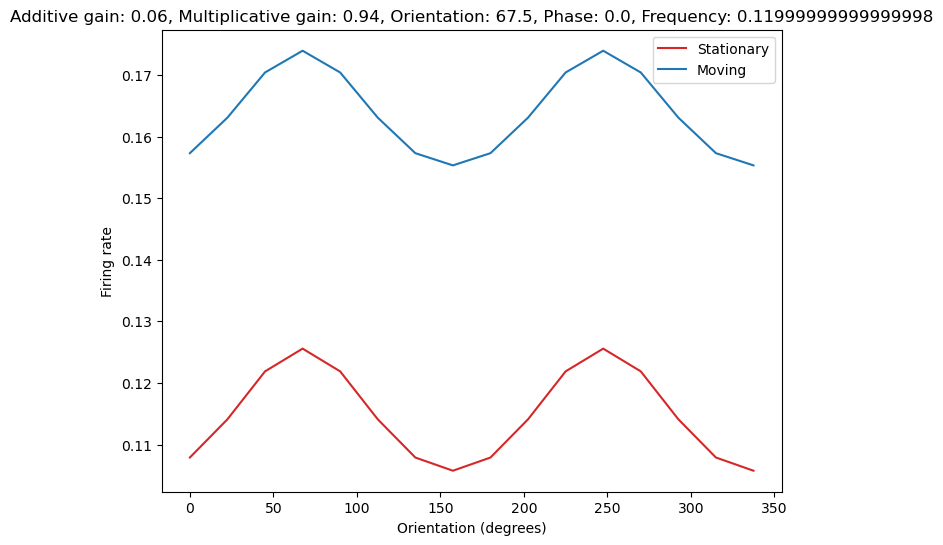

In [454]:
# plot an example tuning curve
contrast_idx = 2
orientation_idx = 3
phase_idx = 0
wavelength_idx = 10
position_idx = 4
grating_orientation_arr = np.linspace(0, 360, 16, endpoint=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.plot(grating_orientation_arr, stationary_tuning_curves[contrast_idx, orientation_idx, phase_idx, wavelength_idx, position_idx], label='Stationary', color='tab:red')
# ax.plot(grating_orientation_arr, moving_tuning_curves[contrast_idx, orientation_idx, phase_idx, wavelength_idx, position_idx], label='Moving', color='tab:blue')
ax.plot(grating_orientation_arr, stationary_tuning_curves[orientation_idx, phase_idx, wavelength_idx, position_idx], label='Stationary', color='tab:red')
ax.plot(grating_orientation_arr, moving_tuning_curves[orientation_idx, phase_idx, wavelength_idx, position_idx], label='Moving', color='tab:blue')
ax.legend()
# ax.set_ylim(0, .3)
# include the additive and mutliplicative gains in the plot title
# ax.set_title('Additive gain: ' + str(np.round(additive_gains[contrast_idx, orientation_idx, phase_idx, wavelength_idx, position_idx], 2)) + ', Multiplicative gain: ' + str(np.round(multiplicative_gains[contrast_idx, orientation_idx, phase_idx, wavelength_idx, position_idx], 2)) + '\nContrast: ' + str(contrast_arr[contrast_idx]) + ', Orientation: ' + str(orientation_arr[orientation_idx]) + ', Phase: ' + str(phase_arr[phase_idx]) + ', Frequency: ' + str(freq_arr[wavelength_idx]))
ax.set_title('Additive gain: ' + str(np.round(additive_gains[orientation_idx, phase_idx, wavelength_idx, position_idx], 2)) + ', Multiplicative gain: ' + str(np.round(multiplicative_gains[orientation_idx, phase_idx, wavelength_idx, position_idx], 2)) + ', Orientation: ' + str(orientation_arr[orientation_idx]) + ', Phase: ' + str(phase_arr[phase_idx]) + ', Frequency: ' + str(freq_arr[wavelength_idx]))
ax.set_xlabel('Orientation (degrees)')
ax.set_ylabel('Firing rate')
# ax.set_title('Orientation: ' + str(orientation_arr[orientation_idx]) + ', Phase: ' + str(phase_arr[phase_idx]) + ', Frequency: ' + str(wavelength_arr[wavelength_idx]))
plt.savefig('../manuscript_figures/orientation_tuning_curve_example_new.pdf', format='pdf', bbox_inches='tight')


In [ ]:
# make a scatter plot of the additive vs. multiplicative gains

contrast_range = [2]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(additive_gains[contrast_range, :, :, :, :].flatten(), multiplicative_gains[contrast_range, :, :, :, :].flatten())
ax.set_xlabel('Additive gain')
ax.set_ylabel('Multiplicative gain')
# ax.set_xlim(0, .8)
# ax.set_ylim(.4, 1)
plt.savefig('../manuscript_figures/additive_vs_multiplicative_gains.pdf', format='pdf', bbox_inches='tight')

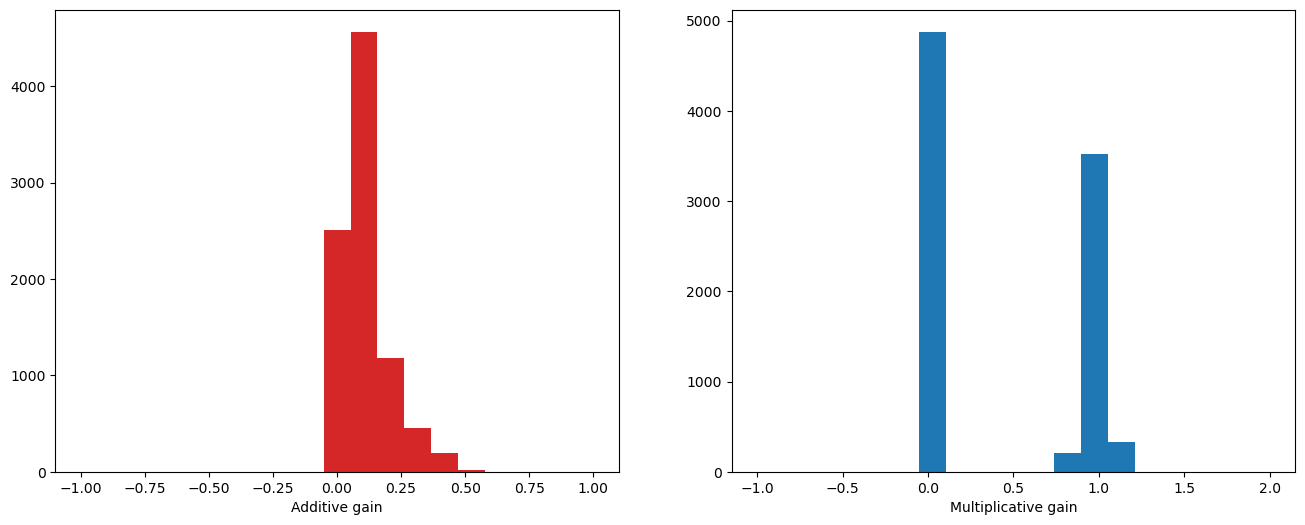

In [425]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# ax[0].hist(additive_gains[contrast_range, :, :, :, :].flatten(), bins=np.linspace(-1, 1, 20), label='Additive gain', color='tab:red')
# ax[1].hist(multiplicative_gains[contrast_range, :, :, :, :].flatten(), bins=np.linspace(.5, 2, 20), label='Multiplicative gain', color='tab:blue')
ax[0].hist(additive_gains[:, :, :, :].flatten(), bins=np.linspace(-1, 1, 20), label='Additive gain', color='tab:red')
ax[1].hist(multiplicative_gains[:, :, :, :].flatten(), bins=np.linspace(-1, 2, 20), label='Multiplicative gain', color='tab:blue')
ax[0].set_xlabel('Additive gain')
ax[1].set_xlabel('Multiplicative gain')
plt.savefig('../manuscript_figures/additive_multiplicative_gains_histogram_new.pdf', format='pdf', bbox_inches='tight')

In [423]:
additive_gains.shape

(8, 4, 31, 9)

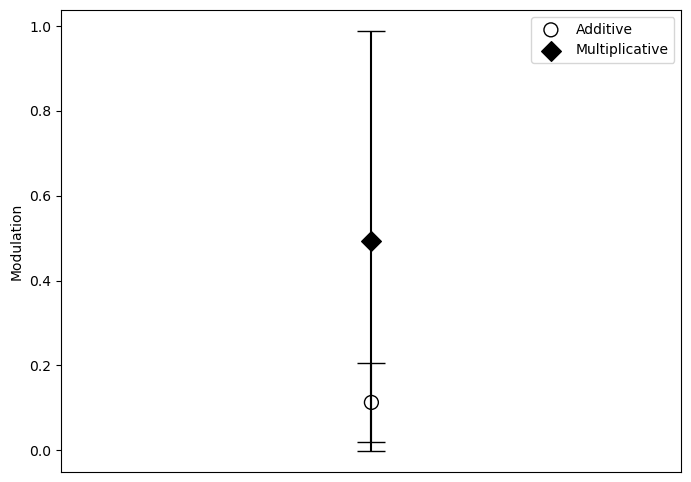

In [424]:
# TODO make scatter of mean and SD of gain terms
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(1, np.mean(additive_gains[:, 0, :, :]), label='Additive', marker='o', facecolors='none', color='k', s=100)
ax.scatter(1, np.mean(multiplicative_gains[:, 0, :, :]), label='Multiplicative', color='k', marker='D', s=100)
ax.errorbar(1, np.mean(additive_gains[:, 0, :, :]), yerr=np.std(additive_gains[:, 0, :, :]), color='k', capsize=10)
ax.errorbar(1, np.mean(multiplicative_gains[:, 0, :, :]), yerr=np.std(multiplicative_gains[:, 0, :, :]), color='k', capsize=10)
ax.legend()
# ax.set_ylim(0, 1.5)
ax.set_xticks([])
ax.set_ylabel('Modulation')
plt.savefig('../manuscript_figures/additive_multiplicative_gains_mean_sd_new.pdf', format='pdf', bbox_inches='tight')

NameError: name 'additive_gains' is not defined

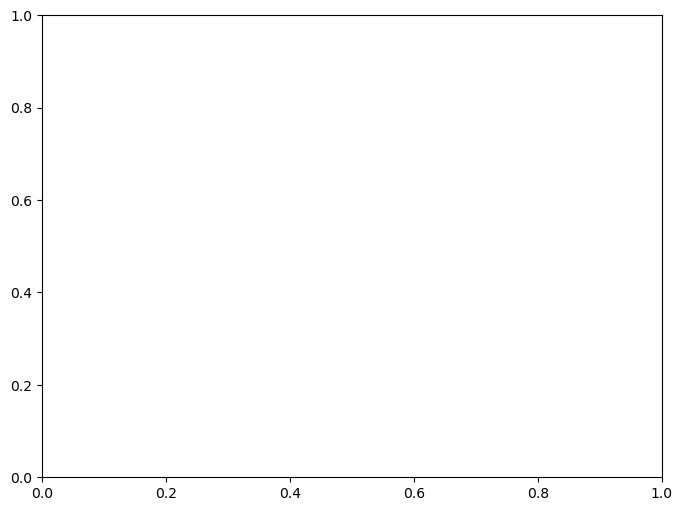

In [99]:
# TODO make scatter of mean and SD of gain terms
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(1, np.mean(additive_gains[contrast_range, :, :, :, :]), label='Additive', marker='o', facecolors='none', color='k', s=100)
ax.scatter(1, np.mean(multiplicative_gains[contrast_range, :, :, :, :]), label='Multiplicative', color='k', marker='d', s=100)
ax.errorbar(1, np.mean(additive_gains[contrast_range, :, :, :, :]), yerr=np.std(additive_gains[contrast_range, :, :, :, :]), color='k', capsize=10)
ax.errorbar(1, np.mean(multiplicative_gains[contrast_range, :, :, :, :]), yerr=np.std(multiplicative_gains[contrast_range, :, :, :, :]), color='k', capsize=10)
ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([])
ax.set_ylabel('Modulation')
plt.savefig('../manuscript_figures/additive_multiplicative_gains_mean_sd.pdf', format='pdf', bbox_inches='tight')

## Drifting gratings

In [ ]:
# define the stimuli
import math
import scipy.signal as signal

def create_grating(sw, ori, phase, wave, filt_size):
    """
    Inputs:
        sw: spatial wavelength (in pixels)
        ori: wave orientation (in degrees, [0-360])
        phase: wave phase (in degrees, [0-360])
        wave: type of wave ('sqr' or 'sin')
        imsize: image size (integer)
    Outputs:
        grating: numpy array of grating sitmulus with shape (imsize, imsize)
    """
    # Get x and y coordinates
    y, x = np.meshgrid(
        np.arange(filt_size[1]) - filt_size[1] // 2,
        np.arange(filt_size[0]) - filt_size[0] // 2,
    )

    # Get the appropriate gradient
    gradient = np.sin(ori * math.pi / 180) * y + np.cos(ori * math.pi / 180) * x

    # Plug gradient into wave function
    if wave == 'sin':
        grating = (np.sin((2 * math.pi * gradient) / sw + (phase * math.pi) / 180)+1)/2
    elif wave == 'sqr':
        grating = signal.square((2 * math.pi * gradient) / sw + (phase * math.pi) / 180)
    else:
        raise NotImplementedError

    # normalize the grating to unit norm
    # grating /= np.linalg.norm(grating)

    return grating

In [ ]:
# generate stimuli as drifting gratings and compute the response with Gabor filters

grating_orientation_arr = np.linspace(0, 360, 16, endpoint=False)
grating_phase_arr = np.linspace(0, 360, 16, endpoint=False)

drifting_gratings = np.zeros((len(grating_orientation_arr), len(grating_phase_arr), len(wavelength_arr), resolution_height, resolution_width))
for i, orientation in tqdm(enumerate(grating_orientation_arr)):
    print("orientation: " + str(orientation))
    for j, phase in enumerate(grating_phase_arr):
        for k, wavelength in enumerate(wavelength_arr):
            drifting_gratings[i, j, k] = create_grating(wavelength, orientation, phase, 'sin', filter_size)

In [ ]:
plt.imshow(drifting_gratings[0, 0, 2, :, :])
plt.colorbar()

In [ ]:
plt.imshow(gabor_filter_bank[0, 0, 2, 4, :, :])

# Contrast Tuning

In [ ]:
freq_arr

In [ ]:
# have 6 different examples
example_ori_idx = [0, 2, 4, 6, 7, 1]
example_phases = [0, 0, 0, 2, 2, 2]
example_wavelengths = [1, 2, 3, 1, 2, 3]

position_idx = 4
lambda_idx = 2
contrast_arr = np.logspace(-1, 3, 100)

from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for idx in range(6):
    orientation_idx = example_ori_idx[idx]
    phase_idx = example_phases[idx]
    wavelength_idx = example_wavelengths[idx]

    sample_filter = gabor_filter_bank[orientation_idx, phase_idx, wavelength_idx, position_idx, :, :]

    sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
    sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

    # generate stimuli as drifting gratings and compute the response with Gabor filters

    filter_inputs = np.zeros((len(contrast_arr), resolution_height, resolution_width))
    for i, contrast in enumerate(contrast_arr):
        filter_inputs[i] = contrast*sample_filter
    
    # compute the responses
    filter_output = np.tensordot(sample_filter, filter_inputs, axes=([-2, -1], [-2, -1]))

    contrast_tuning_stationary = np.zeros(len(contrast_arr))
    contrast_tuning_moving = np.zeros(len(contrast_arr))

    # compute the responses of the filter to the drifting gratings
    for i, contrast in enumerate(contrast_arr):
        contrast_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
        contrast_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)
    
    X = contrast_tuning_stationary.reshape(-1, 1)
    y = contrast_tuning_moving
    reg = LinearRegression().fit(X, y)

    add_gain = reg.intercept_
    multi_gain = reg.coef_[0]

    # ax[i//3, i%3].plot(grating_orientation_arr, reg.predict(X), label='Predicted Moving', color='tab:blue', linestyle='--')
    ax[idx//3, idx%3].plot(contrast_arr, contrast_tuning_stationary, label='Stationary', color='tab:red')
    ax[idx//3, idx%3].plot(contrast_arr, contrast_tuning_moving, label='Moving', color='tab:blue')
    ax[idx//3, idx%3].set_xscale('log')
    # ax[idx//3, idx%3].text(180, 0.5, 'Additive gain: ' + str(np.round(add_gain, 2)))
    # ax[idx//3, idx%3].text(180, 0.45, 'Multiplicative gain: ' + str(np.round(multi_gain, 2)))
    ax[idx//3, idx%3].set_title('Orientation: ' + str(orientation_arr[orientation_idx]) + ', Phase: ' + str(phase_arr[phase_idx]) + ', Frequency: ' + str(freq_arr[wavelength_idx])+ '\nAdditive gain: ' + str(np.round(add_gain, 2)) + ', Multiplicative gain: ' + str(np.round(multi_gain, 2)))

In [ ]:
# compute the contrast tuning curve for all filters
# takes approx 40 minutes to run
contrast_arr = np.logspace(-1, 2, 100)
contrast_tuning_curves_stationary = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr), len(contrast_arr)))
contrast_tuning_curves_moving = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr), len(contrast_arr)))

for orientation_idx, orientation in tqdm(enumerate(orientation_arr)):
    print("orientation: " + str(orientation))
    for phase_idx, phase in tqdm(enumerate(phase_arr)):
        print("phase: " + str(phase))
        for wavelength_idx, wavelength in tqdm(enumerate(wavelength_arr[low_spatial_freq_idx])):
            print("wavelength: " + str(wavelength))
            for position_idx, position in enumerate(position_arr):
                sample_filter = gabor_filter_bank[orientation_idx, phase_idx, wavelength_idx, position_idx, :, :]

                sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
                sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

                # generate stimuli as drifting gratings and compute the response with Gabor filters

                filter_inputs = np.zeros((len(contrast_arr), resolution_height, resolution_width))
                for i, contrast in enumerate(contrast_arr):
                    filter_inputs[i] = contrast*sample_filter
                
                # compute the responses
                filter_output = np.tensordot(sample_filter, filter_inputs, axes=([-2, -1], [-2, -1]))

                contrast_tuning_stationary = np.zeros(len(contrast_arr))
                contrast_tuning_moving = np.zeros(len(contrast_arr))

                # compute the responses of the filter to the drifting gratings
                for i, contrast in enumerate(contrast_arr):
                    contrast_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
                    contrast_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)
                
                # normalize each tuning curve
                norm_factor = np.max([contrast_tuning_stationary, contrast_tuning_moving])
                contrast_tuning_stationary /= norm_factor
                contrast_tuning_moving /= norm_factor
                
                contrast_tuning_curves_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx] = contrast_tuning_stationary
                contrast_tuning_curves_moving[orientation_idx, phase_idx, wavelength_idx, position_idx] = contrast_tuning_moving

In [ ]:
# load the precomputed contrast tuning curves
# Save results
WINDOW_LENGTH = 2
lambda_ = 1.0
contrast_arr = np.logspace(0, 3, 50)
contrast_arr = np.insert(contrast_arr, 0, 0)
contrast_tuning_curves_stationary = np.load(f'contrast_tuning_curves_stationary_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')
contrast_tuning_curves_moving = np.load(f'contrast_tuning_curves_moving_window_length_{WINDOW_LENGTH}_lambda_{lambda_}.npy')


In [ ]:
# plot the average contrast tuning curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(contrast_arr, np.mean(contrast_tuning_curves_stationary, axis=(0, 1, 2, 3)), label='Stationary', color='tab:red')
ax.plot(contrast_arr, np.mean(contrast_tuning_curves_moving, axis=(0, 1, 2, 3)), label='Moving', color='tab:blue')
ax.set_xscale('log')
ax.legend()
ax.set_ylim(0, 1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Contrast')
ax.set_ylabel('Normalized response')
plt.savefig('../manuscript_figures/avg_contrast_tuning_curve.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# plot the average contrast tuning curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_stationary, axis=(0, 1, 2, 3)), label='Stationary', color='tab:red')
ax.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_moving, axis=(0, 1, 2, 3)), label='Moving', color='tab:blue')
ax.set_xscale('log')
ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([0.1, 1, 10, 100], labels=['0.1', '1', '10', '100'])
# plot a break in the x-axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Contrast (%)')
ax.set_ylabel('Normalized response')
plt.savefig('../manuscript_figures/avg_contrast_tuning_curve_percent.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# plot the average contrast tuning curve
fig, (ax2, ax) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 3]})
ax.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_stationary, axis=(0, 1, 2, 3)), label='Stationary', color='tab:red')
ax.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_moving, axis=(0, 1, 2, 3)), label='Moving', color='tab:blue')
ax2.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_stationary, axis=(0, 1, 2, 3)), label='Stationary', color='tab:red')
ax2.plot(contrast_arr/np.max(contrast_arr)*100, np.mean(contrast_tuning_curves_moving, axis=(0, 1, 2, 3)), label='Moving', color='tab:blue')
ax.set_xlim(contrast_arr[1]/np.max(contrast_arr)*100, contrast_arr[-1]/np.max(contrast_arr)*100)
ax2.set_xlim(0, 0.05)
ax.set_xscale('log')
# ax.set_xlim(1e0, 1e3)
ax.set_xticks([0.1, 1, 10, 100], labels=['0.1', '1', '10', '100'])
ax.legend()
# plot a break in the x-axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.set_ylim(0, 1.1)

# hide the spines between ax and ax2
ax.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
# make the y ticks on ax invisible
ax.yaxis.set_visible(False)

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((1-d, 1+d), (-d, +d), **kwargs)  # bottom-left diagonal


fig.supxlabel('Contrast (%)')
ax2.set_ylabel('Normalized response')
plt.savefig('../manuscript_figures/avg_contrast_tuning_curve_split.pdf', format='pdf', bbox_inches='tight')
plt.show()

### single example filter

In [ ]:
position_arr

In [404]:
# compute the contrast tuning curve for a single filter
contrast_arr = 5*np.logspace(0, 2, 12)

orientation_idx = 3
phase_idx = 2
wavelength_idx = 8
position_idx = 4
lambda_idx = 2

sample_filter = gabor_filter = gabor_filter_func(
                    sigma=wavelength_arr[wavelength_idx]/3,
                    theta=orientation_arr[orientation_idx],
                    wavelength=wavelength_arr[wavelength_idx],
                    phase=phase_arr[phase_idx],
                    gamma=1,
                    filt_size=filter_size,
                    x_offset=position_arr[position_idx, 0],
                    y_offset=position_arr[position_idx, 1],
                )

sample_filter_optimal_k_stationary = optimal_k_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_L_stationary = optimal_L_arr_stationary[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_k_moving = optimal_k_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]
sample_filter_optimal_L_moving = optimal_L_arr_moving[orientation_idx, phase_idx, wavelength_idx, position_idx, lambda_idx]

# generate stimuli as drifting gratings and compute the response with Gabor filters

filter_inputs = np.zeros((len(contrast_arr), resolution_height, resolution_width))
for i, contrast in enumerate(contrast_arr):
    filter_inputs[i] = contrast*sample_filter

# add a zero contrast stimulus to the beginning of the array
filter_inputs = np.insert(filter_inputs, 0, np.zeros((resolution_height, resolution_width)), axis=0)

print(filter_inputs.shape)
print(sample_filter.shape)

# compute the responses
filter_output = np.tensordot(sample_filter, filter_inputs, axes=([-2, -1], [-2, -1]))

contrast_tuning_stationary = np.zeros(len(filter_inputs))
contrast_tuning_moving = np.zeros(len(filter_inputs))

# compute the responses of the filter to the drifting gratings
for i in range(len(filter_inputs)):
    contrast_tuning_stationary[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_stationary, L=sample_filter_optimal_L_stationary)
    contrast_tuning_moving[i] = logistic_func(filter_output[i], k=sample_filter_optimal_k_moving, L=sample_filter_optimal_L_moving)

# normalize each tuning curve
norm_factor = np.max([contrast_tuning_stationary, contrast_tuning_moving])
contrast_tuning_stationary /= norm_factor
contrast_tuning_moving /= norm_factor

(13, 1080, 1920)
(1080, 1920)


In [405]:
norm_contrast_arr = contrast_arr/np.max(contrast_arr)*100

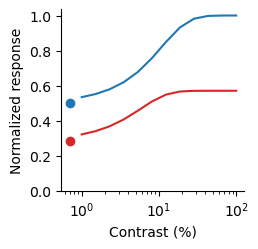

In [406]:
# use broken axis plot
cm = 1/2.54

fig, ax = plt.subplots(figsize=(6*cm, 6*cm))

norm_contrast_arr = contrast_arr/np.max(contrast_arr)*100
ax.plot(norm_contrast_arr, contrast_tuning_stationary[1:], label='Stationary', color='tab:red')
ax.plot(norm_contrast_arr, contrast_tuning_moving[1:], label='Moving', color='tab:blue')
ax.scatter(.7, contrast_tuning_stationary[0], color='tab:red')
ax.scatter(.7, contrast_tuning_moving[0], color='tab:blue')
ax.set_xscale('log')
ax.set_ylim(0)
ax.set_xlabel('Contrast (%)')
ax.set_ylabel('Normalized response')
# plt.xlim(.7, 100)
# remove the spliens from the top and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
orientation_idx = 3
phase_idx = 2
wavelength_idx = 8
position_idx = 4
lambda_idx = 2
plt.savefig(f'../manuscript_figures/fig2_contrast_tuning_curve_example_ori_{orientation_idx}_phase_{phase_idx}_freq_{wavelength_idx}_pos_{position_idx}_lambda_{lambda_idx}.svg', format='svg', bbox_inches='tight')

# Frequency selectivity

In [ ]:
wavelength_arr

In [ ]:
orientation = 0
phase = 0
position = [0, 0]

pixels_per_degree = 20

filter_size = (resolution_height, resolution_width)

different_freq_input = np.zeros((len(wavelength_arr), resolution_height, resolution_width))


for l, wavelength in enumerate(wavelength_arr):
    gabor_filter = gabor_filter_func(
        sigma=np.inf,
        theta=orientation,
        wavelength=wavelength,
        phase=phase,
        gamma=1,
        filt_size=filter_size,
        x_offset=position[0],
        y_offset=position[1],
    )
    different_freq_input[l] = gabor_filter

In [ ]:
plt.imshow(different_freq_input[20], cmap='gray')

In [ ]:
# pick a low spatial freq
low_idx = 8 # 35 # marm_perif_prob.argmax()
example_marm_perif_rf = gabor_filter_func(
        sigma=wavelength_arr[low_idx]/3,
        theta=orientation,
        wavelength=wavelength_arr[low_idx],
        phase=phase,
        gamma=1,
        filt_size=filter_size,
        x_offset=position[0],
        y_offset=position[1],
    )

# compute the reponse of the low spatial frequency filter with different frequency inputs
filter_output = np.tensordot(example_marm_perif_rf, different_freq_input, axes=([-2, -1], [-2, -1]))

In [ ]:
freq_arr[35]

In [ ]:
plt.plot(freq_arr, filter_output)
plt.xscale('log')

# Temporal filtering

## Load and average PSD

In [3]:
# parse the data and compute fourier transform for each filter and video
environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

num_videos = 10
vid_length = 50*30
low_spatial_freq_idx = np.arange(0, 31)
# low_spatial_freq_idx = np.arange(0, 19)
# high_spatial_freq_idx = np.arange(35, 70)
# low_spatial_freq_idx = np.arange(35, 70)

stationary_stim = np.zeros((len(environments), num_videos, len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), vid_length))
moving_stim = np.zeros((len(environments), num_videos, len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), vid_length))

# get the responses for each environment
for i, env_key in enumerate(environments):
    stationary_count = 0
    moving_count = 0
    all_gabor_responses_env = all_gabor_responses[env_key]
    print(all_gabor_responses_env.keys())
    for vid_key in all_gabor_responses_env.keys():
        if 'stationary' in vid_key:
            stationary_stim[i, stationary_count, :, :, :, :, :] = all_gabor_responses_env[vid_key][()][:, :, low_spatial_freq_idx, :, :vid_length]
            stationary_count += 1
        if 'moving' in vid_key and 'free_moving' not in vid_key:
            moving_stim[i, moving_count, :, :, :, :, :] = all_gabor_responses_env[vid_key][()][:, :, low_spatial_freq_idx, :, :vid_length]
            moving_count += 1

<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving

In [42]:
def compute_psd_rfft(x, fs):
    """
    Compute one-sided PSD using rfft for a real-valued signal.

    Parameters:
    - x: 1D real-valued input signal
    - fs: sampling frequency (Hz)

    Returns:
    - freqs: frequency bins (Hz)
    - psd: power spectral density (power/Hz)
    """
    N = len(x)
    X = np.fft.rfft(x, axis=-1)
    X_mag2 = np.abs(X) ** 2

    psd = X_mag2 / (N * fs)

    # Multiply by 2 to account for negative freqs (except DC and Nyquist if N even)
    if N % 2 == 0:
        psd[1:-1] *= 2
    else:
        psd[1:] *= 2

    return psd

In [79]:
# compute the fourier transform for each filter and video using scipy
from scipy.fft import rfftn, rfftfreq

sampling_rate = 30

stationary_stim_psd = np.zeros((len(environments), num_videos, len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), vid_length//2+1))
moving_stim_psd = np.zeros((len(environments), num_videos, len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), vid_length//2+1))
for i, env_key in enumerate(environments):
    for j in range(num_videos):
        stationary_stim_psd[i, j] = compute_psd_rfft(stationary_stim[i, j], sampling_rate)
        moving_stim_psd[i, j] = compute_psd_rfft(moving_stim[i, j], sampling_rate)

In [80]:
# compute the temporal frequencies
sampling_rate = 30
num_samples = vid_length
# frequencies = fftfreq(num_samples, 1/sampling_rate)[1:vid_length//2]
frequencies = rfftfreq(num_samples, 1/sampling_rate)

# pick a cutoff frequency
rf_window = vid_length/sampling_rate # .5 # seconds
cutoff_freq = 1/rf_window

# find the first index wheter the frequency is greater than the cutoff frequency
cutoff_idx = np.where(frequencies >= cutoff_freq)[0][0]

In [81]:
stationary_stim_freq.shape

(5, 10, 8, 4, 31, 9, 751)

In [82]:
# compute the PSD as the square of the absolute value of the fourier transform, also truncate the DC component and the negative frequencies
# set the DC to zero
stationary_stim_freq_no_dc = np.zeros_like(stationary_stim_psd)
stationary_stim_freq_no_dc[:, :, :, :, :, :, cutoff_idx:] = stationary_stim_psd[:, :, :, :, :, :, cutoff_idx:]
moving_stim_freq_no_dc = np.zeros_like(moving_stim_psd)
moving_stim_freq_no_dc[:, :, :, :, :, :, cutoff_idx:] = moving_stim_psd[:, :, :, :, :, :, cutoff_idx:]

stationary_stim_psd_avg = np.mean(stationary_stim_freq_no_dc, axis=(0, 1))
moving_stim_psd_avg = np.mean(moving_stim_freq_no_dc, axis=(0, 1))

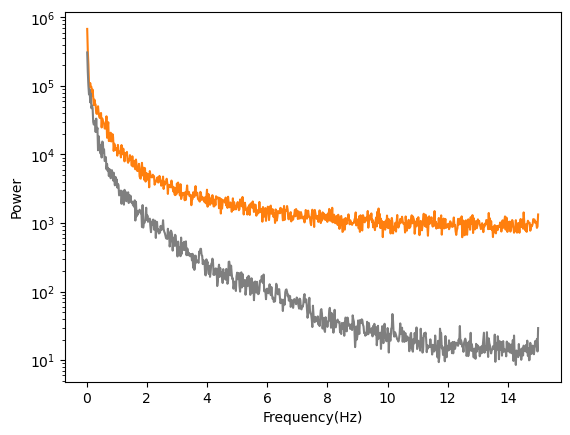

In [83]:
ori_idx = 0
phase_idx = 0
freq_idx = 10
pos_idx = 4

plt.plot(frequencies[cutoff_idx:], moving_stim_psd_avg[ori_idx, phase_idx, freq_idx, pos_idx, cutoff_idx:], label='Moving', color='tab:orange')
plt.plot(frequencies[cutoff_idx:], stationary_stim_psd_avg[ori_idx, phase_idx, freq_idx, pos_idx, cutoff_idx:], label='Stationary', color='tab:gray')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power')
plt.yscale('log')

plt.savefig(f'../manuscript_figures/fig3_psd_example_ori_{ori_idx}_phase_{phase_idx}_freq_{freq_idx}_pos_{pos_idx}.pdf', format='pdf', bbox_inches='tight')

## Apply filter

In [84]:
# definte the temporal filter in the frequency domain with a linear dropoff at a specific frequency determined by a free parameter theta. Define the filter as a function of a set of temporal frequencies
def temporal_filter(temporal_freqs, theta):
    # create the filter
    filter = np.zeros(temporal_freqs.shape)
    # set the filter to 1 for frequencies below theta
    filter[temporal_freqs <= theta] = 1
    # create a linear dropoff for frequencies above theta with a fixed slope
    filter[temporal_freqs > theta] = 1 - (temporal_freqs[temporal_freqs > theta] - theta)
    # ensure that the filter is non-negative
    filter[filter < 0] = 0
    return np.square(filter)

def temporal_filter_gauss(temporal_freqs, theta_u, theta_s):
    # create the filter as a Gaussian in the frequency domain with mean theta_u and standard deviation theta_s
    filter = np.exp(-0.5 * ((temporal_freqs - theta_u) / theta_s)**2)
    # ensure that the filter is non-negative
    filter[filter < 0] = 0
    return np.square(filter)

def temporal_filter_exp(temporal_freq, theta):
    # create the filter as an exponential in the frequency domain with mean theta_u and standard deviation theta_s
    filter = np.exp(-temporal_freq/theta)
    # ensure that the filter is non-negative
    filter[filter < 0] = 0
    return np.square(filter)

(0.0, 1.1)

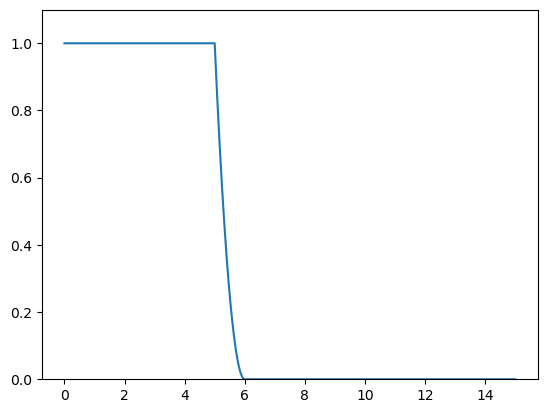

In [85]:
plt.plot(frequencies, temporal_filter(frequencies, 5), label='Theta = 5', color='tab:blue')
plt.ylim(0, 1.1)

In [86]:
# take the inverse fourier transform of the sqrt of the temporal filter
from scipy.fft import irfftn, ifftshift
# temporal_filter_freq = temporal_filter_gauss(frequencies, 0, 5)
temporal_filter_freq = temporal_filter(frequencies, 3)
# temporal_filter_freq = temporal_filter_exp(frequencies, 5)

inverse_temporal_filter = irfftn(np.sqrt(temporal_filter_freq), axes=-1)


(0.0, 100.0)

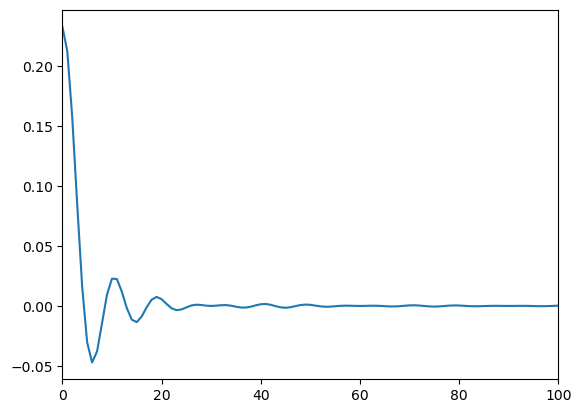

In [87]:
plt.plot(inverse_temporal_filter)
plt.xlim(0, 100)

In [75]:
# simulate white noise
noise_level = 100
noise = np.ones(frequencies.shape) * noise_level

In [27]:
# repeat the process again for a range of theta values
num_theta_values = 100
array_shape = moving_stim_psd_avg.shape
theta_values = np.linspace(2, 15, num_theta_values)
moving_stim_information = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_information = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
moving_stim_energy = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_energy = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
moving_stim_energy_linear = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_energy_linear = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
moving_stim_energy_quadratic = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_energy_quadratic = np.zeros((num_theta_values, array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
for i in tqdm(range(num_theta_values)):
    # compute the filter
    filter = temporal_filter(frequencies, theta_values[i])
    # compute the filtered spectra
    filtered_stationary_stim_psd_avg = np.multiply(stationary_stim_psd_avg, filter)
    filtered_moving_stim_psd_avg = np.multiply(moving_stim_psd_avg, filter)
    # compute the information
    moving_stim_information[i] = np.sum(np.log2(1 + filtered_moving_stim_psd_avg / noise), axis=-1)
    stationary_stim_information[i] = np.sum(np.log2(1 + filtered_stationary_stim_psd_avg / noise), axis=-1)
    # compute the energy
    moving_stim_energy[i] = np.sum(filtered_moving_stim_psd_avg, axis=-1)
    stationary_stim_energy[i] = np.sum(filtered_stationary_stim_psd_avg, axis=-1)
    
    # compute the energy weighted by the square of the frequencies
    moving_stim_energy_quadratic[i] = np.sum(filtered_moving_stim_psd_avg*frequencies**2, axis=-1)
    stationary_stim_energy_quadratic[i] = np.sum(filtered_stationary_stim_psd_avg*frequencies**2, axis=-1)
    
    # compute the energy linearly weighted by frequency
    moving_stim_energy_linear[i] = np.sum(filtered_moving_stim_psd_avg*frequencies, axis=-1)
    stationary_stim_energy_linear[i] = np.sum(filtered_stationary_stim_psd_avg*frequencies, axis=-1)


100%|██████████| 100/100 [00:17<00:00,  5.81it/s]


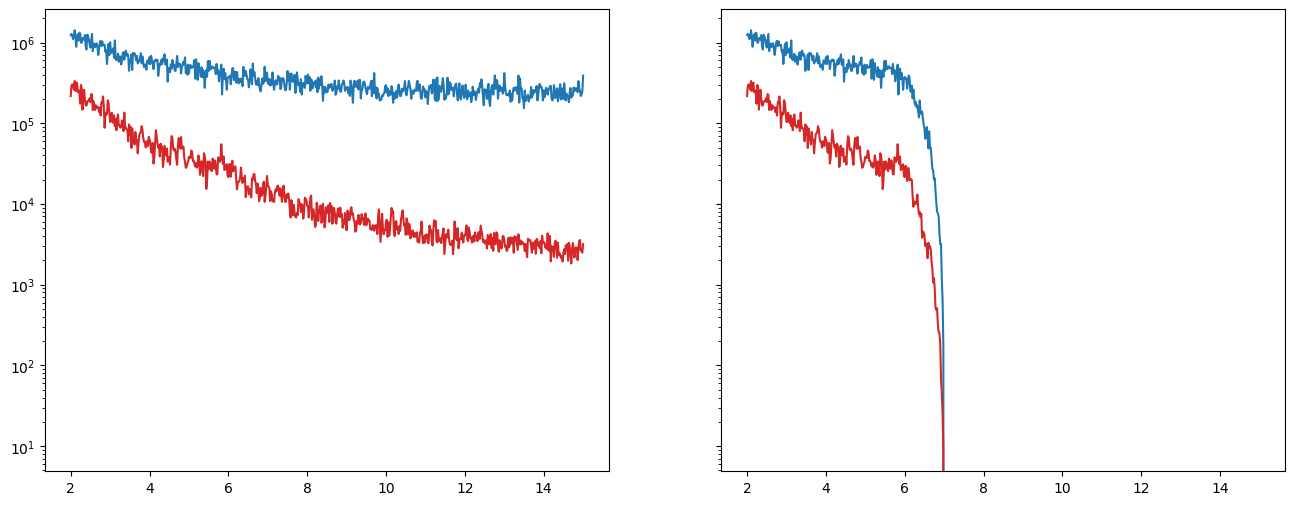

In [28]:
# plot an example of the psd before and after filtering
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

filter = temporal_filter(frequencies, 6)

ori_idx = 0
phase_idx = 0
wavelength_idx = 8
position_idx = 4

ax[0].plot(frequencies, moving_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:blue')
ax[0].plot(frequencies, stationary_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Stationary', color='tab:red')
ax[1].plot(frequencies, np.multiply(moving_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], filter), label='Moving', color='tab:blue')
ax[1].plot(frequencies, np.multiply(stationary_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], filter), label='Stationary', color='tab:red')
ax[1].set_yscale('log')

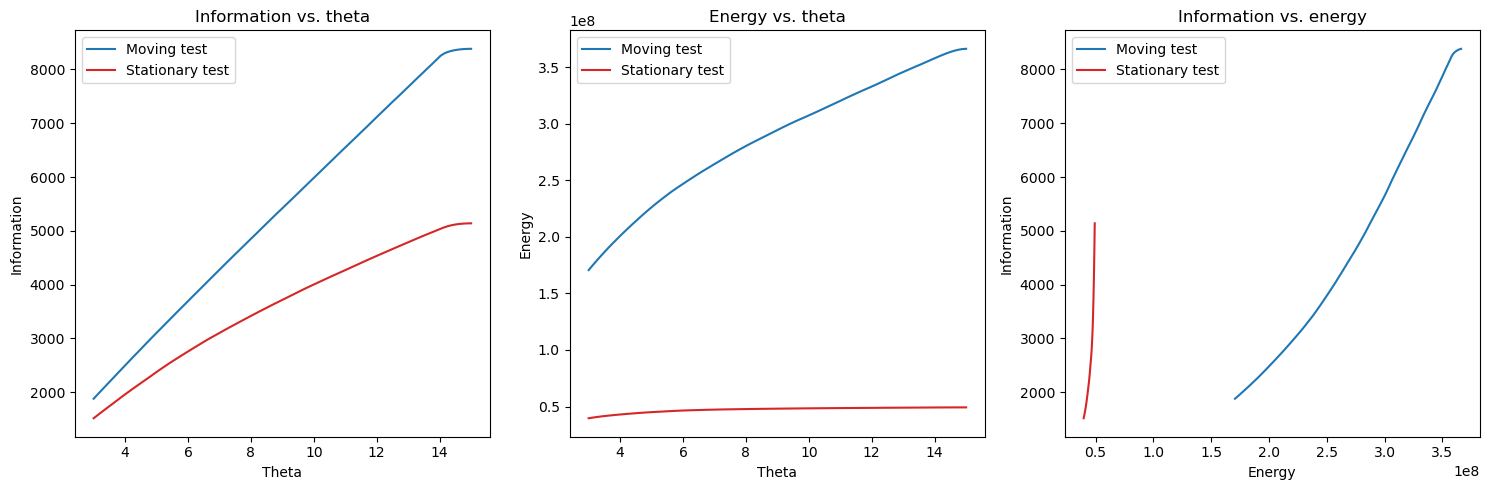

In [321]:
moving_test_informations = moving_stim_information[:, ori_idx, phase_idx, wavelength_idx, position_idx]
stationary_test_informations = stationary_stim_information[:, ori_idx, phase_idx, wavelength_idx, position_idx]
moving_test_energy = moving_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]
stationary_test_energy = stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]

# create a subplot with 1 row and 3 columns. First column plot the information vs. theta, second column plot the energy vs. theta, third column plot the information vs. energy
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(theta_values, moving_test_informations, color='tab:blue', label='Moving test')
axs[0].plot(theta_values, stationary_test_informations, color='tab:red', label='Stationary test')
axs[0].set_xlabel('Theta')
axs[0].set_ylabel('Information')
axs[0].set_title('Information vs. theta')
axs[0].legend()
axs[1].plot(theta_values, moving_test_energy, color='tab:blue', label='Moving test')
axs[1].plot(theta_values, stationary_test_energy, color='tab:red', label='Stationary test')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Energy')
axs[1].set_title('Energy vs. theta')
axs[1].legend()
axs[2].plot(moving_test_energy, moving_test_informations, color='tab:blue', label='Moving test')
axs[2].plot(stationary_test_energy, stationary_test_informations, color='tab:red', label='Stationary test')
axs[2].set_xlabel('Energy')
axs[2].set_ylabel('Information')
axs[2].set_title('Information vs. energy')
axs[2].legend()
plt.tight_layout()
plt.show()

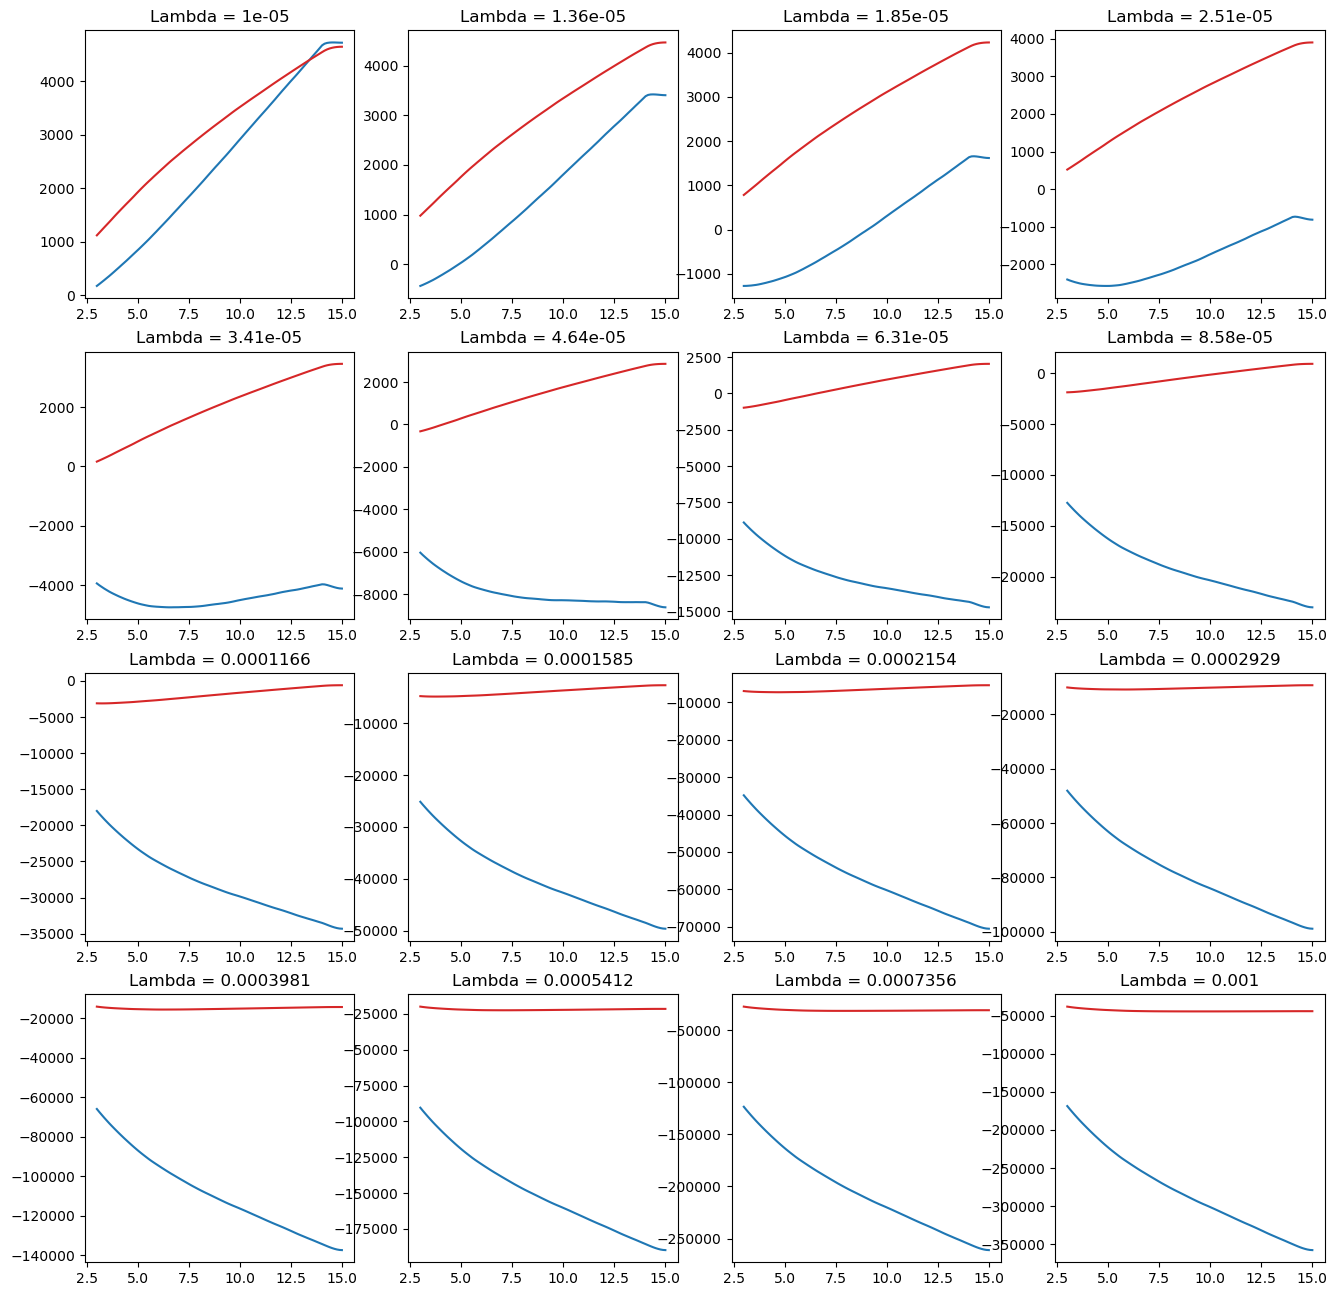

In [334]:
lmbd_arr = np.logspace(-5, -3, 16)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for i, lmbd in enumerate(lmbd_arr):
    moving_utility = moving_test_informations - lmbd*moving_test_energy
    stationary_utility = stationary_test_informations - lmbd*stationary_test_energy
    ax[i//4, i%4].plot(theta_values, moving_utility, color='tab:blue', label='Moving test')
    ax[i//4, i%4].plot(theta_values, stationary_utility, color='tab:red', label='Stationary test')
    ax[i//4, i%4].set_title('Lambda = ' + str(np.round(lmbd, 7)))

In [328]:
# for each filter, for a given energy find the closest value of theta which has that energy
energy_arr = np.logspace(6, 11, 1000)

optimal_theta_val_mov = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
optimal_theta_val_stat = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
optimal_theta_val_mov_linear = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
optimal_theta_val_stat_linear = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
optimal_theta_val_mov_quadratic = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
optimal_theta_val_stat_quadratic = np.zeros((len(energy_arr), len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))

# loop over orientation, phase, wavelength, position
for ori_idx in range(len(orientation_arr)):
    for phase_idx in range(len(phase_arr)):
        for wavelength_idx in range(len(wavelength_arr[low_spatial_freq_idx])):
            for position_idx in range(len(position_arr)):
                test_moving_energy = moving_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                test_stationary_energy = stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                # interpolate the energy values to get a smooth curve
                test_moving_theta_interp = np.interp(energy_arr, test_moving_energy, theta_values)
                test_stationary_theta_interp = np.interp(energy_arr, test_stationary_energy, theta_values)
                optimal_theta_val_mov[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_moving_theta_interp
                optimal_theta_val_stat[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_stationary_theta_interp

                # repeat for the linear energy
                test_moving_energy_linear = moving_stim_energy_linear[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                test_stationary_energy_linear = stationary_stim_energy_linear[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                # interpolate the energy values to get a smooth curve
                test_moving_theta_interp_linear = np.interp(energy_arr, test_moving_energy_linear, theta_values)
                test_stationary_theta_interp_linear = np.interp(energy_arr, test_stationary_energy_linear, theta_values)
                optimal_theta_val_mov_linear[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_moving_theta_interp_linear
                optimal_theta_val_stat_linear[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_stationary_theta_interp_linear
                
                # repeat for the quadratic energy
                test_moving_energy_quadratic = moving_stim_energy_quadratic[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                test_stationary_energy_quadratic = stationary_stim_energy_quadratic[:, ori_idx, phase_idx, wavelength_idx, position_idx]
                # interpolate the energy values to get a smooth curve
                test_moving_theta_interp_quadratic = np.interp(energy_arr, test_moving_energy_quadratic, theta_values)
                test_stationary_theta_interp_quadratic = np.interp(energy_arr, test_stationary_energy_quadratic, theta_values)
                optimal_theta_val_mov_quadratic[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_moving_theta_interp_quadratic
                optimal_theta_val_stat_quadratic[:, ori_idx, phase_idx, wavelength_idx, position_idx] = test_stationary_theta_interp_quadratic

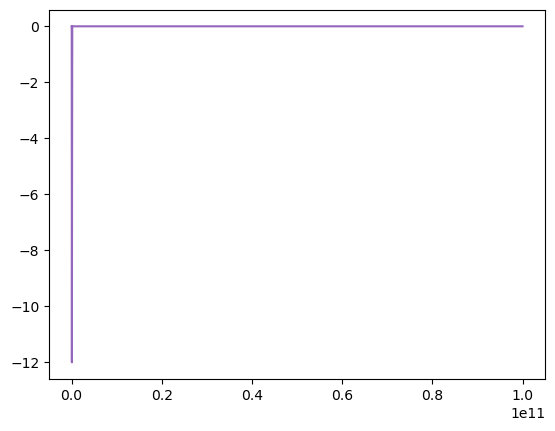

In [329]:
ori_idx = 0
phase_idx = 0
wavelength_idx = -1
position_idx = 4

# plot the difference in theta values vs. energy

plt.plot(energy_arr, optimal_theta_val_mov[:, ori_idx, phase_idx, wavelength_idx, position_idx]-optimal_theta_val_stat[:, ori_idx, phase_idx, wavelength_idx, position_idx], color='tab:purple')

In [330]:
optimal_theta_diff = optimal_theta_val_mov - optimal_theta_val_stat
optimal_theta_diff_avg = np.mean(optimal_theta_diff, axis=(1, 2, 4))
optimal_theta_diff_linear = optimal_theta_val_mov_linear - optimal_theta_val_stat_linear
optimal_theta_diff_linear_avg = np.mean(optimal_theta_diff_linear, axis=(1, 2, 4))
optimal_theta_diff_quadratic = optimal_theta_val_mov_quadratic - optimal_theta_val_stat_quadratic
optimal_theta_diff_quadratic_avg = np.mean(optimal_theta_diff_quadratic, axis=(1, 2, 4))

/tmp/ipykernel_27728/3424404561.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_map = cm.get_cmap('viridis', len(wavelength_arr[low_spatial_freq_idx]))


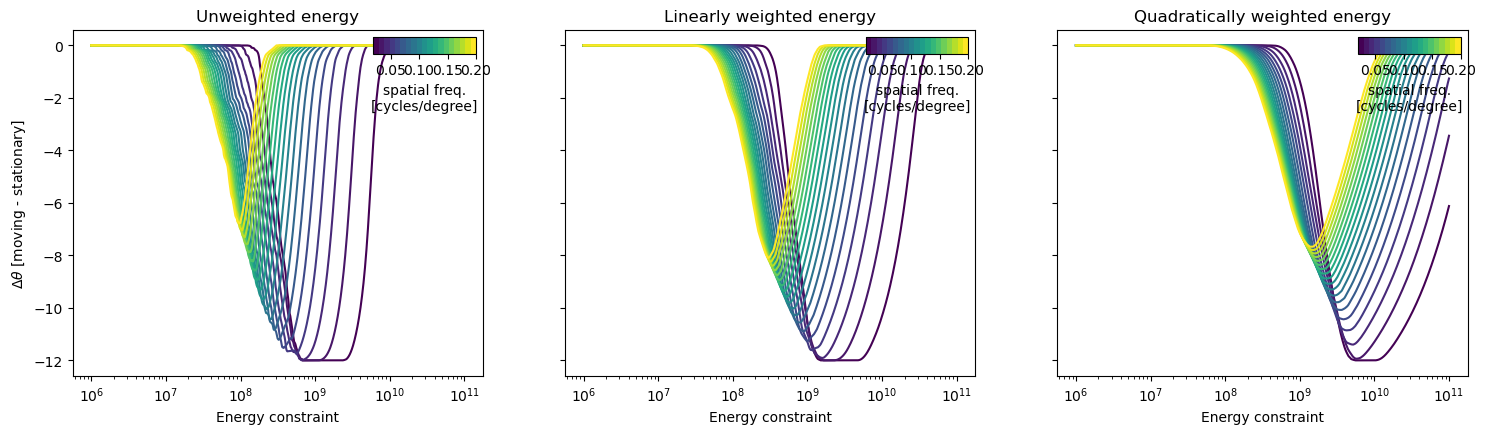

In [331]:
# plot the average difference in optimal theta, color them with viridis

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colors_map = cm.get_cmap('viridis', len(wavelength_arr[low_spatial_freq_idx]))

fig, ax = plt.subplots(1, 3, figsize=(4*3*1.5, 3*1.5), sharey=True)
for i in range(wavelength_arr[low_spatial_freq_idx].shape[0]):
    ax[0].plot(energy_arr, optimal_theta_diff_avg[:, i], color=colors_map(i))
    ax[1].plot(energy_arr, optimal_theta_diff_linear_avg[:, i], color=colors_map(i))
    ax[2].plot(energy_arr, optimal_theta_diff_quadratic_avg[:, i], color=colors_map(i))
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_title('Unweighted energy')
ax[1].set_title('Linearly weighted energy')
ax[2].set_title('Quadratically weighted energy')
ax[0].set_xlabel('Energy constraint')
ax[1].set_xlabel('Energy constraint')
ax[2].set_xlabel('Energy constraint')
ax[0].set_ylabel('$\\Delta\\theta$ [moving - stationary]')
# add something to indicate that the darker the color, the lower the spatial frequency
# add a colorbar
norm = Normalize(vmin=min(freq_arr[low_spatial_freq_idx]), vmax=max(freq_arr[low_spatial_freq_idx]))
sm = plt.cm.ScalarMappable(cmap=colors_map, norm=norm)
sm.set_array([])


axins1 = inset_axes(
    ax[0],
    width="25%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper right",
)
axins1.xaxis.set_ticks_position("bottom")
cbar = fig.colorbar(sm, cax=axins1, orientation="horizontal")
cbar.set_label('spatial freq.\n[cycles/degree]')

axins2 = inset_axes(
    ax[1],
    width="25%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper right",
)
axins2.xaxis.set_ticks_position("bottom")
cbar = fig.colorbar(sm, cax=axins2, orientation="horizontal")
cbar.set_label('spatial freq.\n[cycles/degree]')
axins2 = inset_axes(
    ax[2],
    width="25%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper right",
)
axins2.xaxis.set_ticks_position("bottom")
cbar = fig.colorbar(sm, cax=axins2, orientation="horizontal")
cbar.set_label('spatial freq.\n[cycles/degree]')

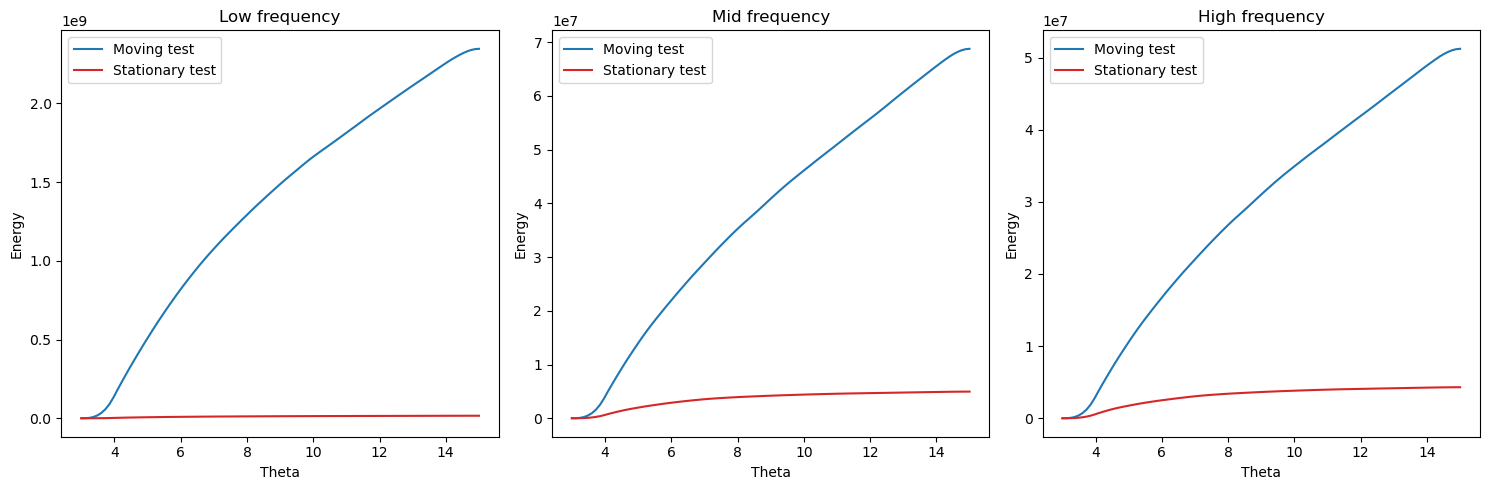

In [205]:
ori_idx = 0
phase_idx = 0
position_idx = 4

wavelength_idices = [0, 15, -1]

moving_test_energy = moving_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]
stationary_test_energy = stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idx, position_idx]

# create a subplot with 1 row and 3 columns. First column plot the information vs. theta, second column plot the energy vs. theta, third column plot the information vs. energy
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
axs[0].plot(theta_values, moving_stim_energy[:, ori_idx, phase_idx, wavelength_idices[0], position_idx], color='tab:blue', label='Moving test')
axs[0].plot(theta_values, stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idices[0], position_idx], color='tab:red', label='Stationary test')
axs[0].set_xlabel('Theta')
axs[0].set_ylabel('Energy')
axs[0].set_title('Low frequency')
axs[0].legend()
axs[1].plot(theta_values, moving_stim_energy[:, ori_idx, phase_idx, wavelength_idices[1], position_idx], color='tab:blue', label='Moving test')
axs[1].plot(theta_values, stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idices[1], position_idx], color='tab:red', label='Stationary test')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Energy')
axs[1].set_title('Mid frequency')
axs[1].legend()
axs[2].plot(theta_values, moving_stim_energy[:, ori_idx, phase_idx, wavelength_idices[2], position_idx], color='tab:blue', label='Moving test')
axs[2].plot(theta_values, stationary_stim_energy[:, ori_idx, phase_idx, wavelength_idices[2], position_idx], color='tab:red', label='Stationary test')
axs[2].set_xlabel('Theta')
axs[2].set_ylabel('Energy')
axs[2].set_title('High frequency')
axs[2].legend()
plt.tight_layout()
plt.show()

In [206]:
# pick a contraint and then see how a stimulus filtered by the optimal filter looks
constraint_energy = 1e9
constraint_idx = np.argmin(np.abs(energy_arr-constraint_energy))

optimal_theta_mov = optimal_theta_val_mov[constraint_idx, :, :, :, :]
optimal_theta_stat = optimal_theta_val_stat[constraint_idx, :, :, :, :]

ori_idx = 0
phase_idx = 0
wavelength_idx = 3
position_idx = 4

theta_mov = optimal_theta_mov[ori_idx, phase_idx, wavelength_idx, position_idx]
theta_stat = optimal_theta_stat[ori_idx, phase_idx, wavelength_idx, position_idx]

# compute the filter
filter_mov = temporal_filter(frequencies, theta_mov)
filter_stat = temporal_filter(frequencies, theta_stat)
# compute the filtered spectra
filtered_moving_stim_psd = np.multiply(noise, filter_mov)
filtered_stationary_stim_psd = np.multiply(noise, filter_stat)
# compute the energy
test_moving_stim_energy = np.sum(filtered_moving_stim_psd, axis=-1)
test_stationary_stim_energy = np.sum(filtered_stationary_stim_psd, axis=-1)

# compute the energy weighted by the square of the frequencies
test_moving_stim_energy_quadratic = np.sum(filtered_moving_stim_psd*frequencies**2, axis=-1)
test_stationary_stim_energy_quadratic = np.sum(filtered_stationary_stim_psd*frequencies**2, axis=-1)

# compute the energy linearly weighted by frequency
test_moving_stim_energy_linear = np.sum(filtered_moving_stim_psd*frequencies, axis=-1)
test_stationary_stim_energy_linear = np.sum(filtered_stationary_stim_psd*frequencies, axis=-1)


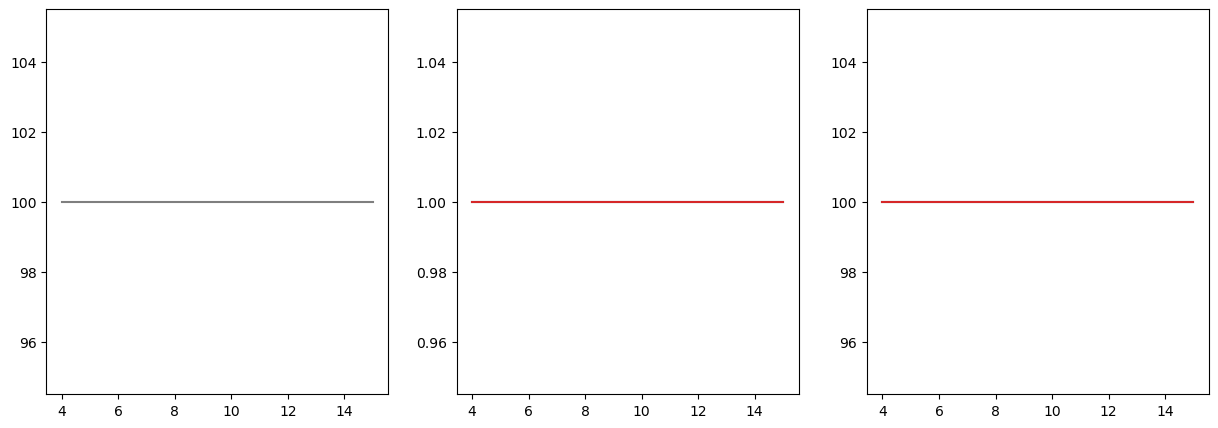

In [207]:
# create a figure which shows the spectra before filtering, the filter, and the spectra after filtering
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(frequencies, noise, label='Noise', color='tab:gray')
ax[1].plot(frequencies, filter_mov, label='Moving', color='tab:blue')
ax[1].plot(frequencies, filter_stat, label='Stationary', color='tab:red')
ax[2].plot(frequencies, filtered_moving_stim_psd, label='Moving', color='tab:blue')
ax[2].plot(frequencies, filtered_stationary_stim_psd, label='Stationary', color='tab:red')

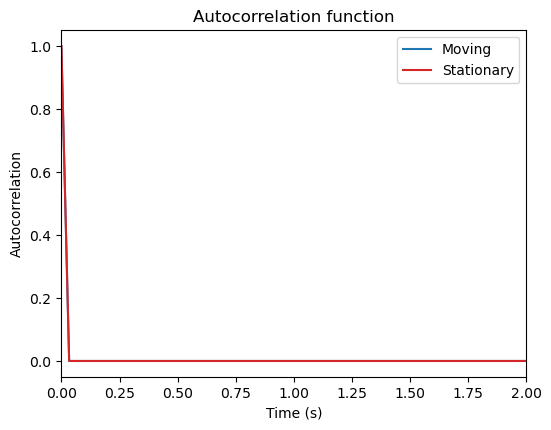

In [208]:
# compute the autocorrelation function by taking the inverse fourier transform of the PSD
from scipy.fft import irfft
# compute the autocorrelation function
moving_autocorr = irfft(filtered_moving_stim_psd)[:len(filtered_moving_stim_psd)//2]
stationary_autocorr = irfft(filtered_stationary_stim_psd)[:len(filtered_stationary_stim_psd)//2]

# normalize the autocorrelation function
moving_autocorr /= np.max(moving_autocorr)
stationary_autocorr /= np.max(stationary_autocorr)

time = np.arange(0, len(moving_autocorr)) / 30

# plot the autocorrelation function
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.plot(time, moving_autocorr, label='Moving', color='tab:blue')
ax.plot(time, stationary_autocorr, label='Stationary', color='tab:red')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation function')
ax.legend()
ax.set_xlim(0,2)
plt.show()

## Heatmap energy landscape and theta

### Average over filters

In [88]:
frequencies[100:]

array([ 2.  ,  2.02,  2.04,  2.06,  2.08,  2.1 ,  2.12,  2.14,  2.16,
        2.18,  2.2 ,  2.22,  2.24,  2.26,  2.28,  2.3 ,  2.32,  2.34,
        2.36,  2.38,  2.4 ,  2.42,  2.44,  2.46,  2.48,  2.5 ,  2.52,
        2.54,  2.56,  2.58,  2.6 ,  2.62,  2.64,  2.66,  2.68,  2.7 ,
        2.72,  2.74,  2.76,  2.78,  2.8 ,  2.82,  2.84,  2.86,  2.88,
        2.9 ,  2.92,  2.94,  2.96,  2.98,  3.  ,  3.02,  3.04,  3.06,
        3.08,  3.1 ,  3.12,  3.14,  3.16,  3.18,  3.2 ,  3.22,  3.24,
        3.26,  3.28,  3.3 ,  3.32,  3.34,  3.36,  3.38,  3.4 ,  3.42,
        3.44,  3.46,  3.48,  3.5 ,  3.52,  3.54,  3.56,  3.58,  3.6 ,
        3.62,  3.64,  3.66,  3.68,  3.7 ,  3.72,  3.74,  3.76,  3.78,
        3.8 ,  3.82,  3.84,  3.86,  3.88,  3.9 ,  3.92,  3.94,  3.96,
        3.98,  4.  ,  4.02,  4.04,  4.06,  4.08,  4.1 ,  4.12,  4.14,
        4.16,  4.18,  4.2 ,  4.22,  4.24,  4.26,  4.28,  4.3 ,  4.32,
        4.34,  4.36,  4.38,  4.4 ,  4.42,  4.44,  4.46,  4.48,  4.5 ,
        4.52,  4.54,

In [89]:
moving_stim_psd.shape

(5, 10, 8, 4, 31, 9, 751)

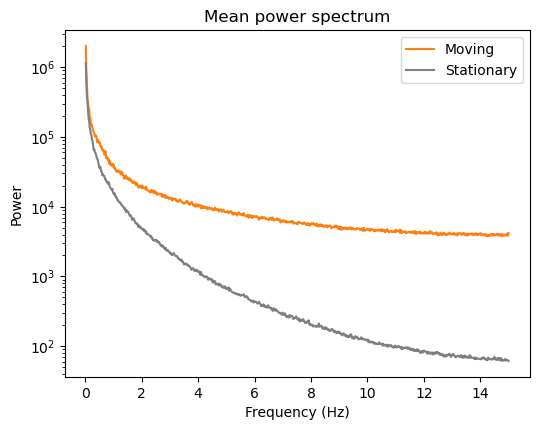

In [104]:
# compute the average spectrum over all filters
mean_moving_psd_temp = np.mean(moving_stim_psd, axis=(0, 1, 2, 3, 4, 5))
mean_stationary_psd_temp = np.mean(stationary_stim_psd, axis=(0, 1, 2, 3, 4, 5))

# plot the mean spectrum
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.plot(frequencies[1:], mean_moving_psd_temp[1:], label='Moving', color='tab:orange')
ax.plot(frequencies[1:], mean_stationary_psd_temp[1:], label='Stationary', color='tab:gray')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.set_title('Mean power spectrum')
ax.set_yscale('log')
ax.legend()

plt.savefig(f'../manuscript_figures/fig3_psd_mean_full.pdf', format='pdf', bbox_inches='tight')

In [108]:
mean_moving_psd.shape

(751,)

In [122]:
# normalize the spectrum such that the are under the curve is 1
mean_stationary_psd = np.zeros_like(mean_stationary_psd_temp)
mean_stationary_psd[100:] = mean_stationary_psd_temp[100:]
mean_moving_psd = np.zeros_like(mean_moving_psd_temp)
mean_moving_psd[100:] = mean_moving_psd_temp[100:]
freq_spacing = np.diff(frequencies)[0]
norm_factor = np.sum(mean_stationary_psd*freq_spacing)
mean_stationary_psd /= norm_factor
mean_moving_psd /= norm_factor

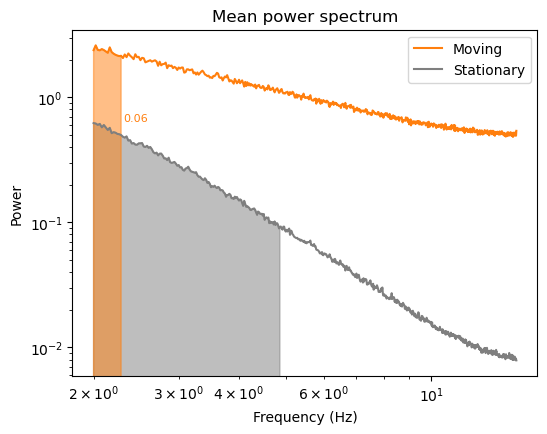

In [128]:
# compute the average spectrum over all filters
# plot the mean spectrum
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.plot(frequencies[100:], mean_moving_psd[100:], label='Moving', color='tab:orange')
ax.plot(frequencies[100:], mean_stationary_psd[100:], label='Stationary', color='tab:gray')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.set_title('Mean power spectrum')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

# find where the area under the stationary psd is a certain value
aoc_val = .75
aoc_idx_stat = np.where(np.cumsum(mean_stationary_psd*freq_spacing) <= aoc_val)[0][-1]
# find the frequency at that index
freq_val_stat = frequencies[aoc_idx_stat]
aoc_idx_mov = np.where(np.cumsum(mean_moving_psd*freq_spacing) <= aoc_val)[0][-1]
# find the frequency at that index
freq_val_mov = frequencies[aoc_idx_mov]

moving_percent_aoc = np.cumsum(mean_moving_psd*freq_spacing)/np.sum(mean_moving_psd*freq_spacing)
moving_aoc = moving_percent_aoc[aoc_idx_mov]
# print this value on the plot
ax.text(freq_val_mov, 10*moving_aoc, f'{moving_aoc:.2f}', color='tab:orange', fontsize=8)

# plot filled area under the curve
ax.fill_between(frequencies[100:], mean_stationary_psd[100:], where=(frequencies[100:] < freq_val_stat), color='tab:gray', alpha=0.5)
ax.fill_between(frequencies[100:], mean_moving_psd[100:], where=(frequencies[100:] < freq_val_mov), color='tab:orange', alpha=0.5)


plt.savefig(f'../manuscript_figures/fig3_psd_mean_normalize_2Hz_crop_aoc_{aoc_val}.pdf', format='pdf', bbox_inches='tight')

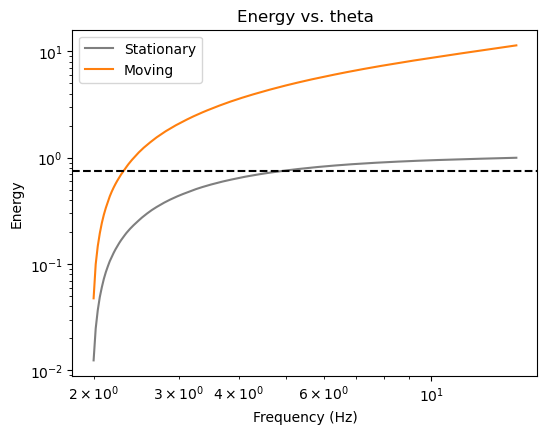

In [131]:
# plot the energy vs. theta
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.plot(frequencies[100:], np.cumsum(mean_stationary_psd*freq_spacing)[100:], label='Stationary', color='tab:gray')
ax.plot(frequencies[100:], np.cumsum(mean_moving_psd*freq_spacing)[100:], label='Moving', color='tab:orange')
ax.axhline(y=aoc_val, color='k', linestyle='--')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Energy')
ax.set_title('Energy vs. theta')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.savefig(f'../manuscript_figures/fig3_energy_vs_freq_aoc_{aoc_val}.pdf', format='pdf', bbox_inches='tight')

In [132]:
# repeat the process again for a range of theta values
num_theta_values = 1000
theta_values = np.linspace(1, 15, num_theta_values)
moving_stim_energy = np.zeros(num_theta_values)
stationary_stim_energy = np.zeros(num_theta_values)
for i in tqdm(range(num_theta_values)):
    # compute the filter
    filter = temporal_filter(frequencies, theta_values[i])
    filter[:100] = 0
    # compute the filtered spectra
    filtered_mean_stationary_psd = np.multiply(mean_stationary_psd, filter)
    filtered_mean_moving_psd = np.multiply(mean_moving_psd, filter)
    # compute the energy
    moving_stim_energy[i] = np.sum(filtered_mean_moving_psd*freq_spacing, axis=-1)
    stationary_stim_energy[i] = np.sum(filtered_mean_stationary_psd*freq_spacing, axis=-1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 13869.92it/s]


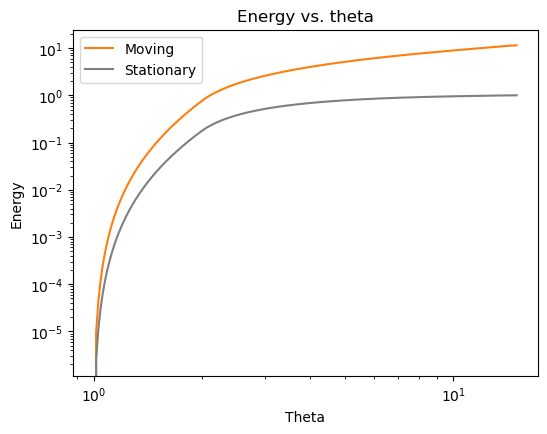

In [141]:
# plot the energy vs. theta
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.plot(theta_values[:], moving_stim_energy[:], label='Moving', color='tab:orange')
ax.plot(theta_values[:], stationary_stim_energy[:], label='Stationary', color='tab:gray')
ax.set_xlabel('Theta')
ax.set_ylabel('Energy')
ax.set_title('Energy vs. theta')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

In [142]:
relative = True

# for given energy capacities in the stationary case (between 0 and 1)
energy_capacity_stat = np.linspace(0, 1, 101)
# energy_capacity_mov = np.linspace(0, 2, 101)
delta_energy_capacity = np.linspace(0.01, 10, 1000)
# energy_capacity_stat = np.logspace(-1, 0, 100)
# delta_energy_capacity = np.logspace(-1, 1, 101)

# interpolate the energy values to get a smooth curve
stationary_theta_interp = np.interp(energy_capacity_stat, stationary_stim_energy, theta_values)

if relative:
    energy_capacity_mov = np.outer(delta_energy_capacity, energy_capacity_stat) + energy_capacity_stat[np.newaxis, :] # relative
    delta_energy_capacity *= 100 # convert to percent
else:
    energy_capacity_mov = delta_energy_capacity[:, np.newaxis] + energy_capacity_stat[np.newaxis, :] # absolute

moving_theta_interp = np.interp(energy_capacity_mov, moving_stim_energy, theta_values)


/tmp/ipykernel_7649/69919728.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_map = cm.get_cmap('Blues', len(example_points)+2)


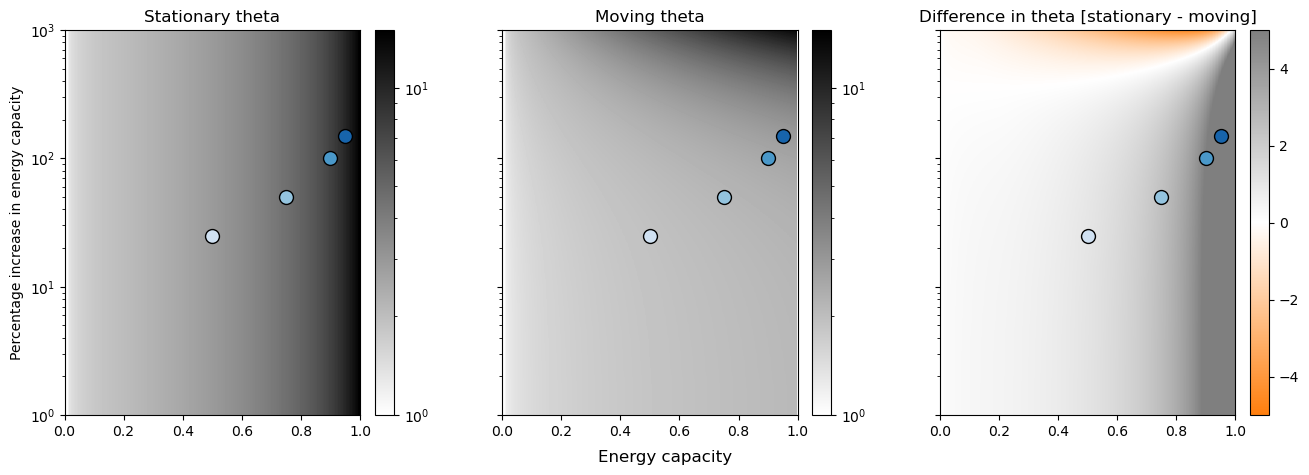

In [143]:
import matplotlib.colors as mcolors
from matplotlib import cm

norm = mcolors.LogNorm(vmin=np.min(theta_values), vmax=np.max(theta_values))
two_color_norm = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# example_points = [(50, 50), (75, 75), (95, 100)]
example_points = [(50, 24), (75, 49), (90, 99), (95, 149)]

fig, ax = plt.subplots(1, 3, figsize=(16, 5), width_ratios=[5, 5, 5], sharey=True)
im0 = ax[0].imshow(np.repeat(stationary_theta_interp[np.newaxis, :], len(delta_energy_capacity), axis=0), origin='lower', norm=norm, cmap='gray_r', extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
ax[0].set_title('Stationary theta')
im1 = ax[1].imshow(moving_theta_interp, origin='lower', norm=norm, cmap='gray_r', extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
ax[1].set_title('Moving theta')
colors_map = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(1, 127/255, 14/255), (1, 1, 1), (0.5, 0.5, 0.5)], N=256)
im2 = ax[2].imshow(stationary_theta_interp[np.newaxis, :]-moving_theta_interp, origin='lower', norm=two_color_norm, cmap=colors_map, extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
ax[2].set_title('Difference in theta [stationary - moving]')
# ax[2].set_xlim(0.5, 1)
# ax[2].set_ylim(0.5, 1)
# add axis labels
if relative:
    ax[0].set_ylabel('Percentage increase in energy capacity')
else:
    ax[0].set_ylabel('Increase in energy capacity')

fig.supxlabel('Energy capacity')

# plot the example points in three different colors which are distinct from red, white and blue
colors_map = cm.get_cmap('Blues', len(example_points)+2)
# plot the example points in the first subplot
for i, point in enumerate(example_points):
    ax[0].scatter(energy_capacity_stat[point[0]], delta_energy_capacity[point[1]], color=colors_map(i+1), s=100, edgecolor='black', label='Example point ' + str(i+1))
    ax[1].scatter(energy_capacity_stat[point[0]], delta_energy_capacity[point[1]], color=colors_map(i+1), s=100, edgecolor='black')
    ax[2].scatter(energy_capacity_stat[point[0]], delta_energy_capacity[point[1]], color=colors_map(i+1), s=100, edgecolor='black')

ax[0].set_yscale('log')

# add a colorbar without disrupting the layout of the other subplots
cbar = fig.colorbar(im2, ax=ax[2], orientation='vertical', pad=0.04)
cbar = fig.colorbar(im1, ax=ax[1], orientation='vertical', pad=0.04)
cbar = fig.colorbar(im0, ax=ax[0], orientation='vertical', pad=0.04)
# plt.savefig(f'../manuscript_figures/fig3_diff_theta_stat_energy_vs_delta_energy.pdf', format='pdf', bbox_inches='tight')

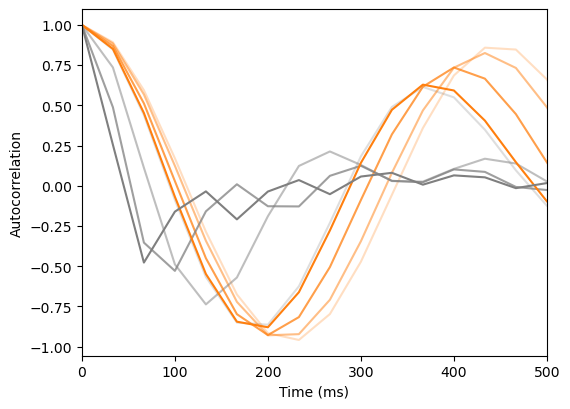

In [147]:
from scipy.fft import irfft

# compute the autocorrelation function for the example points by extracting the theta values in the stationary and moving conditions and then applying the filter to white noise and then computing the autocorrelation function as the inverse fourier transform of the PSD
alpha_arr = [0.25, 0.5, 0.75, 1]
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
for i in range(len(example_points)):
    # compute the filter
    example_theta_mov = moving_theta_interp[example_points[i][1], example_points[i][0]]
    example_theta_stat = stationary_theta_interp[example_points[i][0]]
    # compute the filter
    example_filter_mov = temporal_filter(frequencies, example_theta_mov)
    example_filter_stat = temporal_filter(frequencies, example_theta_stat)
    example_filter_mov[:100] = 0
    example_filter_stat[:100] = 0
    # compute the inverse fourier transform of the filter
    example_moving_autocorr = irfft(example_filter_mov)
    example_stationary_autocorr = irfft(example_filter_stat)
    # normalize the autocorrelation function
    example_moving_autocorr /= np.max(example_moving_autocorr)
    example_stationary_autocorr /= np.max(example_stationary_autocorr)
    # plot the autocorrelation function
    time = np.arange(0, len(example_moving_autocorr)) / 30*1000
    ax.plot(time, example_moving_autocorr, label='Moving', color='tab:orange', alpha=alpha_arr[i])
    ax.plot(time, example_stationary_autocorr, label='Stationary', color='tab:gray', alpha=alpha_arr[i])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Autocorrelation')
    # ax.legend()
    ax.set_xlim(0, 500)
# plt.savefig(f'../manuscript_figures/fig3_autocorr_example_{i}.pdf', format='pdf', bbox_inches='tight')

### Individual filters

In [32]:
# normalize the spectrum such that the are under the curve is 1
norm_factor = np.sum(stationary_stim_psd_avg[:, :, :, :, 99:], axis=-1, keepdims=True)
stationary_stim_psd_avg_norm = stationary_stim_psd_avg[:, :, :, :, 99:] / norm_factor
moving_stim_psd_avg_norm = moving_stim_psd_avg[:, :, :, :, 99:] / norm_factor

mat_shape = stationary_stim_psd_avg_norm.shape

# repeat the process again for a range of theta values
num_theta_values = 1000
theta_values = np.linspace(1, 15, num_theta_values)
moving_stim_energy = np.zeros((mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], num_theta_values))
stationary_stim_energy = np.zeros((mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], num_theta_values))
for i in tqdm(range(num_theta_values)):
    # compute the filter
    filter = temporal_filter(frequencies[99:], theta_values[i])
    # compute the filtered spectra
    filtered_mean_stationary_psd = np.multiply(stationary_stim_psd_avg_norm, filter)
    filtered_mean_moving_psd = np.multiply(moving_stim_psd_avg_norm, filter)
    # compute the energy
    moving_stim_energy[:, :, :, :, i] = np.sum(filtered_mean_moving_psd, axis=-1)
    stationary_stim_energy[:, :, :, :, i] = np.sum(filtered_mean_stationary_psd, axis=-1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.46it/s]


In [33]:
# for given energy capacities in the stationary case (between 0 and 1)
relative = True

num_energy_levels = 100
energy_capacity_stat = np.linspace(0, 1, num_energy_levels+1)
delta_energy_capacity = np.linspace(0.01, 10, 10*num_energy_levels)
if relative:
    energy_capacity_mov = np.outer(delta_energy_capacity, energy_capacity_stat) + energy_capacity_stat[np.newaxis, :] # relative
    delta_energy_capacity *= 100 # convert to percent
else:
    energy_capacity_mov = delta_energy_capacity[:, np.newaxis] + energy_capacity_stat[np.newaxis, :]
# energy_capacity_stat = np.logspace(-1, 0, 100)
# delta_energy_capacity = np.logspace(-1, 0, 100)

stationary_theta_interp = np.zeros((num_energy_levels+1, mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))
moving_theta_interp = np.zeros((10*num_energy_levels, num_energy_levels+1, mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))

# interpolate the energy values to get a smooth curve
for i in range(mat_shape[0]):
    for j in range(mat_shape[1]):
        for k in range(mat_shape[2]):
            for l in range(mat_shape[3]):
                # interpolate the energy values to get a smooth curve
                stationary_theta_interp[:, i, j, k, l] = np.interp(energy_capacity_stat, stationary_stim_energy[i, j, k, l], theta_values)
                for m in range(num_energy_levels):
                    # interpolate the energy values to get a smooth curve
                    moving_theta_interp[:, m, i, j, k, l] = np.interp(energy_capacity_mov[:, m], moving_stim_energy[i, j, k, l], theta_values)

In [34]:
# for each filter, find the cutoff value of the autocorrelation function for different points in the energy landscape
# create a matrix to store the cutoff values for each filter
cutoff_frequency_mov = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))
cutoff_frequency_stat = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))
autocorr_func_mov = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], len(frequencies[99:])//2))
autocorr_func_stat = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], len(frequencies[99:])//2))
cutoff = 0.5
for m in range(len(example_points)):
    for i in range(mat_shape[0]):
        for j in range(mat_shape[1]):
            for k in range(mat_shape[2]):
                for l in range(mat_shape[3]):
                    # compute the filter
                    example_theta_mov = moving_theta_interp[example_points[m][1], example_points[m][0], i, j, k, l]
                    example_theta_stat = stationary_theta_interp[example_points[m][0], i, j, k, l]
                    # compute the filter
                    example_filter_mov = temporal_filter(frequencies[99:], example_theta_mov)
                    example_filter_stat = temporal_filter(frequencies[99:], example_theta_stat)
                    # compute the filtered spectra
                    example_filtered_mean_stationary_psd = example_filter_stat # np.multiply(stationary_stim_psd_avg_norm[i, j, k, l], example_filter_stat)
                    example_filtered_mean_moving_psd = example_filter_mov # np.multiply(moving_stim_psd_avg_norm[i, j, k, l], example_filter_mov)
                    # compute the inverse fourier transform
                    example_moving_autocorr = irfft(example_filtered_mean_moving_psd)[:len(example_filtered_mean_moving_psd)//2]
                    example_stationary_autocorr = irfft(example_filtered_mean_stationary_psd)[:len(example_filtered_mean_stationary_psd)//2]
                    # normalize the autocorrelation function
                    example_moving_autocorr /= np.max(example_moving_autocorr)
                    example_stationary_autocorr /= np.max(example_stationary_autocorr)
                    # store the autocorrelation function
                    autocorr_func_mov[m, i, j, k, l, :] = example_moving_autocorr
                    autocorr_func_stat[m, i, j, k, l, :] = example_stationary_autocorr
                    # find the cutoff frequency
                    cutoff_frequency_mov[m, i, j, k, l] = np.where(example_moving_autocorr < cutoff)[0][0]
                    cutoff_frequency_stat[m, i, j, k, l] = np.where(example_stationary_autocorr < cutoff)[0][0]


In [115]:
# plot and save all autocorrelation functions
# make a directory called example_autocorrelation_sim in ../manuscript_figures/
import os
if not os.path.exists('../manuscript_figures/example_autocorrelation_sim_-1_1_white_noise'):
    os.makedirs('../manuscript_figures/example_autocorrelation_sim_-1_1_white_noise')


point_idx = 0
position_idx = 4
time = np.arange(0, len(example_moving_autocorr)) / 30*1000
for ori_idx in range(mat_shape[0]):
    for phase_idx in range(mat_shape[1]):
        for wavelength_idx in range(mat_shape[2]):
            fig, ax = plt.subplots(1, 1, figsize=(4, 3))
            ax.plot(time, autocorr_func_mov[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:orange')
            ax.plot(time, autocorr_func_stat[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Stationary', color='tab:gray')
            ax.set_xlim(0, 500)
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Autocorrelation')
            ax.set_title(f'Point {point_idx}, Ori {ori_idx}, Phase {phase_idx}, Wavelength {wavelength_idx}, Position {position_idx}')
            ax.legend()
            ax.set_ylim(-1, 1)
            plt.savefig(f'../manuscript_figures/example_autocorrelation_sim_-1_1_white_noise/fig3_autocorr_point_{point_idx}_ori_{ori_idx}_phase_{phase_idx}_wavelength_{wavelength_idx}_position_{position_idx}.pdf', format='pdf', bbox_inches='tight')
            # close the figure
            plt.close(fig)

In [ ]:
# plot the average autocorrelation function for each point
avg_autocorr_func_mov = np.mean(autocorr_func_mov, axis=(1, 2, 3, 4))
avg_autocorr_func_stat = np.mean(autocorr_func_stat, axis=(1, 2, 3, 4))
std_autocorr_func_mov = np.std(autocorr_func_mov, axis=(1, 2, 3, 4))
std_autocorr_func_stat = np.std(autocorr_func_stat, axis=(1, 2, 3, 4))
time = np.arange(0, len(example_moving_autocorr)) / 30*1000
# plot the average autocorrelation function for each point
for point_idx in range(len(example_points)):
    fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
    ax.plot(time, avg_autocorr_func_mov[point_idx, :], label='Moving', color='tab:orange')
    ax.plot(time, avg_autocorr_func_stat[point_idx, :], label='Stationary', color='tab:gray')
    ax.fill_between(time, avg_autocorr_func_mov[point_idx, :] - std_autocorr_func_mov[point_idx, :], avg_autocorr_func_mov[point_idx, :] + std_autocorr_func_mov[point_idx, :], color='tab:orange', alpha=0.2)
    ax.fill_between(time, avg_autocorr_func_stat[point_idx, :] - std_autocorr_func_stat[point_idx, :], avg_autocorr_func_stat[point_idx, :] + std_autocorr_func_stat[point_idx, :], color='tab:gray', alpha=0.2)
    ax.set_xlim(0, 500)
    ax.set_ylim(-1, 1)
    plt.savefig(f'../manuscript_figures/fig3_avg_autocorr_point_{point_idx}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

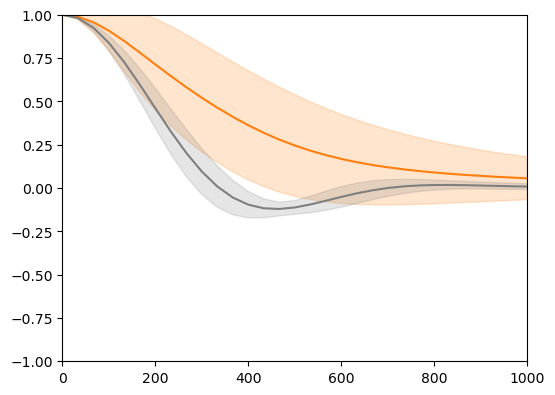

<Figure size 640x480 with 0 Axes>

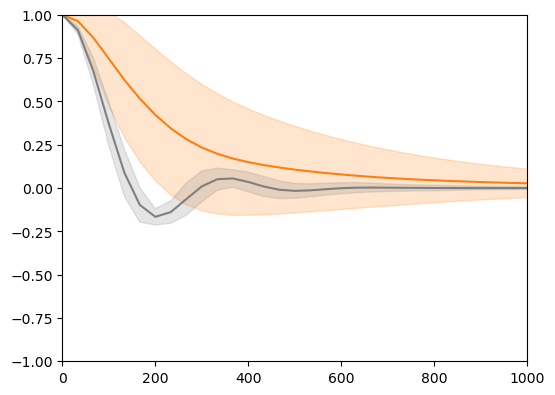

<Figure size 640x480 with 0 Axes>

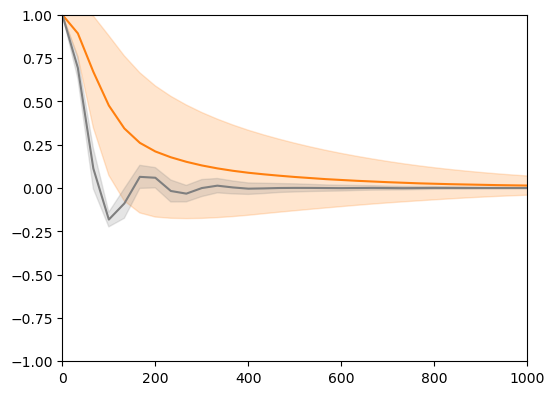

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the average autocorrelation function for each point
avg_autocorr_func_mov = np.mean(autocorr_func_mov, axis=(1, 2, 3, 4))
avg_autocorr_func_stat = np.mean(autocorr_func_stat, axis=(1, 2, 3, 4))
std_autocorr_func_mov = np.std(autocorr_func_mov, axis=(1, 2, 3, 4))
std_autocorr_func_stat = np.std(autocorr_func_stat, axis=(1, 2, 3, 4))
time = np.arange(0, len(example_moving_autocorr)) / 30*1000
# plot the average autocorrelation function for each point
for point_idx in range(len(example_points)):
    fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
    ax.plot(time, avg_autocorr_func_mov[point_idx, :], label='Moving', color='tab:orange')
    ax.plot(time, avg_autocorr_func_stat[point_idx, :], label='Stationary', color='tab:gray')
    ax.fill_between(time, avg_autocorr_func_mov[point_idx, :] - std_autocorr_func_mov[point_idx, :], avg_autocorr_func_mov[point_idx, :] + std_autocorr_func_mov[point_idx, :], color='tab:orange', alpha=0.2)
    ax.fill_between(time, avg_autocorr_func_stat[point_idx, :] - std_autocorr_func_stat[point_idx, :], avg_autocorr_func_stat[point_idx, :] + std_autocorr_func_stat[point_idx, :], color='tab:gray', alpha=0.2)
    ax.set_xlim(0, 500)
    ax.set_ylim(-1, 1)
    plt.savefig(f'../manuscript_figures/fig3_avg_autocorr_point_{point_idx}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

In [186]:
cutoff_frequency_stat /= 30
cutoff_frequency_mov /= 30

In [187]:
cutoff_frequency_stat *= 1000
cutoff_frequency_mov *= 1000

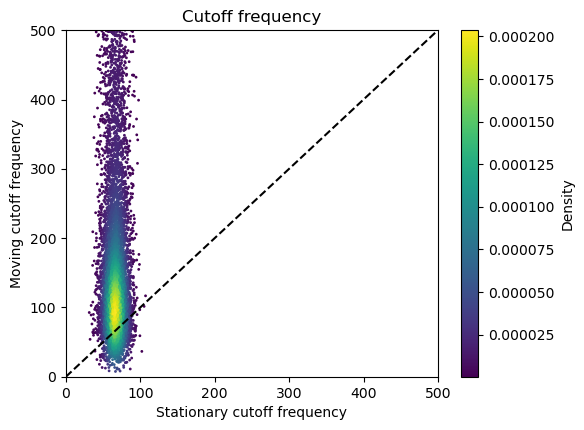

In [193]:
# plot the cutoff frequencies as a density scatter plot with jitter
point = 2
jitter_strength = 10

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(cutoff_frequency_stat[point]), np.max(cutoff_frequency_mov[point]))

fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.set_title('Cutoff frequency')
ax.set_xlabel('Stationary cutoff frequency')
ax.set_ylabel('Moving cutoff frequency')
# add jitter to the points
cutoff_stat_jitter = cutoff_frequency_stat[point, :, :, :, :].flatten() + np.random.normal(0, jitter_strength, cutoff_frequency_stat[point, :, :, :, :].flatten().shape)
cutoff_mov_jitter = cutoff_frequency_mov[point, :, :, :, :].flatten() + np.random.normal(0, jitter_strength, cutoff_frequency_mov[point, :, :, :, :].flatten().shape)

# use gaussian kde to plot the density of points
from scipy.stats import gaussian_kde

kde = gaussian_kde([cutoff_stat_jitter, cutoff_mov_jitter])

# plot scatter plot colored by density
density = kde([cutoff_stat_jitter, cutoff_mov_jitter])
ax.scatter(cutoff_stat_jitter, cutoff_mov_jitter, c=density, cmap='viridis', s=1)
# add a colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Density')
# add a line with slope 1 which goes from 0 to the max value axes
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
plt.savefig(f'../manuscript_figures/fig3_cutoff_frequency_point_{point}.pdf', format='pdf', bbox_inches='tight')


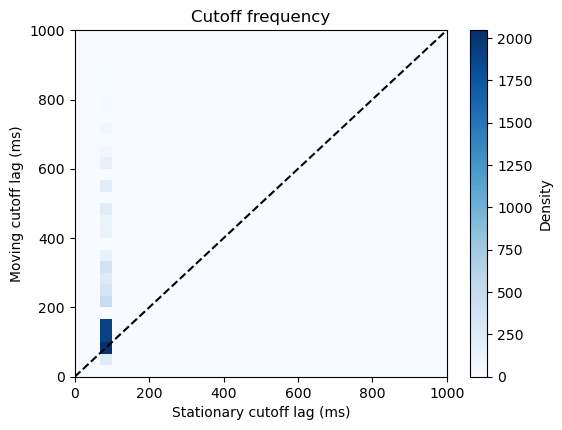

In [196]:
# plot the cutoff frequencies as a density scatter plot with jitter
point = 2

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(cutoff_frequency_stat[point]), np.max(cutoff_frequency_mov[point]))
frame_length = 1/30*1000
bins = np.arange(min_val, max_val+frame_length, frame_length)

fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.set_title('Cutoff frequency')
ax.set_xlabel('Stationary cutoff lag (ms)')
ax.set_ylabel('Moving cutoff lag (ms)')

ax.hist2d(cutoff_frequency_stat[point, :, :, :, :].flatten(), cutoff_frequency_mov[point, :, :, :, :].flatten(), bins=[bins, bins], cmap='Blues')
# add a colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Density')
# add a line with slope 1 which goes from 0 to the max value axes
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')

plt.savefig(f'../manuscript_figures/fig3_cutoff_frequency_density_hist_point_{point}.pdf', format='pdf', bbox_inches='tight')


In [158]:
# print the fraction above the diagonal
above_diagonal = np.sum(cutoff_frequency_mov[point] > cutoff_frequency_stat[point]) / (cutoff_frequency_mov[point].flatten().shape[0])
print(f'Fraction of points above the diagonal: {above_diagonal:.2f}')

Fraction of points above the diagonal: 0.82


In [ ]:
import matplotlib.colors as mcolors

norm = mcolors.LogNorm(vmin=np.min(theta_values), vmax=np.max(theta_values))
two_color_norm = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

random_draws = 10

for i in range(random_draws):
    ori_idx = np.random.randint(0, mat_shape[0])
    phase_idx = np.random.randint(0, mat_shape[1])
    wavelength_idx = np.random.randint(0, mat_shape[2])
    position_idx = np.random.randint(0, mat_shape[3])

    stationary_theta_test = stationary_theta_interp[:, ori_idx, phase_idx, wavelength_idx, position_idx]
    moving_theta_test = moving_theta_interp[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]

    fig, ax = plt.subplots(2, 3, figsize=(16, 10))
    im0 = ax[0, 0].imshow(np.repeat(stationary_theta_test[np.newaxis, :], 100, axis=0), origin='lower', norm=norm, cmap='viridis', extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
    ax[0, 0].set_title('Stationary theta')
    im1 = ax[0, 1].imshow(moving_theta_test, origin='lower', norm=norm, cmap='viridis', extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
    ax[0, 1].set_title('Moving theta')
    im2 = ax[0, 2].imshow(stationary_theta_test[np.newaxis, :]-moving_theta_test, origin='lower', norm=two_color_norm, cmap='bwr', extent=[energy_capacity_stat[0], energy_capacity_stat[-1], delta_energy_capacity[0], delta_energy_capacity[-1]], aspect='auto')
    ax[0, 2].set_title('Difference in theta [stationary - moving]')
    # add axis labels
    ax[0, 0].set_ylabel('Percentage increase in energy capacity')
    ax[0, 1].set_xlabel('Energy capacity')
    fig.suptitle(f'Orientation: {orientation_arr[ori_idx]}, Phase: {phase_arr[phase_idx]}, Frequency: {freq_arr[low_spatial_freq_idx][wavelength_idx]}, Position: {position_arr[position_idx]}')

    # add a colorbar without disrupting the layout of the other subplots
    cbar = fig.colorbar(im2, ax=ax[0, 2], orientation='vertical', fraction=0.02, pad=0.04)
    cbar = fig.colorbar(im1, ax=ax[0, 1], orientation='vertical', fraction=0.02, pad=0.04)
    cbar = fig.colorbar(im0, ax=ax[0, 0], orientation='vertical', fraction=0.02, pad=0.04)

    # plot the spectra and the energy vs. theta
    ax[1, 0].plot(frequencies, stationary_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Stationary', color='tab:red')
    ax[1, 0].plot(frequencies, moving_stim_psd_avg[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:blue')
    ax[1, 0].set_xlabel('Frequency (Hz)')
    ax[1, 0].set_ylabel('Power')
    ax[1, 0].set_title('Power spectrum')
    ax[1, 0].set_yscale('log')
    ax[1, 1].plot(theta_values, stationary_stim_energy[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Stationary', color='tab:red')
    ax[1, 1].plot(theta_values, moving_stim_energy[ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:blue')
    ax[1, 1].set_xlabel('Theta')
    ax[1, 1].set_ylabel('Energy')
    ax[1, 1].set_title('Energy vs. theta')
    # make last plot empty
    ax[1, 2].axis('off')

    plt.show()

### Block trial stimuli

In [1]:
import numpy as np
# create white noise block structure, have 1 second of white noise with low variance and then 1 second of white noise with high variance
# the sampling rate is 10 ms.
num_samples = 100  # number of samples in the white noise block
low_noise = 0.1
high_noise = 1
sampling_rate = 100

# repeat this 100 times with new sampling so that in the end I have an array of shape (100, 300)
num_blocks = 100
white_noise_blocks = np.array([np.concatenate([
    np.random.normal(0, low_noise, 20),  # low variance
    np.random.normal(0, high_noise, num_samples),     # high variance
    np.random.normal(0, low_noise, 80),  # low variance
]) for _ in range(num_blocks)])

# take the fft of the white noise blocks
white_noise_blocks_fft = np.fft.rfft(white_noise_blocks, axis=-1)
white_noise_frequencies = np.fft.rfftfreq(white_noise_blocks.shape[1], d=1/sampling_rate)

In [2]:
avg_white_noise_psd = np.mean(np.abs(white_noise_blocks_fft)**2, axis=0)[4:]

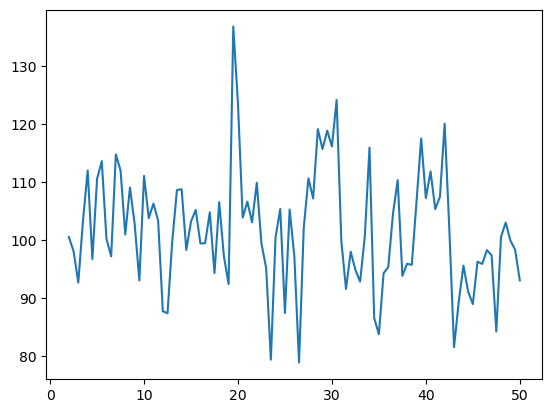

In [5]:
import matplotlib.pyplot as plt
plt.plot(white_noise_frequencies[4:], avg_white_noise_psd)

In [118]:
# for each filter, find the cutoff value of the autocorrelation function for different points in the energy landscape
# create a matrix to store the cutoff values for each filter
cutoff_frequency_mov = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))
cutoff_frequency_stat = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3]))
autocorr_func_mov = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], len(white_noise_frequencies[4:])//2))
autocorr_func_stat = np.zeros((len(example_points), mat_shape[0], mat_shape[1], mat_shape[2], mat_shape[3], len(white_noise_frequencies[4:])//2))
cutoff = 0.5
for m in range(len(example_points)):
    for i in range(mat_shape[0]):
        for j in range(mat_shape[1]):
            for k in range(mat_shape[2]):
                for l in range(mat_shape[3]):
                    # compute the filter
                    example_theta_mov = moving_theta_interp[example_points[m][1], example_points[m][0], i, j, k, l]
                    example_theta_stat = stationary_theta_interp[example_points[m][0], i, j, k, l]
                    # compute the filter
                    example_filter_mov = temporal_filter(white_noise_frequencies[4:], example_theta_mov)
                    example_filter_stat = temporal_filter(white_noise_frequencies[4:], example_theta_stat)
                    # compute the filtered spectra
                    example_filtered_mean_stationary_psd = np.multiply(avg_white_noise_psd, example_filter_stat)
                    example_filtered_mean_moving_psd = np.multiply(avg_white_noise_psd, example_filter_mov)
                    # compute the inverse fourier transform
                    example_moving_autocorr = irfft(example_filtered_mean_moving_psd)[:len(example_filtered_mean_moving_psd)//2]
                    example_stationary_autocorr = irfft(example_filtered_mean_stationary_psd)[:len(example_filtered_mean_stationary_psd)//2]
                    # normalize the autocorrelation function
                    example_moving_autocorr /= np.max(example_moving_autocorr)
                    example_stationary_autocorr /= np.max(example_stationary_autocorr)
                    # store the autocorrelation function
                    autocorr_func_mov[m, i, j, k, l, :] = example_moving_autocorr
                    autocorr_func_stat[m, i, j, k, l, :] = example_stationary_autocorr
                    # # find the cutoff frequency
                    try:
                        cutoff_frequency_mov[m, i, j, k, l] = np.where(example_moving_autocorr < cutoff)[0][0]
                        cutoff_frequency_stat[m, i, j, k, l] = np.where(example_stationary_autocorr < cutoff)[0][0]
                    except IndexError:
                        # if the cutoff is not found, set it to nan
                        cutoff_frequency_mov[m, i, j, k, l] = np.nan
                        cutoff_frequency_stat[m, i, j, k, l] = np.nan


In [100]:
# save the autocorrelation and cutoff frequency matrices
np.savez('../data/fig3_autocorr_cutoff_frequency_white_noise.npz', 
         autocorr_func_mov=autocorr_func_mov, 
         autocorr_func_stat=autocorr_func_stat, 
         cutoff_frequency_mov=cutoff_frequency_mov, 
         cutoff_frequency_stat=cutoff_frequency_stat,
         white_noise_frequencies=white_noise_frequencies[4:],
         example_points=example_points,
         frequencies=frequencies[99:],
         theta_values=theta_values,
         stationary_theta_interp=stationary_theta_interp,
         moving_theta_interp=moving_theta_interp)

In [127]:
time

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470])

In [128]:
autocorr_func_mov.shape

(3, 8, 4, 31, 9, 48)

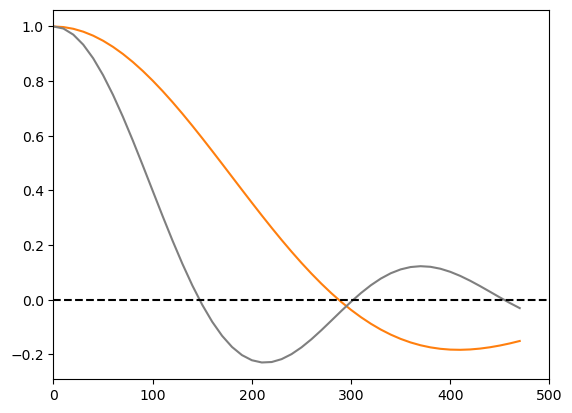

In [129]:
point_idx = 1
position_idx = 5
ori = 0
phase = 0
wavelength = 3
time = np.arange(0, len(white_noise_frequencies[4:])//2*10, 10)
plt.plot(time, autocorr_func_mov[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:orange')
plt.plot(time, autocorr_func_stat[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:gray')
plt.xlim(0, 500)
plt.axhline(0, color='black', linestyle='--')

In [156]:
# plot and save all autocorrelation functions
# make a directory called example_autocorrelation_sim in ../manuscript_figures/
import os
if not os.path.exists('../manuscript_figures/example_autocorrelation_sim_-1_1_block_stim'):
    os.makedirs('../manuscript_figures/example_autocorrelation_sim_-1_1_block_stim')


point_idx = 1
position_idx = 4
for ori_idx in range(mat_shape[0]):
    for phase_idx in range(mat_shape[1]):
        for wavelength_idx in range(mat_shape[2]):
            fig, ax = plt.subplots(1, 1, figsize=(4, 3))
            ax.plot(time, autocorr_func_mov[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Moving', color='tab:orange')
            ax.plot(time, autocorr_func_stat[point_idx, ori_idx, phase_idx, wavelength_idx, position_idx, :], label='Stationary', color='tab:gray')
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Autocorrelation')
            ax.set_title(f'Point {point_idx}, Ori {ori_idx}, Phase {phase_idx}, Wavelength {wavelength_idx}, Position {position_idx}')
            ax.legend()
            ax.set_ylim(-1, 1)
            ax.set_xlim(0, 500)
            plt.savefig(f'../manuscript_figures/example_autocorrelation_sim_-1_1_block_stim/fig3_autocorr_point_{point_idx}_ori_{ori_idx}_phase_{phase_idx}_wavelength_{wavelength_idx}_position_{position_idx}_block_stim.pdf', format='pdf', bbox_inches='tight')
            # close the figure
            plt.close(fig)

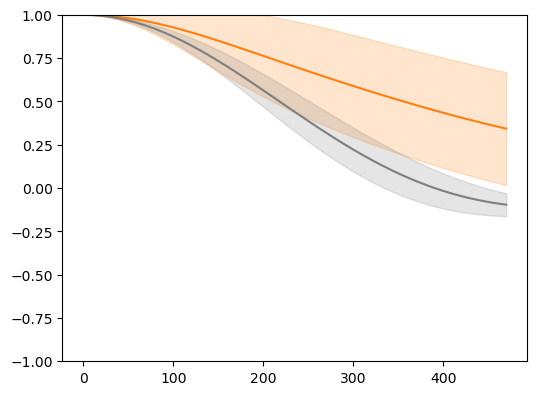

<Figure size 640x480 with 0 Axes>

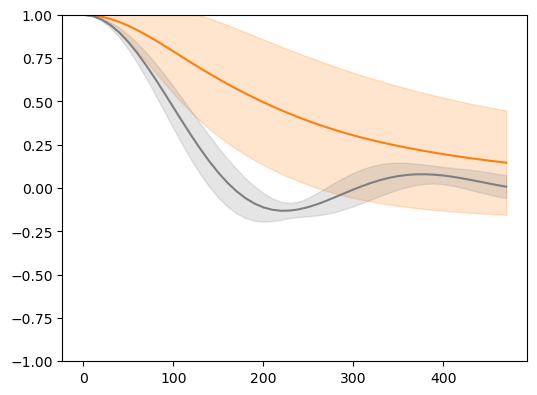

<Figure size 640x480 with 0 Axes>

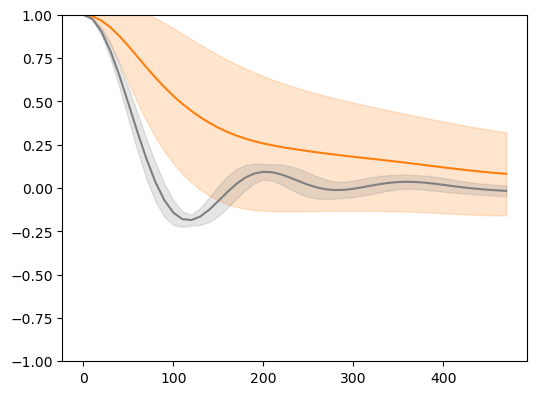

<Figure size 640x480 with 0 Axes>

In [110]:
# plot the average autocorrelation function for each point
avg_autocorr_func_mov = np.mean(autocorr_func_mov, axis=(1, 2, 3, 4))
avg_autocorr_func_stat = np.mean(autocorr_func_stat, axis=(1, 2, 3, 4))
std_autocorr_func_mov = np.std(autocorr_func_mov, axis=(1, 2, 3, 4))
std_autocorr_func_stat = np.std(autocorr_func_stat, axis=(1, 2, 3, 4))
time = np.arange(0, len(avg_autocorr_func_mov[1])*10, 10)
# plot the average autocorrelation function for each point
for point_idx in range(len(example_points)):
    fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
    ax.plot(time, avg_autocorr_func_mov[point_idx, :], label='Moving', color='tab:orange')
    ax.plot(time, avg_autocorr_func_stat[point_idx, :], label='Stationary', color='tab:gray')
    ax.fill_between(time, avg_autocorr_func_mov[point_idx, :] - std_autocorr_func_mov[point_idx, :], avg_autocorr_func_mov[point_idx, :] + std_autocorr_func_mov[point_idx, :], color='tab:orange', alpha=0.2)
    ax.fill_between(time, avg_autocorr_func_stat[point_idx, :] - std_autocorr_func_stat[point_idx, :], avg_autocorr_func_stat[point_idx, :] + std_autocorr_func_stat[point_idx, :], color='tab:gray', alpha=0.2)
    # ax.set_xlim(0, 1000)
    ax.set_ylim(-1, 1)
    plt.show()
    plt.savefig(f'../manuscript_figures/fig3_avg_autocorr_point_{point_idx}_block_stimuli.pdf', format='pdf', bbox_inches='tight')
    plt.close(fig)

Percent of NaN values in cutoffs: 10.30%


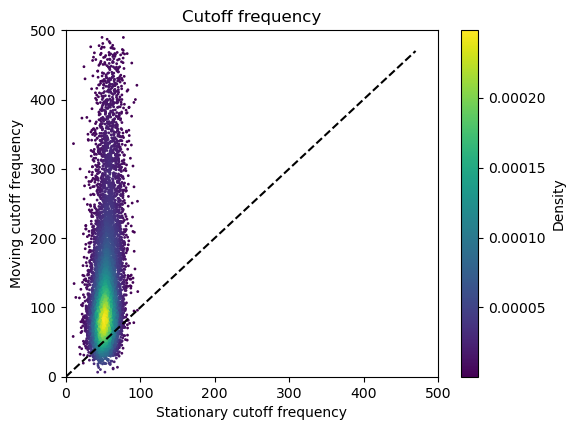

In [178]:
# plot the cutoff frequencies as a density scatter plot with jitter
point = 2

jitter_strength = 10

fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.set_title('Cutoff frequency')
ax.set_xlabel('Stationary cutoff frequency')
ax.set_ylabel('Moving cutoff frequency')
# add jitter to the points and remove nan values
cutoff_frequency_stat_temp = cutoff_frequency_stat[point, :, :, :, :].flatten()
cutoff_frequency_mov_temp = cutoff_frequency_mov[point, :, :, :, :].flatten()
# check what percent of values in cutoff_frequency_mov are nan
print(f'Percent of NaN values in cutoffs: {np.sum(np.isnan(cutoff_frequency_mov_temp))/ cutoff_frequency_mov_temp.size * 100:.2f}%')

cutoff_frequency_stat_temp = cutoff_frequency_stat_temp[~np.isnan(cutoff_frequency_stat_temp)]*10
cutoff_frequency_mov_temp = cutoff_frequency_mov_temp[~np.isnan(cutoff_frequency_mov_temp)]*10

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(cutoff_frequency_stat_temp), np.max(cutoff_frequency_mov_temp))

cutoff_stat_jitter = cutoff_frequency_stat_temp + np.random.normal(0, jitter_strength, cutoff_frequency_stat_temp.shape)
cutoff_mov_jitter = cutoff_frequency_mov_temp + np.random.normal(0, jitter_strength, cutoff_frequency_mov_temp.shape)

# use gaussian kde to plot the density of points
from scipy.stats import gaussian_kde

kde = gaussian_kde([cutoff_stat_jitter, cutoff_mov_jitter])

# plot scatter plot colored by density
density = kde([cutoff_stat_jitter, cutoff_mov_jitter])
ax.scatter(cutoff_stat_jitter, cutoff_mov_jitter, c=density, cmap='viridis', s=1)
# add a colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Density')
# add a line with slope 1 which goes from 0 to the max value axes
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)

plt.savefig(f'../manuscript_figures/fig3_cutoff_frequency_density_scatter_block_stim_point_{point}.pdf', format='pdf', bbox_inches='tight')


Percent of NaN values in cutoffs: 10.30%


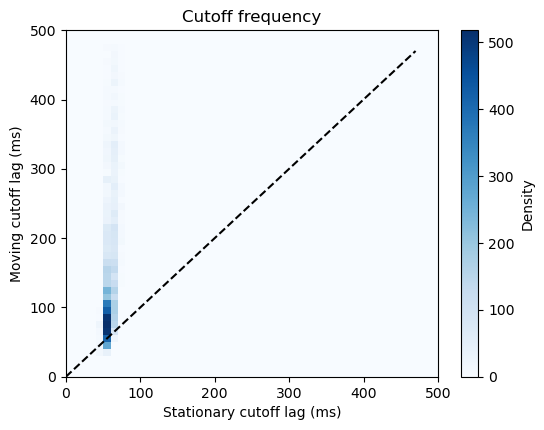

In [183]:
# plot the cutoff frequencies as a density scatter plot with jitter
point = 2

# Ensure the x and y axes span the same range
# add jitter to the points and remove nan values
cutoff_frequency_stat_temp = cutoff_frequency_stat[point, :, :, :, :].flatten()
cutoff_frequency_mov_temp = cutoff_frequency_mov[point, :, :, :, :].flatten()
# check what percent of values in cutoff_frequency_mov are nan
print(f'Percent of NaN values in cutoffs: {np.sum(np.isnan(cutoff_frequency_mov_temp))/ cutoff_frequency_mov_temp.size * 100:.2f}%')

cutoff_frequency_stat_temp = cutoff_frequency_stat_temp[~np.isnan(cutoff_frequency_stat_temp)]*10
cutoff_frequency_mov_temp = cutoff_frequency_mov_temp[~np.isnan(cutoff_frequency_mov_temp)]*10

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(cutoff_frequency_stat_temp), np.max(cutoff_frequency_mov_temp))
frame_length = 10
bins = np.arange(min_val, 510, frame_length)

fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 3*1.5))
ax.set_title('Cutoff frequency')
ax.set_xlabel('Stationary cutoff lag (ms)')
ax.set_ylabel('Moving cutoff lag (ms)')

ax.hist2d(cutoff_frequency_stat_temp, cutoff_frequency_mov_temp, bins=[bins, bins], cmap='Blues')
# add a colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Density')
# add a line with slope 1 which goes from 0 to the max value axes
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')

plt.savefig(f'../manuscript_figures/fig3_cutoff_frequency_density_scatter_block_stim_point_{point}.pdf', format='pdf', bbox_inches='tight')


## Normalized Utility

In [298]:
# compute the max info and energy for each filter
moving_max_info = np.max(moving_stim_information, axis=0)
stationary_max_info = np.max(stationary_stim_information, axis=0)
moving_max_energy = np.max(moving_stim_energy, axis=0)
stationary_max_energy = np.max(stationary_stim_energy, axis=0)
max_info = np.maximum(moving_max_info, stationary_max_info)
max_energy = np.maximum(moving_max_energy, stationary_max_energy)
# normalize
moving_stim_information_norm = moving_stim_information / max_info
stationary_stim_information_norm = stationary_stim_information / max_info
moving_stim_energy_norm = moving_stim_energy / max_energy
stationary_stim_energy_norm = stationary_stim_energy / max_energy

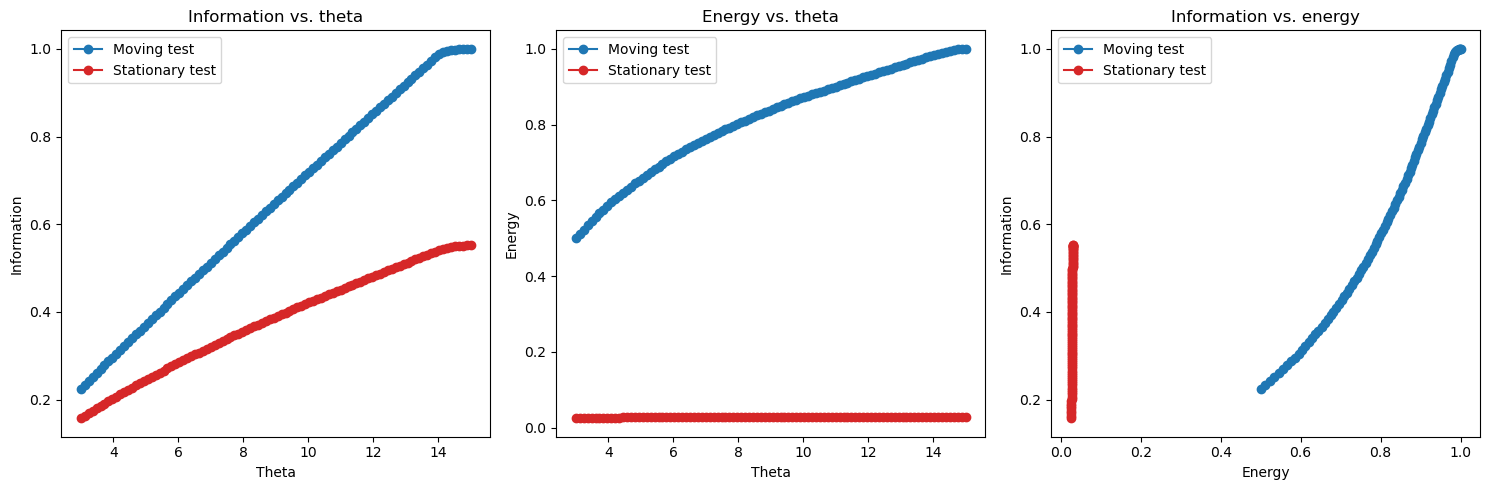

In [299]:
ori_idx = 0
phase_idx = 0
wavelength_idx = 0
position_idx = 4
moving_test_informations = moving_stim_information_norm[:, ori_idx, phase_idx, wavelength_idx, position_idx]
stationary_test_informations = stationary_stim_information_norm[:, ori_idx, phase_idx, wavelength_idx, position_idx]
moving_test_energy = moving_stim_energy_norm[:, ori_idx, phase_idx, wavelength_idx, position_idx]
stationary_test_energy = stationary_stim_energy_norm[:, ori_idx, phase_idx, wavelength_idx, position_idx]

# create a subplot with 1 row and 3 columns. First column plot the information vs. theta, second column plot the energy vs. theta, third column plot the information vs. energy
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(theta_values, moving_test_informations, 'o-', color='tab:blue', label='Moving test')
axs[0].plot(theta_values, stationary_test_informations, 'o-', color='tab:red', label='Stationary test')
axs[0].set_xlabel('Theta')
axs[0].set_ylabel('Information')
axs[0].set_title('Information vs. theta')
axs[0].legend()
axs[1].plot(theta_values, moving_test_energy, 'o-', color='tab:blue', label='Moving test')
axs[1].plot(theta_values, stationary_test_energy, 'o-', color='tab:red', label='Stationary test')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Energy')
axs[1].set_title('Energy vs. theta')
axs[1].legend()
axs[2].plot(moving_test_energy, moving_test_informations, 'o-', color='tab:blue', label='Moving test')
axs[2].plot(stationary_test_energy, stationary_test_informations, 'o-', color='tab:red', label='Stationary test')
axs[2].set_xlabel('Energy')
axs[2].set_ylabel('Information')
axs[2].set_title('Information vs. energy')
axs[2].legend()
plt.tight_layout()
plt.show()

In [300]:
# compute the utility for a variety of lambdas
lmbd_arr = np.linspace(0, 100, 100)

moving_utility = np.zeros((lmbd_arr.shape[0], num_theta_values, len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
stationary_utility = np.zeros((lmbd_arr.shape[0], num_theta_values, len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))

for i, lmbd in enumerate(lmbd_arr):
    moving_utility[i] = moving_stim_information_norm - lmbd*moving_stim_energy_norm
    stationary_utility[i] = stationary_stim_information_norm - lmbd*stationary_stim_energy_norm

In [301]:
# compute the optimal value of theta for each filter
optimal_theta_idx_moving = np.argmax(moving_utility, axis=1)
optimal_theta_idx_stationary = np.argmax(stationary_utility, axis=1)

optimal_theta_moving = theta_values[optimal_theta_idx_moving]
optimal_theta_stationary = theta_values[optimal_theta_idx_stationary]

In [302]:
optimal_theta_moving.shape

(100, 8, 4, 19, 9)

In [303]:
# take the difference and then the average
optimal_theta_diff = optimal_theta_moving - optimal_theta_stationary
optimal_theta_diff_avg = np.mean(optimal_theta_diff, axis=(1, 2, 4))

In [304]:
optimal_theta_diff.shape

(100, 8, 4, 19, 9)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 5472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-12.5 , -12.45, -12.4 , -12.35, -12.3 , -12.25, -12.2 , -12.15,
        -12.1 , -12.05, -12.  , -11.95, -11.9 , -11.85, -11.8 , -11.75,
        -11.7 , -11.65, -11.6 , -11.55, -11.5 ]),
 <BarContainer object of 20 artists>)

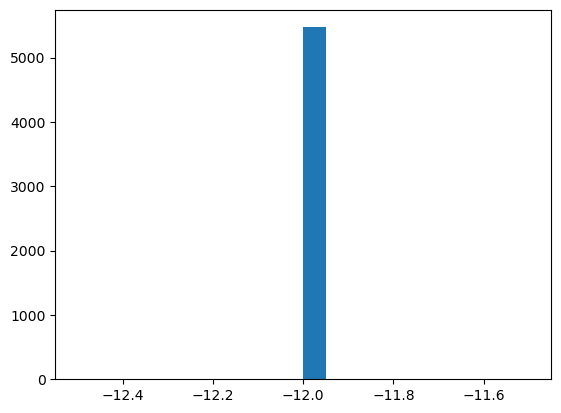

In [305]:
plt.hist(np.min(optimal_theta_diff, axis=0).flatten(), bins=20)

/tmp/ipykernel_27728/3487992835.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_map = cm.get_cmap('viridis', len(wavelength_arr[low_spatial_freq_idx]))


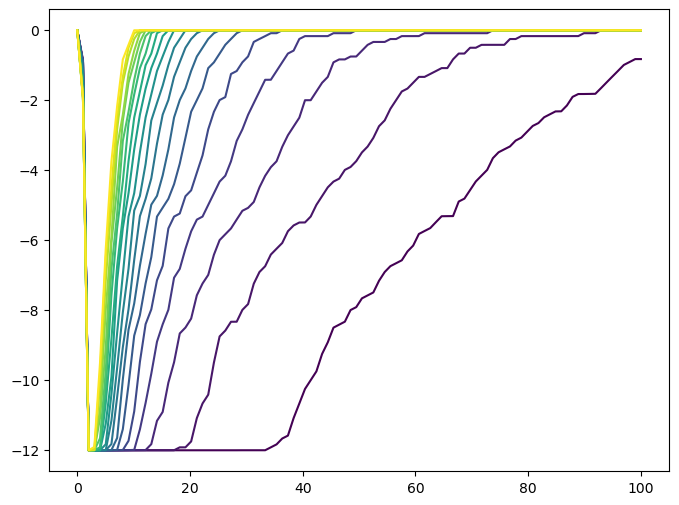

In [306]:
# plot the average difference in optimal theta, color them with viridis

from matplotlib import cm
from matplotlib.colors import Normalize

colors_map = cm.get_cmap('viridis', len(wavelength_arr[low_spatial_freq_idx]))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(wavelength_arr[low_spatial_freq_idx].shape[0]):
    ax.plot(lmbd_arr, optimal_theta_diff_avg[:, i], color=colors_map(i))



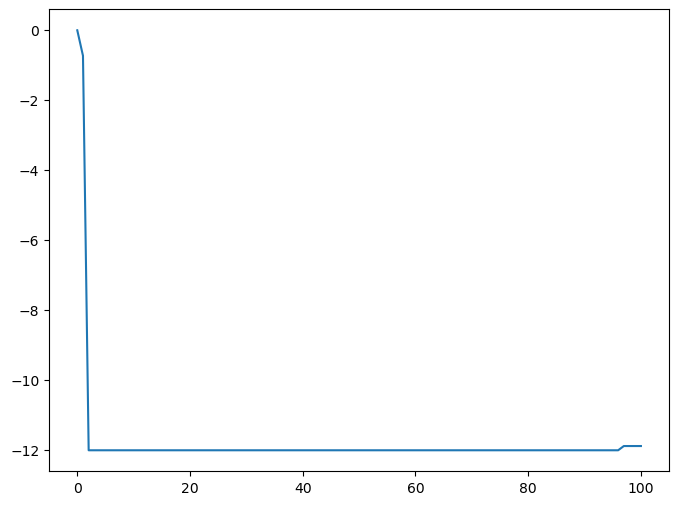

In [312]:
ori_idx = 0
phase_idx = 0
wavelength_idx = 0
position_idx = 2

# plot the delta theta moving - stationary for a specific filter
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(lmbd_arr, optimal_theta_moving[:, ori_idx, phase_idx, wavelength_idx, position_idx] - optimal_theta_stationary[:, ori_idx, phase_idx, wavelength_idx, position_idx])

[Text(0, 0, '0.0'),
 Text(0, 10, '10.1'),
 Text(0, 20, '20.2'),
 Text(0, 30, '30.3'),
 Text(0, 40, '40.4'),
 Text(0, 50, '50.51'),
 Text(0, 60, '60.61'),
 Text(0, 70, '70.71'),
 Text(0, 80, '80.81'),
 Text(0, 90, '90.91')]

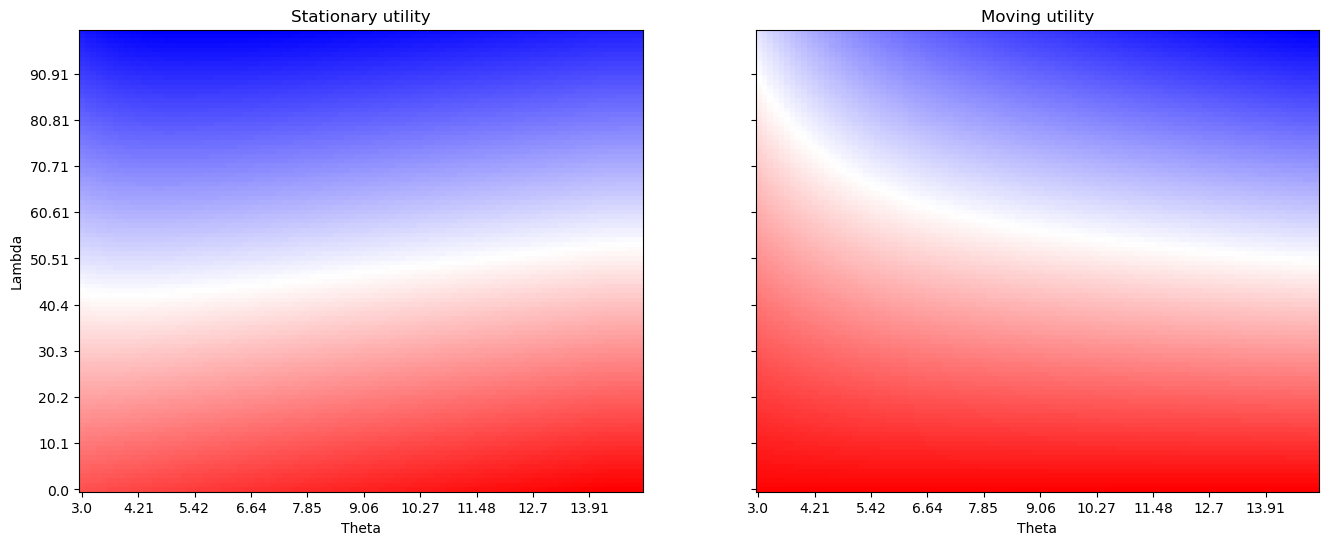

In [313]:
import matplotlib.colors as mcolors

norm = mcolors.TwoSlopeNorm(vmin=np.min([moving_utility, stationary_utility]), vcenter=0, vmax=np.max([moving_utility, stationary_utility]))

# create a heatmap of the utility for theta vs. lambda for stationary and moving
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
ax[1].imshow(moving_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx], aspect='auto', cmap='bwr', origin='lower')
ax[1].set_title('Moving utility')
ax[0].imshow(stationary_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx], aspect='auto', cmap='bwr', origin='lower')
ax[0].set_title('Stationary utility')
ax[0].set_xlabel('Theta')
ax[1].set_xlabel('Theta')
ax[0].set_ylabel('Lambda')
# set the tick labels
ax[0].set_xticks(np.arange(0, num_theta_values, 10))
ax[0].set_xticklabels(np.round(theta_values[::10], 2))
ax[1].set_xticks(np.arange(0, num_theta_values, 10))
ax[1].set_xticklabels(np.round(theta_values[::10], 2))
ax[0].set_yticks(np.arange(0, len(lmbd_arr), 10))
ax[0].set_yticklabels(np.round(lmbd_arr[::10], 2))

## Gaussian filter

In [ ]:
# repeat the process again for a range of theta values
num_theta_values = 50
array_shape = moving_stim_psd_avg.shape
theta_values_u = [0] # np.linspace(0, np.max(frequencies), num_theta_values)
theta_values_s = np.logspace(-1, 1, num_theta_values)
moving_stim_information = np.zeros((len(theta_values_u), len(theta_values_s), array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_information = np.zeros((len(theta_values_u), len(theta_values_s), array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
moving_stim_energy = np.zeros((len(theta_values_u), len(theta_values_s), array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
stationary_stim_energy = np.zeros((len(theta_values_u), len(theta_values_s), array_shape[0], array_shape[1], array_shape[2], array_shape[3]))
for i in tqdm(range(len(theta_values_u))):
    for j in range(len(theta_values_s)):
        # compute the filter
        filter = temporal_filter_gauss(frequencies, theta_values_u[i], theta_values_s[j])
        # compute the filtered spectra
        filtered_stationary_stim_psd_avg = np.multiply(stationary_stim_psd_avg, filter)
        filtered_moving_stim_psd_avg = np.multiply(moving_stim_psd_avg, filter)
        # compute the information
        moving_stim_information[i, j] = np.sum(np.log2(1 + filtered_moving_stim_psd_avg / noise), axis=-1)
        stationary_stim_information[i, j] = np.sum(np.log2(1 + filtered_stationary_stim_psd_avg / noise), axis=-1)
        # compute the energy
        moving_stim_energy[i, j] = np.sum(filtered_moving_stim_psd_avg, axis=-1)
        stationary_stim_energy[i, j] = np.sum(filtered_stationary_stim_psd_avg, axis=-1)


In [ ]:
import matplotlib.colors as mcolors

norm = mcolors.CenteredNorm()

# plot the information as a heatmap of theta_u and theta_s
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
im = ax[0].imshow(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[0].set_xlabel('SD')
ax[0].set_ylabel('Mean')
ax[0].set_title('Info')

ax[1].imshow(moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[1].set_xlabel('SD')
ax[1].set_ylabel('Mean')
ax[1].set_title('Energy')

ax[2].imshow(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]) - 0.1*moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[2].set_xlabel('SD')
ax[2].set_ylabel('Mean')


In [ ]:
import matplotlib.colors as mcolors

norm = mcolors.CenteredNorm()

# plot the information as a heatmap of theta_u and theta_s
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
im = ax[0].imshow(stationary_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[0].set_xlabel('SD')
ax[0].set_ylabel('Mean')
ax[0].set_title('Info')

ax[1].imshow(stationary_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[1].set_xlabel('SD')
ax[1].set_ylabel('Mean')
ax[1].set_title('Energy')

ax[2].imshow(stationary_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]) - 0.1*stationary_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[2].set_xlabel('SD')
ax[2].set_ylabel('Mean')


In [ ]:
plt.plot(moving_stim_information[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]) - 2 * moving_stim_energy[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]), 'o-', color='tab:blue', label='Moving test')
plt.plot(stationary_stim_information[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_information[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]) - 2 * stationary_stim_energy[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]/np.max(moving_stim_energy[0, :, ori_idx, phase_idx, wavelength_idx, position_idx]), 'o-', color='tab:red', label='Stationary test')

In [ ]:
# compute the max info and energy for each filter
moving_max_info = np.max(moving_stim_information[0], axis=0)
stationary_max_info = np.max(stationary_stim_information[0], axis=0)
moving_max_energy = np.max(moving_stim_energy[0], axis=0)
stationary_max_energy = np.max(stationary_stim_energy[0], axis=0)
max_info = np.maximum(moving_max_info, stationary_max_info)
max_energy = np.maximum(moving_max_energy, stationary_max_energy)
# normalize
moving_stim_information_norm = moving_stim_information[0] / max_info
stationary_stim_information_norm = stationary_stim_information[0] / max_info
moving_stim_energy_norm = moving_stim_energy[0] / max_energy
stationary_stim_energy_norm = stationary_stim_energy[0] / max_energy

In [ ]:
moving_stim_information_norm.shape

In [ ]:
# compute the utility for a variety of lambdas
lmbd_arr = np.linspace(0, 2, 50)

moving_utility = np.zeros((lmbd_arr.shape[0], num_theta_values, len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))
stationary_utility = np.zeros((lmbd_arr.shape[0], num_theta_values, len(orientation_arr), len(phase_arr), len(wavelength_arr[low_spatial_freq_idx]), len(position_arr)))

for i, lmbd in enumerate(lmbd_arr):
    moving_utility[i] = moving_stim_information_norm - lmbd*moving_stim_energy_norm
    stationary_utility[i] = stationary_stim_information_norm - lmbd*stationary_stim_energy_norm

In [ ]:
moving_utility.shape

In [ ]:
import matplotlib.colors as mcolors

norm = mcolors.TwoSlopeNorm(vmin=np.min([moving_utility, stationary_utility]), vcenter=0, vmax=np.max([moving_utility, stationary_utility]))

ori_idx = 0
phase_idx = 0
wavelength_idx = 10
position_idx = 4

# utility as as a heatmaps of lambda and theta

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(stationary_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx].T, aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[0].set_xlabel('Lambda')
ax[0].set_ylabel('SD')
im = ax[1].imshow(moving_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx].T, aspect='auto', cmap='coolwarm', origin='lower', norm=norm)
ax[1].set_xlabel('Lambda')
ax[1].set_ylabel('SD')
ax[0].set_title('Stationary Utility')
ax[1].set_title('Moving Utility')
# for each lambda find the optimal theta and then plot a line overlaid on the heatmap connecting these values
optimal_theta_stationary_idx = np.argmin(np.abs(stationary_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), axis=1)
optimal_theta_moving_idx = np.argmin(np.abs(moving_utility[:, :, ori_idx, phase_idx, wavelength_idx, position_idx]), axis=1)
optimal_theta_stationary = theta_values_s[optimal_theta_stationary_idx]
optimal_theta_moving = theta_values_s[optimal_theta_moving_idx]
ax[0].plot(np.arange(len(lmbd_arr)), optimal_theta_stationary_idx, color='k')
ax[1].plot(np.arange(len(lmbd_arr)), optimal_theta_moving_idx, color='k')

In [ ]:
optimal_theta_stationary_idx.shape

In [ ]:
plt.plot(optimal_theta_moving - optimal_theta_stationary)